<a href="https://colab.research.google.com/github/yoonsungah/BigDataClass/blob/main/2%EC%A3%BC%EC%B0%A8)R_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R for Data Science 실습

Colab 에서 R 사용: Runtime - Change Runtime type 에서 R로 변경


In [202]:
library(tidyverse)

## Pipes


In [ ]:
summary(cars) #Pipes 안썼을 때

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [ ]:
cars %>% summary() #Pipes 사용

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [ ]:
head(cars, 3) #Pipes 안썼을 때

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


In [ ]:
cars %>% head(3) #Pipes 사용

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


## Data transformation - dplyr

### nycflights13

nycflights13은 2013년에 뉴욕시에서 출발한 항공편에 대한 데이터셋이다.    
dplyr 패키지를 사용하여 데이터를 변환하고 조작한다.

In [203]:
install.packages("nycflights13")
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


< int >: 정수(int)를 나타냅니다. 소수점 없이 정수 값을 저장    
< dbl >: 실수(double)를 나타냅니다. 소수점을 저장  
< chr >: 문자 벡터(character vector) 문자열 데이터를 저장    
< dttm >: 날짜와 시간을 포함하는 데이터 타입(date-time)    
< lgl >: 논리(logical) 값, TRUE 또는 FALSE 값만 포함    
< fctr >: 범주형 변수(factor) 고정된 가능한 값을 가진 변수, 일반적으로 범주형 데이터를 처리하는 데 사용       
< date >: 날짜(date)만 나타내는 데이터 타입. 특정 날짜 정보를 저장

### Filter rows with filter() : 필요한 정보를 가진 행을 filter로 걸러보기

같은 조건을 가진 행을 추출하기 위해 다양한 방법을 사용할 수 있다.
    
filter(flights, month == 1, day == 1)    
flights %>% filter(month == 1, day == 1) %>% filter(dest == 'ORD')    
flights[ flights$month ==1 & flights$day ==1, ]    
flights %>% filter(month == 1 & day == 1 & dest == 'ORD')

In [ ]:
filter(flights, month == 1, day == 1) %>% head() #flights 데이터셋에서 1월 1월인 행을 보여준다 # %>% head() 괄호를 잊지말자

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights %>% filter(month == 1, day == 1) %>% filter(dest == 'ORD') %>% head() #위 코드랑 똑같은데 파이프라인 사용했고 ORD 조건을 추가

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights[ flights$month ==1 & flights$day ==1, ] %>% head() # flights 데이터 셋의 인덱스에서 조건을 정해줬다. 1월1일인 행, 모든 열 출력

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest == 'ORD') %>% head() #and 연산자를 이용해서 한꺼번에 작성

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS')) %>% head() #month==1 and day==1 and dest가 ORD 또는 LAS인 것을 출력 ( %in% == in )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,651,655,-4,936,942,-6,B6,203,N558JB,JFK,LAS,323,2248,6,55,2013-01-01 06:00:00


5.2.4 연습문제
1. 다음 조건을 만족하는 모든 항공편을 찾으세요:

  1. 도착 지연이 2시간 이상인 항공편
  2. 휴스턴(IAH 또는 HOU)으로 비행한 항공편
  3. 유나이티드(UA), 아메리칸(AA), 또는 델타(DL) 항공이 운영한 항공편(carrier열)
  4. 여름(7월, 8월, 9월)에 출발한 항공편
  5. 2시간 이상 늦게 도착했지만, 늦게 출발하지 않은 항공편
  6. 최소 1시간 이상 지연되었지만 비행 중 30분 이상 만회한 항공편
  7. 자정부터 오전 6시 사이(포함)에 출발한 항공편
2. between() 함수는 무엇을 하나요? 이전 문제를 해결하기 위한 코드에서 이를 사용하여 간소화할 수 있나요?

3. dep_time에 결측값이 있는 항공편은 몇 개인가요? 다른 어떤 변수들이 결측값이 있나요? 이러한 행들은 무엇을 나타낼 수 있을까요?

In [ ]:
#5.2.4 연습문제 풀이

# 1-1. 도착 지연이 2시간 이상인 항공편

flights %>% filter(arr_delay >= 2) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [ ]:
# 1-2. IAH 또는 HOU로 비행한 항공편

# flights %>% filter(dest == 'IAH' | dest == 'HOU') %>% head() # or 연산자 사용
flights %>% filter(dest %in% c('IAH','HOU')) %>% head() # c(a,b) 형식 사용

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,623,627,-4,933,932,1,UA,496,N459UA,LGA,IAH,229,1416,6,27,2013-01-01 06:00:00
2013,1,1,728,732,-4,1041,1038,3,UA,473,N488UA,LGA,IAH,238,1416,7,32,2013-01-01 07:00:00
2013,1,1,739,739,0,1104,1038,26,UA,1479,N37408,EWR,IAH,249,1400,7,39,2013-01-01 07:00:00
2013,1,1,908,908,0,1228,1219,9,UA,1220,N12216,EWR,IAH,233,1400,9,8,2013-01-01 09:00:00


In [ ]:
 # 1-3. 유나이티드(UA) 또는 아메리칸(AA), 또는 델타(DL) 항공이 운영한 항공편(carrier열)

 flights %>% filter(carrier %in% c('UA','AA','DL')) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [ ]:
# 1-4. 여름(7월, 8월, 9월)에 출발한 항공편

flights %>% filter(month %in% c(7,8,9)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
2013,7,1,43,2130,193,322,14,188,B6,1371,N794JB,LGA,FLL,143,1076,21,30,2013-07-01 21:00:00
2013,7,1,44,2150,174,300,100,120,AA,185,N324AA,JFK,LAX,297,2475,21,50,2013-07-01 21:00:00
2013,7,1,46,2051,235,304,2358,186,B6,165,N640JB,JFK,PDX,304,2454,20,51,2013-07-01 20:00:00


In [ ]:
# 1-5. 2시간 이상 늦게 도착했지만, 늦게 출발하지 않은 항공편

flights %>% filter(arr_delay >= 2 & dep_delay == 0) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,600,600,0,837,825,12,MQ,4650,N542MQ,LGA,ATL,134,762,6,0,2013-01-01 06:00:00
2013,1,1,635,635,0,1028,940,48,AA,711,N3GKAA,LGA,DFW,248,1389,6,35,2013-01-01 06:00:00
2013,1,1,739,739,0,1104,1038,26,UA,1479,N37408,EWR,IAH,249,1400,7,39,2013-01-01 07:00:00
2013,1,1,745,745,0,1135,1125,10,AA,59,N336AA,JFK,SFO,378,2586,7,45,2013-01-01 07:00:00
2013,1,1,800,800,0,1022,1014,8,DL,2119,N317US,LGA,MSP,171,1020,8,0,2013-01-01 08:00:00
2013,1,1,805,805,0,1015,1005,10,B6,219,N273JB,JFK,CLT,98,541,8,5,2013-01-01 08:00:00


In [ ]:
# 1-6. 최소 출발이 1시간 이상 지연되었지만 비행 중 30분 이상 만회한 항공편

flights %>% filter(dep_delay >= 1 & arr_delay <= 0.5) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,601,600,1,844,850,-6,B6,343,N644JB,EWR,PBI,147,1023,6,0,2013-01-01 06:00:00
2013,1,1,644,636,8,931,940,-9,UA,1701,N75435,EWR,FLL,151,1065,6,36,2013-01-01 06:00:00
2013,1,1,646,645,1,910,916,-6,UA,883,N569UA,LGA,DEN,243,1620,6,45,2013-01-01 06:00:00
2013,1,1,646,645,1,1023,1030,-7,UA,1496,N38727,EWR,SNA,380,2434,6,45,2013-01-01 06:00:00
2013,1,1,701,700,1,1123,1154,-31,UA,1203,N77296,EWR,SJU,188,1608,7,0,2013-01-01 07:00:00
2013,1,1,752,750,2,1025,1029,-4,UA,477,N511UA,LGA,DEN,249,1620,7,50,2013-01-01 07:00:00


In [ ]:
# 1-7. 자정부터 오전 6시 사이(포함)에 출발한 항공편

#flights %>% filter(dep_time >= 0 & dep_time <= 600) %>% head() #HHMM 타입 (dep_time == 600 이면 6시 00분)

flights %>% filter(between(dep_time, 0, 600)) %>% head() #betweeb함수 사용 : between(열이름, 시작범위, 끝범위)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
# 2. between() 함수는 무엇을 하나요? 이전 문제를 해결하기 위한 코드에서 이를 사용하여 간소화할 수 있나요? 1-7에서 해결하였음

# 3. dep_time에 결측값이 있는 항공편은 몇 개인가요? 다른 어떤 변수들이 결측값이 있나요? 이러한 행들은 무엇을 나타낼 수 있을까요?
flights %>% filter(is.na(dep_time)) %>% head() #결측값이 있는 행을 보여준다
flights %>% summarize(missing_dep_time = sum(is.na(dep_time))) #결측값이 있는 행이 몇개인지 알려준다

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00


missing_dep_time
<int>
8255


### Arrange rows with arrange() : 행을 정렬하는 방법

In [ ]:
# Destination이 ORD공항인 항공편을 정렬할 때, year과 month는 오름차순으로 day는 내림차순으로 정렬한다.
# month : 1월 -> 12월 , day : 31일 -> 1일

flights %>% filter(dest == "ORD") %>% arrange(year, month, desc(day)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,31,554,600,-6,726,745,-19,AA,301,N3DEAA,LGA,ORD,121,733,6,0,2013-01-31 06:00:00
2013,1,31,626,630,-4,740,810,-30,AA,303,N3CXAA,LGA,ORD,116,733,6,30,2013-01-31 06:00:00
2013,1,31,626,630,-4,800,810,-10,B6,905,N339JB,JFK,ORD,124,740,6,30,2013-01-31 06:00:00
2013,1,31,651,700,-9,839,850,-11,AA,305,N4XBAA,LGA,ORD,126,733,7,0,2013-01-31 07:00:00
2013,1,31,656,700,-4,829,839,-10,UA,550,N402UA,LGA,ORD,119,733,7,0,2013-01-31 07:00:00
2013,1,31,710,710,0,901,850,11,MQ,3737,N519MQ,EWR,ORD,121,719,7,10,2013-01-31 07:00:00


In [ ]:
arrange(flights, year, month, day)  %>% head() #flights 데이터 셋에서 year,month,day 열을 오름차순 정렬

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
arrange(flights, desc(dep_delay)) %>% head() #flights 데이터 셋에서 dep_delay를 내림차순 정렬

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


5.3.1 연습문제    

1. arrange()를 사용하여 모든 결측값을 맨 위로 정렬하려면 어떻게 해야 하나요? (힌트: is.na()를 사용하세요.)

2. 가장 지연된 항공편을 찾기 위해 flights를 정렬하세요. 가장 일찍 출발한 항공편을 찾으세요.

3. 가장 빠른(속도가 가장 높은) 항공편을 찾기 위해 flights를 정렬하세요.

4. 가장 멀리 여행한 항공편은 어떤 것이고, 가장 짧게 여행한 항공편은 어떤 것인가요?


In [ ]:
#1. arrange()를 사용하여 모든 결측값을 맨 위로 정렬하려면 어떻게 해야 하나요? (힌트: is.na()를 사용하세요.)

flights %>% arrange(desc(rowSums(is.na(.)))) %>% head() #rowSums : 행의 합계 계산, is.na(.) : 현재 데이터셋에서 모든 데이터에 대해 결측값 여부 확인

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,2,NA,1545,NA,NA,1910,NA,AA,133,NA,JFK,LAX,NA,2475,15,45,2013-01-02 15:00:00
2013,1,2,NA,1601,NA,NA,1735,NA,UA,623,NA,EWR,ORD,NA,719,16,1,2013-01-02 16:00:00
2013,1,3,NA,857,NA,NA,1209,NA,UA,714,NA,EWR,MIA,NA,1085,8,57,2013-01-03 08:00:00
2013,1,3,NA,645,NA,NA,952,NA,UA,719,NA,EWR,DFW,NA,1372,6,45,2013-01-03 06:00:00
2013,1,4,NA,845,NA,NA,1015,NA,9E,3405,NA,JFK,DCA,NA,213,8,45,2013-01-04 08:00:00
2013,1,4,NA,1830,NA,NA,2044,NA,9E,3716,NA,EWR,DTW,NA,488,18,30,2013-01-04 18:00:00


In [ ]:
# 2. 가장 지연된 항공편을 찾기 위해 flights를 정렬하세요. 가장 일찍 출발한 항공편을 찾으세요.
flights %>% arrange(desc(arr_delay)) %>% head()
flights %>% arrange(month, day, dep_time) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
# 3. 가장 빠른(속도가 가장 높은) 항공편을 찾기 위해 flights를 정렬하세요. (거리 = 속력 * 시간) ==> 속력 : 거리/시간

flights %>% arrange(desc(distance/(hour*60+minute))) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00


In [ ]:
# 4. 가장 멀리 여행한 항공편은 어떤 것이고, 가장 짧게 여행한 항공편은 어떤 것인가요?
flights %>% arrange(desc(distance)) %>% head()
flights %>% arrange(distance) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,27,NA,106,NA,NA,245,NA,US,1632,NA,EWR,LGA,NA,17,1,6,2013-07-27 01:00:00
2013,1,3,2127,2129,-2,2222,2224,-2,EV,3833,N13989,EWR,PHL,30,80,21,29,2013-01-03 21:00:00
2013,1,4,1240,1200,40,1333,1306,27,EV,4193,N14972,EWR,PHL,30,80,12,0,2013-01-04 12:00:00
2013,1,4,1829,1615,134,1937,1721,136,EV,4502,N15983,EWR,PHL,28,80,16,15,2013-01-04 16:00:00
2013,1,4,2128,2129,-1,2218,2224,-6,EV,4645,N27962,EWR,PHL,32,80,21,29,2013-01-04 21:00:00
2013,1,5,1155,1200,-5,1241,1306,-25,EV,4193,N14902,EWR,PHL,29,80,12,0,2013-01-05 12:00:00


### Select columns with select() : 선택한 열만 출력해보자

In [ ]:
select(flights, year, month, day) %>% head() #flights 데이터셋에서 year,month,day열만 출력한다

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [ ]:
select(flights, -c(year:day)) %>% head() #flights 데이터셋에서 year부터 day열 까지는 출력하지 않고 나머지만 출력한다

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, -(year:day)) %>% head() #flights 데이터셋에서 year부터 day열 까지는 출력하지 않고 나머지만 출력한다 (바로 위 코드와 같은 결과이지만 -c를 -로 바꾸었다)

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, year:sched_arr_time) %>% head() #flights 데이터셋에서 year부터 sched_arr_time열만 출력한다

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
2013,1,1,517,515,2,830,819
2013,1,1,533,529,4,850,830
2013,1,1,542,540,2,923,850
2013,1,1,544,545,-1,1004,1022
2013,1,1,554,600,-6,812,837
2013,1,1,554,558,-4,740,728


### Helper functions

- starts_with("abc"): abc로 시작하는 것을 찾음
- ends_with("xyz"): xyz로 끝나는 것을 찾음
- contains("ijk"): ijk를 포함한 것을 찾음
- num_range("x", 1:3): x1,x2,x3을 찾음

In [ ]:
select(flights, starts_with("arr")) %>% head() #arr로 시작하는 이름을 가진 열을 찾아서 출력

arr_time,arr_delay
<int>,<dbl>
830,11
850,20
923,33
1004,-18
812,-25
740,12


In [ ]:
select(flights, contains("arr")) %>% head() #arr을 포함하는 이름을 가진 열을 찾아서 출력

arr_time,sched_arr_time,arr_delay,carrier
<int>,<int>,<dbl>,<chr>
830,819,11,UA
850,830,20,UA
923,850,33,AA
1004,1022,-18,B6
812,837,-25,DL
740,728,12,UA


###Rename the variable with rename() : 이름을 변경해보자

In [ ]:
rename(flights, tail_num = tailnum) %>% head #원래 열이름이 tailnum이었던 것을 tail_num으로 변경 (순서 주의!! 변경할 새로운 이름이 앞에 있음)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


###Or using traditional R using colnames() : R에서 사용하던 colnames()를 사용해서 열이름을 변경해보자

In [ ]:
colnames(flights) #flights 데이터셋의 모든 열 이름을 출력한다

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [ ]:
colnames(flights)[12] #index가 12번인 열 이름을 출력한다 (주의!! 0부터 아님 1부터 시작임)

[1] "tailnum"

In [ ]:
colnames(flights)[12] = 'tail_num' #index가 12번인 열 이름을 tail_num으로 변경한다

In [ ]:
flights %>% head() #tailnum이 tail_num으로 변경된 것을 볼 수 있다

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, time_hour, air_time, everything()) %>% head() #filghts 데이터 셋에서 time_hour, air_time열을 먼저 출력하고 나머지 열을 뒤로 배치한다

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


In [ ]:
flights %>% select( c("dep_time", "dep_delay", "arr_time", "arr_delay")) %>% head()#c()를 사용해서 출력될 열이름 선언

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


In [ ]:
flights %>% select(starts_with("dep"), starts_with("arr")) %>% head() # & 쓸필요 없고 그냥 콤마 쓰면 됨

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


In [ ]:
flights %>% select(dep_time:arr_delay, -c("sched_dep_time", "sched_arr_time") ) %>% head() #dep_time부터 arr_delay까지 열을 출력하는데 shed_dep_time과 shed_arr_time은 삭제한다

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


In [ ]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


5.4.1 연습문제
1. flights 데이터프레임에서 dep_time, dep_delay, arr_time, arr_delay를 선택하는 여러 방법을 생각해보세요.
2. select() 호출에서 변수 이름을 여러 번 포함하면 어떤 일이 발생하나요?
3. any_of() 함수는 무엇을 하나요? 이 벡터와 함께 사용할 때 어떤 도움이 될까요?

```
vars <- c("year", "month", "day", "dep_delay", "arr_delay")
```


In [ ]:
# 1. flights 데이터프레임에서 dep_time, dep_delay, arr_time, arr_delay를 선택하는 여러 방법을 생각해보세요.

#flights %>% select(dep_time, dep_delay, arr_time, arr_delay) %>% head()
#flights %>% select(c("dep_time", "dep_delay", "arr_time", "arr_delay")) %>% head()
#flights %>% select(starts_with("dep"),starts_with("arr")) %>% head() # 추가할 때 and 안써도 되고 콤마 쓰면 됨
cols <- c("dep_time", "dep_delay", "arr_time", "arr_delay")
flights %>% select(all_of(cols)) %>% head()

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


In [ ]:
# 2. select() 호출에서 변수 이름을 여러 번 포함하면 어떤 일이 발생하나요?

flights %>% select(dep_time, dep_time, dep_delay) %>% head() # dep_time을 두번 입력해봄. 같은 변수를 여러 번 지정하면 경고 메시지가 나타남. 그리고 해당 변수는 한 번만 반환

dep_time,dep_delay
<int>,<dbl>
517,2
533,4
542,2
544,-1
554,-6
554,-4


In [ ]:
# 3. any_of() 함수는 무엇을 하나요? 이 벡터와 함께 사용할 때 어떤 도움이 될까요?
cols <- c("dep_time", "dep_delay", "wowwowowow")
flights %>% select(any_of(cols)) %>% head() #any_of()는 특정 열이 존재하는지 확신이 없을 때 유용하다. ex) 존재하지 않는 열이름은 제외하고 에러 없이 나머지 열만 선택

dep_time,dep_delay
<int>,<dbl>
517,2
533,4
542,2
544,-1
554,-6
554,-4


In [ ]:
# 3. 위에 코드를 다른 방식으로 작성해보자 any_of()는 벡터 형태로 써야해서 "dep_time"과 "wowowow"를 쓰면 에러 발생
# 그래서 위에 코드와 달리, c()로 묶어서 바로 작성해보자
flights %>% select(any_of(c("dep_time", "dep_delay", "wowowowow"))) %>% head()

dep_time,dep_delay
<int>,<dbl>
517,2
533,4
542,2
544,-1
554,-6
554,-4


### Add new variables with mutate() : 새로운 열을 추가해보자

mutate(): 원래 데이터프레임을 유지하면서 새로운 변수 추가 또는 수정    
transmute(): 오직 새로운 변수만 반환. 기존 변수는 반환하지 않음

In [ ]:
flights %>% select(year:day, ends_with("delay"), distance, air_time) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


In [ ]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head() #mutate()를 사용해서 gain, hours, gain_per_hour열을 새로 생성

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.783333,-2.378855
2013,1,1,4,20,1416,227,-16,3.783333,-4.229075
2013,1,1,2,33,1089,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,1576,183,17,3.050000,5.573770
2013,1,1,-6,-25,762,116,19,1.933333,9.827586
2013,1,1,-4,12,719,150,-16,2.500000,-6.400000


In [ ]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% arrange( gain_per_hour) %>% head() #mutate()를 사용해서 gain, hours, gain_per_hour열을 새로 생성하고 gain_per_hour열을 기준으로 정렬

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,24,171,273,94,31,-102,0.5166667,-197.4194
2013,6,27,62,177,184,36,-115,0.6000000,-191.6667
2013,7,23,11,122,94,36,-111,0.6000000,-185.0000
2013,12,17,115,233,187,40,-118,0.6666667,-177.0000
2013,6,13,-7,106,184,39,-113,0.6500000,-173.8462
2013,6,27,-8,123,184,46,-131,0.7666667,-170.8696


In [ ]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    transmute(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head() #transmute()를 사용해서 기존에 있던 열은 출력되지 않음

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


In [ ]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% select(gain:gain_per_hour) %>% head() #위 코드와 결과가 같음 transmute()를 사용하지 않고 새로 만든 열만 출력되게 함

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


5.5.2 연습문제

1. dep_time과 sched_dep_time은 계산하기에는 불편하다. 자정 이후 분 단위로 변환하라.
2. air_time과 arr_time - dep_time을 비교해라. 어떤 결과가 나왔는가? 이를 수정하려면 어떻게 해야 하나요?
3. dep_time, sched_dep_time, dep_delay를 비교해라. 이 열의 값이 어떻게 관련되어있는가?
4. 랭킹 함수를 사용하여 가장 지연된 10개의 항공편을 찾아라. 동점 처리 방법은 어떻게 해야하는? min_rank()를 알아보라.
5. 1:3 + 1:10이 반환하는 값은 무엇인가?

In [ ]:
# 1. dep_time과 sched_dep_time은 계산하기에는 불편하다. 자정 이후 분 단위로 변환하라.
flights %>%
  select(dep_time, sched_dep_time) %>%
    mutate(dep_time_minutes = dep_time %/% 100 * 60 + dep_time %% 100,
         sched_dep_time_minutes = sched_dep_time %/% 100 * 60 + sched_dep_time %% 100) %>% head()

# 시(hour): 517 %/% 100 (5)
# 분(minute): 517 %% 100 (17) (%% : 517을 100으로 나눈 나머지를 계산)
# 총 분: 5 * 60 + 17 (317분)

dep_time,sched_dep_time,dep_time_minutes,sched_dep_time_minutes
<int>,<int>,<dbl>,<dbl>
517,515,317,315
533,529,333,329
542,540,342,340
544,545,344,345
554,600,354,360
554,558,354,358


In [ ]:
# 2. air_time과 arr_time - dep_time을 비교해라. 어떤 결과가 나왔는가? 이를 수정하려면 어떻게 해야 하나요?

# 비행시간(air_time) = 도착시간(arr_time) - 출발시간(dep_time) ==> 즉, 값이 같아야 한다
# arr_time - dep_time이 음수이거나 air_time과 같지 않다면, 도착 시간이 자정을 넘어서 다음날이 된 것이다.
# 이를 수정하려면 arr_time이 자정 이후로 계산되도록 조정해야 한다.

flights %>%
  select(air_time, arr_time, dep_time) %>%
    mutate(new_col = arr_time - dep_time) %>%
      select(air_time, new_col) %>% head()

air_time,new_col
<dbl>,<int>
227,313
227,317
160,381
183,460
116,258
150,186


In [ ]:
# 2번을 수정해보았다

# arr_time을 분으로 바꾸고 dep_time도 분으로 바꿔서 둘을 빼면 비행시간이 나온다
# new_col과 air_time이 같은 값이어야 하는데... 결과를 보면 다르다
flights %>%
  select(air_time, arr_time, dep_time) %>%
    mutate(
        arr_time_minutes = arr_time %/% 100 * 60 + arr_time %% 100,
        dep_time_minutes = dep_time %/% 100 * 60 + dep_time %% 100,
        new_col = arr_time_minutes - dep_time_minutes) %>%
          select(air_time, arr_time_minutes, dep_time_minutes, new_col) %>% head()

air_time,arr_time_minutes,dep_time_minutes,new_col
<dbl>,<dbl>,<dbl>,<dbl>
227,510,317,193
227,530,333,197
160,563,342,221
183,604,344,260
116,492,354,138
150,460,354,106


In [ ]:
# 3. dep_time, sched_dep_time, dep_delay를 비교해라. 이 열의 값이 어떻게 관련되어있는가?

flights %>% select(dep_time, sched_dep_time, dep_delay) %>% head() #==> 이 코드를 실행해보면 알 수 있듯이
# dep_time : 실제로 출발한 시각
# sched_dep_time : 스케줄상 출발한다고 명시된 시간
# dep_delay : dep_time - sched_dep_time (실제로 출발한 시간과 스케줄상 출발해야했던 시간의 차이)

dep_time,sched_dep_time,dep_delay
<int>,<int>,<dbl>
517,515,2
533,529,4
542,540,2
544,545,-1
554,600,-6
554,558,-4


In [ ]:
# 4. 랭킹 함수를 사용하여 가장 지연된 10개의 항공편을 찾아라. 동점 처리 방법은 어떻게 해야하는? min_rank()를 알아보라.

flights %>%
  mutate(rank = min_rank(desc(dep_delay))) %>%  #min_rank는 가장 작은 값을 불러오니까 반대로 돌려주기 위해 desc() 사용
  filter(rank <= 10) %>% # 가장 지연된 상위 10개 불러옴
    arrange(rank)

# min_rank()는 동점이 있을 경우 가장 낮은 순위를 부여한다. 동점이 발생할 경우, 모두 같은 순위를 가진다.

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,rank
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00,1
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00,2
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00,3
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00,4
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00,5
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00,6
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00,7
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00,8
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00,9


In [ ]:
# 5. 1:3 + 1:10이 반환하는 값은 무엇인가?
1:3 + 1:10

# 1:3은 1, 2, 3의 벡터를 생성하고, 1:10은 1부터 10까지의 벡터를 생성
# 더하면 R은 길이가 짧은 벡터(1:3)를 길이가 긴 벡터(1:10)의 길이에 맞춰 반복
# 결과는 1 + 1, 2 + 2, 3 + 3, 나머지 4, 5, 6, 7, 8, 9, 10은 각각 +0
# 최종 결과는 2, 4, 6, 4, 5, 6, 7, 8, 9, 10

Warning message in 1:3 + 1:10:
“longer object length is not a multiple of shorter object length”


[1]  2  4  6  5  7  9  8 10 12 11

### Grouped summaries with summarise() : 통계량 요약


In [5]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [10]:
# 월별로 그룹화해서 dep_dealy 평균값을 구한다, N=n()는 그룹에 속한 행의 개수

flights %>% group_by(month) %>% summarise(delay = mean(dep_delay, na.rm = TRUE), N = n()) #결측치 제외(na.rm = TRUE).

month,delay,N
<int>,<dbl>,<int>
1,10.036665,27004
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243
7,21.727787,29425
8,12.611040,29327
9,6.722476,27574


In [13]:
# 모든 비행기의 평균 delay 시간 확인 (n_delay = 총 비행기 수 = 모든 행의 개수)

flights %>% summarise(delay = mean(dep_delay, na.rm = TRUE), n_delay = n())

delay,n_delay
<dbl>,<int>
12.63907,336776


In [21]:
#년,월,일로 그룹화함
# ex) 2013년 1월 1일에 비행한 모든 비행기의 delay 평균과 sd구함

flights %>% group_by(year, month, day) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), n = n(), delay_sd = sd(dep_delay, na.rm = TRUE)) %>% head()

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,delay,n,delay_sd
<int>,<int>,<int>,<dbl>,<int>,<dbl>
2013,1,1,11.548926,842,45.26135
2013,1,2,13.858824,943,37.20873
2013,1,3,10.987832,914,31.45735
2013,1,4,8.951595,915,27.73426
2013,1,5,5.732218,720,25.73426
2013,1,6,7.148014,832,23.16834


In [22]:
#년,월로 그룹화함
# ex) 2013년 1월에 비행한 모든 비행기의 delay 평균과 sd구함

flights %>% group_by(year, month) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE)) %>% head()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,delay,delay_N,delay_sd
<int>,<int>,<dbl>,<int>,<dbl>
2013,1,10.03667,27004,36.39031
2013,2,10.81684,24951,36.26655
2013,3,13.22708,28834,40.13097
2013,4,13.93804,28330,42.96626
2013,5,12.98686,28796,39.35283
2013,6,20.84633,28243,51.45694


In [24]:
#출발지가 같은 비행기끼리 그룹화해서 delay 평균과 표준편차 확인

flights %>% group_by(origin) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE)) %>% head()

origin,delay,sd_delay
<chr>,<dbl>,<dbl>
EWR,15.10795,41.32370
JFK,12.11216,39.03507
LGA,10.34688,39.99302


In [26]:
# destination이 같은 비행기를 그룹화하고 통계량 냈음
# filter 적용 > destination이 같은 비행기가 20대 초과인 것만 출력, HNL공항은 제외

flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


Q. delay가 거리에 따라 약 750마일까지 증가하다가 그 이후에는 감소하는 것처럼 보인다.    
비행이 길어질수록 비행 중에 지연을 만회할 수 있는 가능성이 더 커지는가?

In [84]:
#도착지가 같은 것들 중에서 dist, delay의 평균을 본다

flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


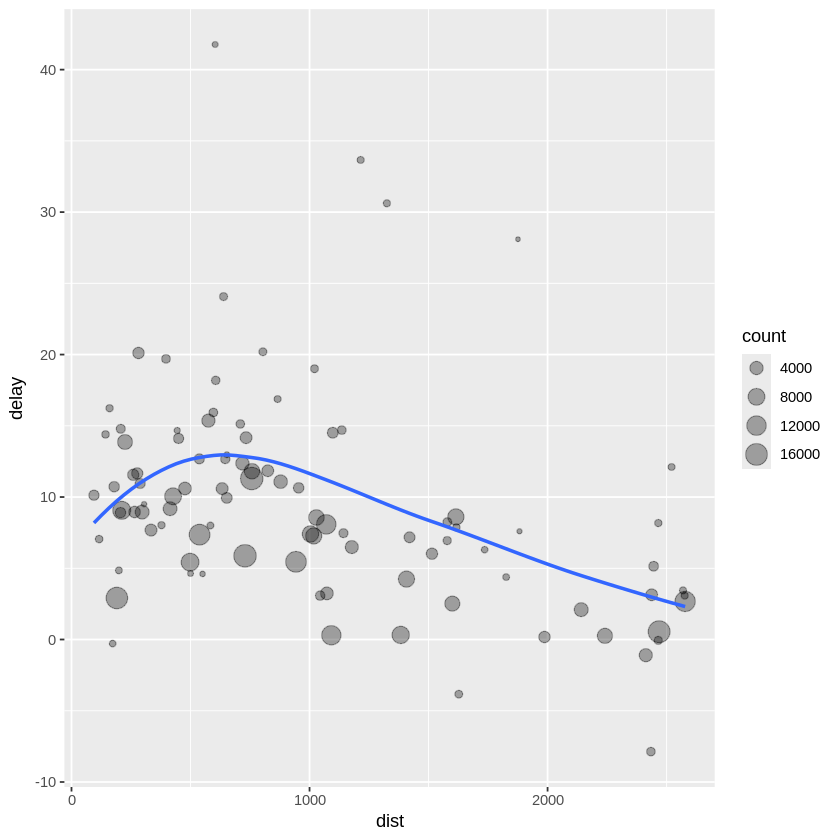

In [85]:
# 위 코드를 시각화
# 도착지가 같은 것들을  dist, delay의 평균을 낸다
# 그리고 시각화하면 dist가 길어지면 delay가 감소하는 것을 볼 수 있다.

flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>%
ggplot(mapping = aes(x = dist, y = delay)) + # x축을 dist, y축을 delay
  geom_point(aes(size = count), alpha = 1/3) + # count가 숫자가 높으면 동그라미 커짐, alpha는 동그라미의 투명도
  geom_smooth(se = FALSE) # 중간에 파란선으로 감소되는 것을 잘 보여줌

5.6.7 연습문제

1. 비행 그룹의 전형적인 지연 특성을 평가하는 5가지 방법 :

  1: 비행기가 50%의 경우 15분 일찍 도착하고, 50%의 경우 15분 늦게 도착함    
        평균 도착 시간을 계산하여 일반적인 지연 특성을 평가    
  2: 비행기가 항상 10분 늦게 도착함    
        전체 비행의 평균 지연 시간을 10분으로 기록
  3: 비행기가 50%의 경우 30분 일찍 도착하고, 50%의 경우 30분 늦게 도착함   
        지연의 표준편차를 계산하여 변동성을 평가
  4: 99%의 경우 비행기가 정시에 도착하고, 1%의 경우 2시간 늦게 도착함    
        전체 비행의 평균과 중앙값을 비교하여 지연의 분포를 파악
  5: 지연 시간을 비행의 거리와 비교하여 어떤 거리에서 지연이 더 심한지 분석

  6: 도착 지연과 출발 지연 중 어느 것이 더 중요한가?    
            도착 지연이 더 중요하다. 승객이 도착하는 시간에 직접적인 영향을 미치기 때문이다. 출발 지연은 도착 시간에 영향을 줄 수 있지만, 상대적으로 덜 중요하게 여겨진다.
2. not_cancelled %>% count(dest)와 not_cancelled %>% count(tailnum, wt = distance)와 같은 출력을 주는 다른 접근법이 있을까?     
(without using count())

3. 하루별 취소된 비행 수를 확인하고 패턴이 있는지 조사. 취소된 비행의 비율이 평균 지연과 관련이 있는가?

In [91]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


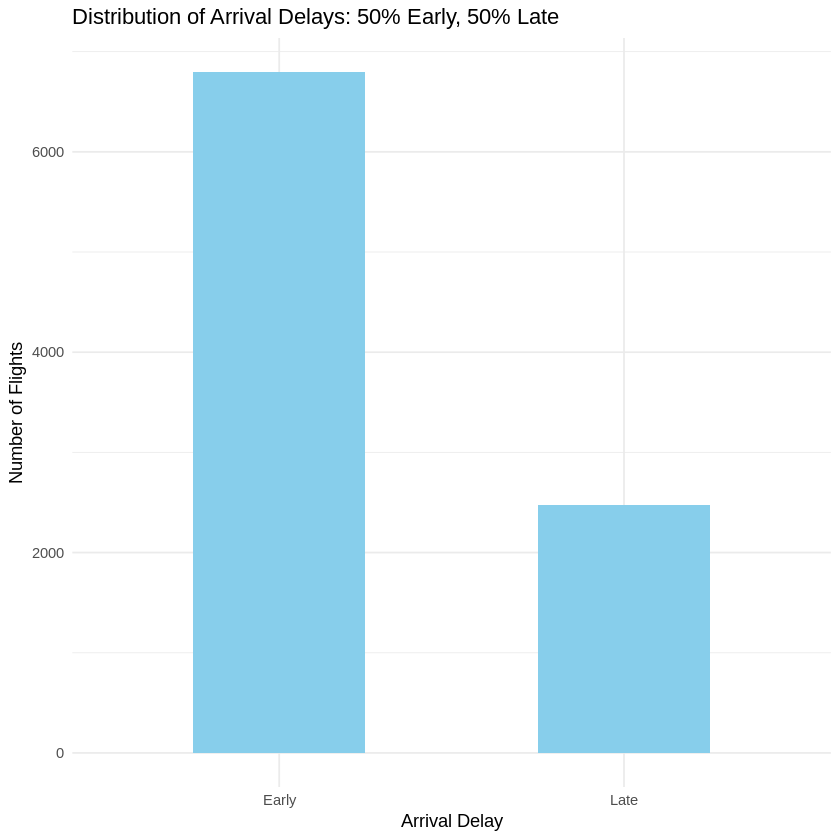

In [110]:
# 1. 비행기의 50%가 15분 일찍 도착하고 50%가 15분 늦게 도착하는 것을 보여라

#flights %>% group_by(dest) %>%
#  summarise(arr_time_mean = mean(arr_time, na.rm = TRUE), sched_arr_time_mean = mean(sched_arr_time, na.rm = TRUE)) %>%
#  mutate(rate_minuate = arr_time_mean - sched_arr_time_mean)

flights_filtered <- flights %>%
  filter(arr_delay == -15 | arr_delay == 15) %>%
  mutate(arr_delay = factor(arr_delay, levels = c(-15, 15), labels = c("Early", "Late")))

# 시각화
ggplot(flights_filtered, aes(x = arr_delay)) +
  geom_bar(aes(y = ..count..), fill = "skyblue", width = 0.5) +
  labs(title = "Distribution of Arrival Delays: 50% Early, 50% Late",
       x = "Arrival Delay",
       y = "Number of Flights") +
  theme_minimal()

In [118]:
# 2. 비행기가 항상 10분 늦게 도착함

# 도착지 기준으로 arr_delay 평균이 10 이상인 것을 출력
flights %>%
  group_by(dest) %>%
    summarise(arr_delay = mean(arr_delay, na.rm=TRUE)) %>%
    filter(arr_delay > 10) %>% head()

# 정확히 10분만 늦은 비행기 출력
flights %>%
  filter(arr_delay == 10) %>%
  group_by(dest, arr_delay) %>%
  summarise(count = n()) %>% head()

dest,arr_delay
<chr>,<dbl>
ALB,14.39713
ATL,11.30011
BHM,16.87732
BNA,11.81246
BWI,10.72673
CAE,41.76415


`summarise()` has grouped output by 'dest'. You can override using the
`.groups` argument.


dest,arr_delay,count
<chr>,<dbl>,<int>
ABQ,10,2
ACK,10,3
ALB,10,6
ANC,10,2
ATL,10,244
AUS,10,23


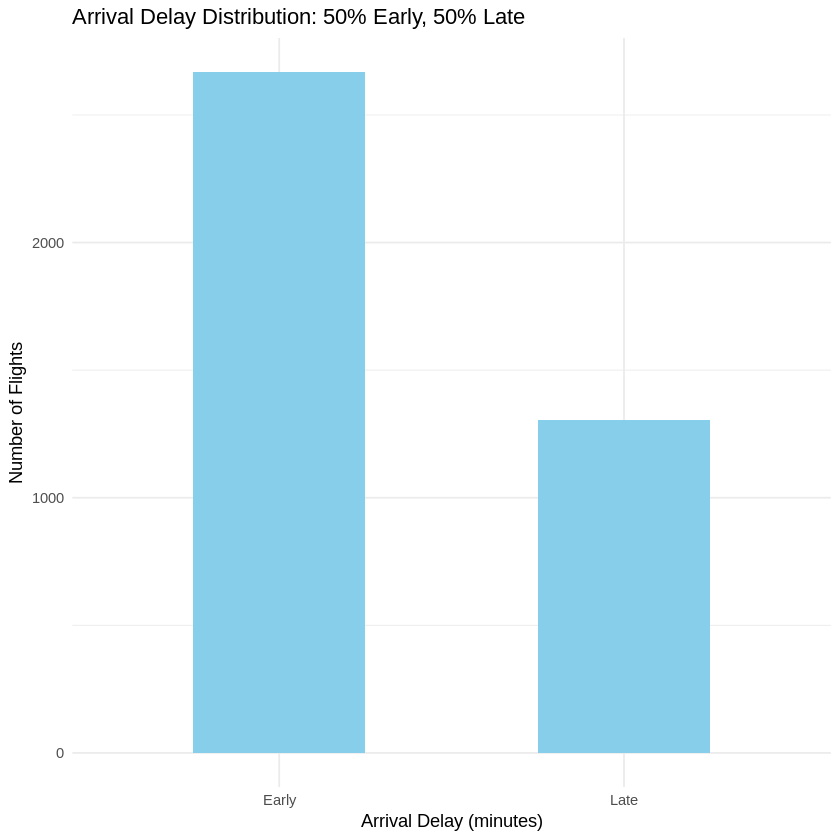

In [136]:
# 3. 비행기가 50%의 경우 30분 일찍 도착하고, 50%의 경우 30분 늦게 도착함

flights_filtered <- flights %>%
  filter(arr_delay == -30 | arr_delay == 30) %>%
  mutate(arr_delay = factor(arr_delay, levels = c(-30, 30), labels = c("Early", "Late")))  #범주형자료로 바꿈

ggplot(flights_filtered, aes(x = arr_delay)) +
  geom_bar(aes(y = ..count..), fill = "skyblue", width = 0.5) +
  labs(title = "Arrival Delay Distribution: 50% Early, 50% Late",
       x = "Arrival Delay (minutes)",
       y = "Number of Flights") +
  theme_minimal()

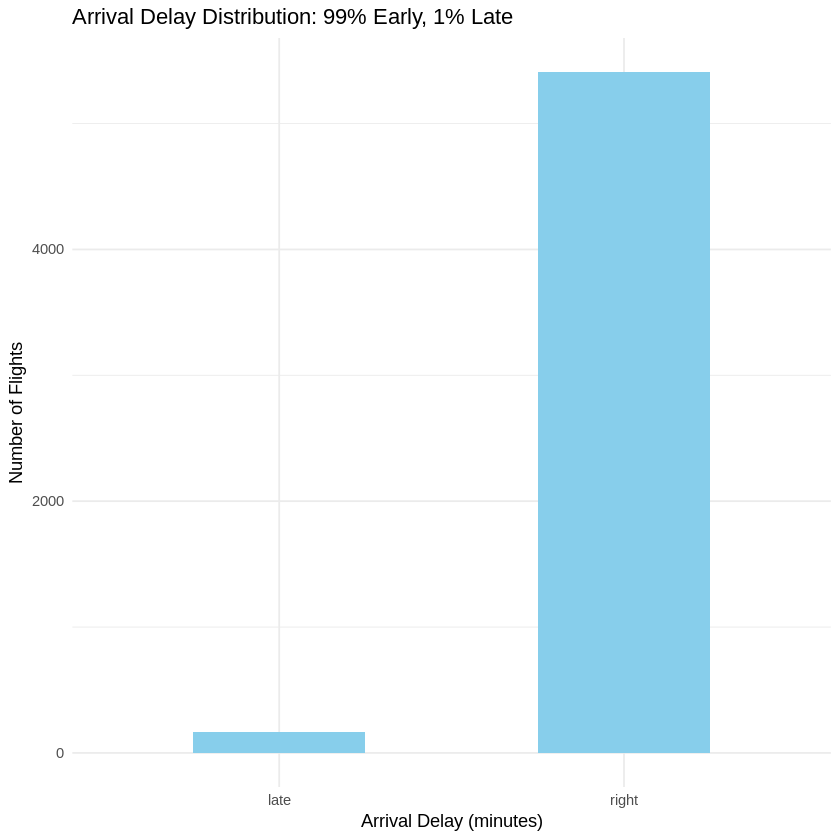

In [135]:
# 4. 99%의 경우 비행기가 정시에 도착하고, 1%의 경우 2시간 늦게 도착함

flights_filtered <-
  flights %>%
  filter(arr_delay == 0 | arr_delay == 120) %>%
  mutate(arr_delay_new = case_when(arr_delay == 0 ~ "right", arr_delay == 120 ~ "late")) #범주형자료로 바꿈

ggplot(flights_filtered, aes(x = arr_delay_new)) +
  geom_bar(aes(y = ..count..), fill = "skyblue", width = 0.5) +
  labs(title = "Arrival Delay Distribution: 99% Early, 1% Late",
       x = "Arrival Delay (minutes)",
       y = "Number of Flights") +
  theme_minimal()

In [137]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


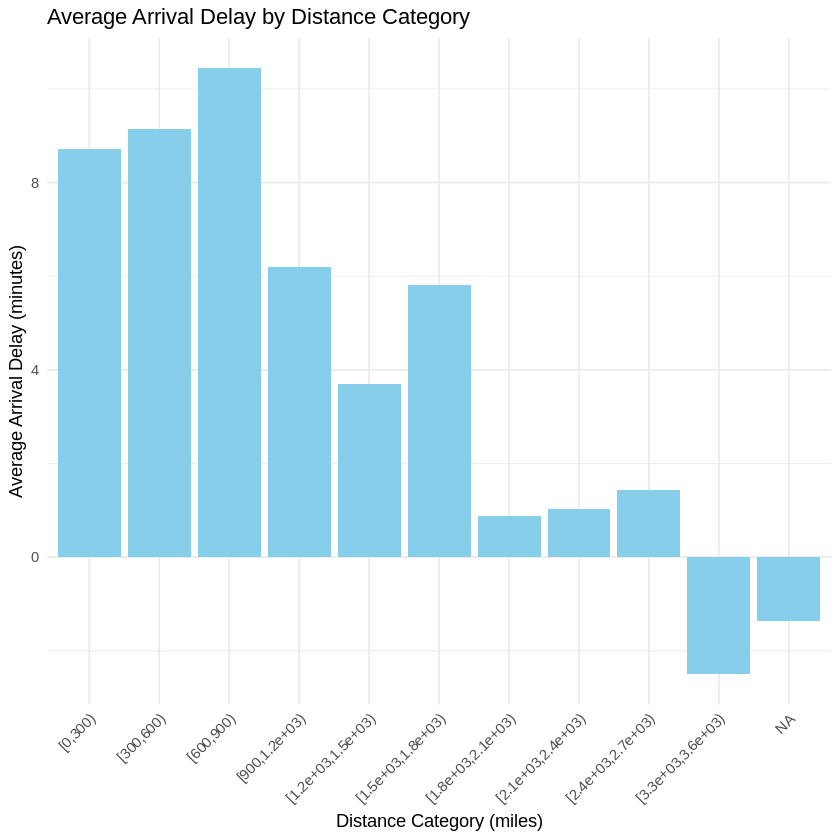

In [165]:
 # 5. 지연 시간을 비행의 거리와 비교하여 어떤 거리에서 지연이 더 심한지 분석 (막대그래프로 표현)

flights_filtered <-
   flights %>%
     mutate(distance_category = cut(distance,
                                 breaks = seq(0, max(distance, na.rm = TRUE), by = 300),
                                 include.lowest = TRUE,
                                 right = FALSE)) %>%
                                   group_by(distance_category) %>%
                                   summarise(arr_delay = mean(arr_delay, na.rm=TRUE))

ggplot(flights_filtered, aes(x = distance_category, y = arr_delay)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Arrival Delay by Distance Category",
       x = "Distance Category (miles)",
       y = "Average Arrival Delay (minutes)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # x축 레이블 기울이기

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 31 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 31 rows containing missing values or values outside the scale range
(`geom_point()`).”


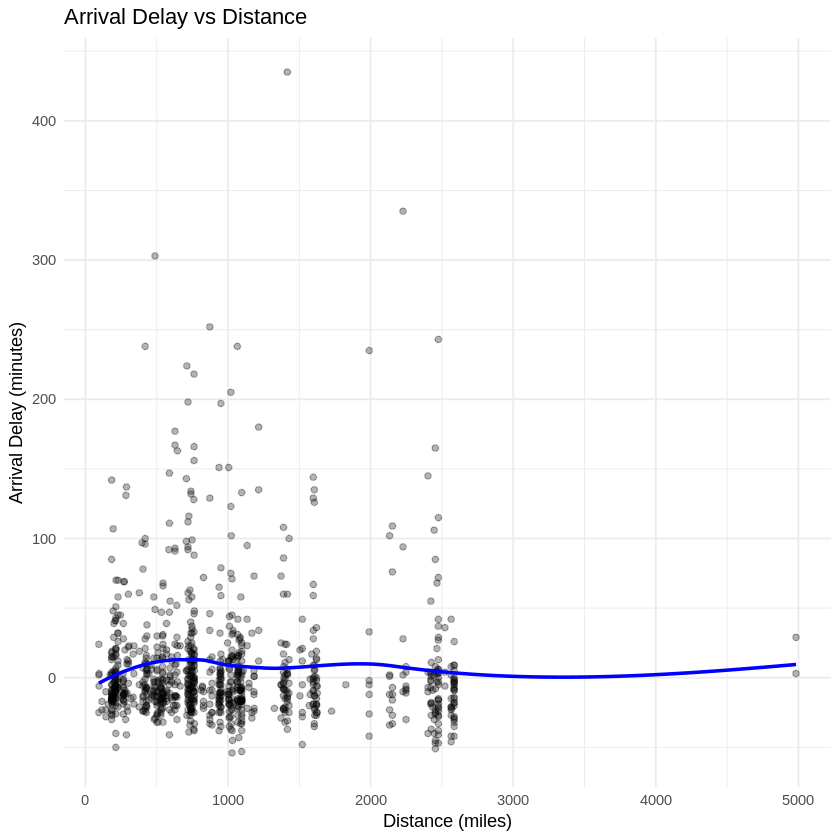

In [3]:
 # 5. 지연 시간을 비행의 거리와 비교하여 어떤 거리에서 지연이 더 심한지 분석 (산점도로 표현)
# flights_filtered <- flights %>%
#   select(distance, arr_delay) %>%
#   filter(!is.na(arr_delay))  # 결측값 제거

# # 산점도 시각화
# ggplot(flights_filtered, aes(x = distance, y = arr_delay)) +
#   geom_point(alpha = 0.3) +  # 점의 투명도 조정
#   geom_smooth(method = "loess", se = FALSE, color = "blue") +  # 로컬 회귀선 추가
#   labs(title = "Arrival Delay vs Distance",
#        x = "Distance (miles)",
#        y = "Arrival Delay (minutes)") +
#   theme_minimal()

flights_sampled <- flights %>%
  sample_n(1000)  # 1000개의 랜덤 샘플 선택

ggplot(flights_sampled, aes(x = distance, y = arr_delay)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Arrival Delay vs Distance",
       x = "Distance (miles)",
       y = "Arrival Delay (minutes)") +
  theme_minimal()

In [26]:
#2 not_cancelled %>% count(dest) 와 not_cancelled %>% count(tailnum, wt = distance)를 다른 방식으로 표현해보자

  # not_cancelled 데이터프레임 생성 (비행 취소된 것 제외)

      # (A)
      # not_cancelled <- flights %>% count(dest) #dest가 같은 것 갯수 계산


      # (B)
      #  not_cancelled <- flights %>%
      #  filter(!is.na(arr_delay)) %>%
      #  count(tailnum, wt = distance) #wt = distance 는 비행의 거리로 가중치를 부여하겠다는 의미임. (같은 비행기 이름이면 거리 다 더함)

#not_cancelled


      # 위 두 코드를 다른 방식으로 표현

      #(A)
      # flights %>% group_by(dest) %>% summarise(N=n())

      #(B)
      flights %>% group_by(tailnum) %>% filter(!is.na(arr_delay)) %>% summarise(sum_tailnum_distance = sum(distance)) %>% head()

tailnum,sum_tailnum_distance
<chr>,<dbl>
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616


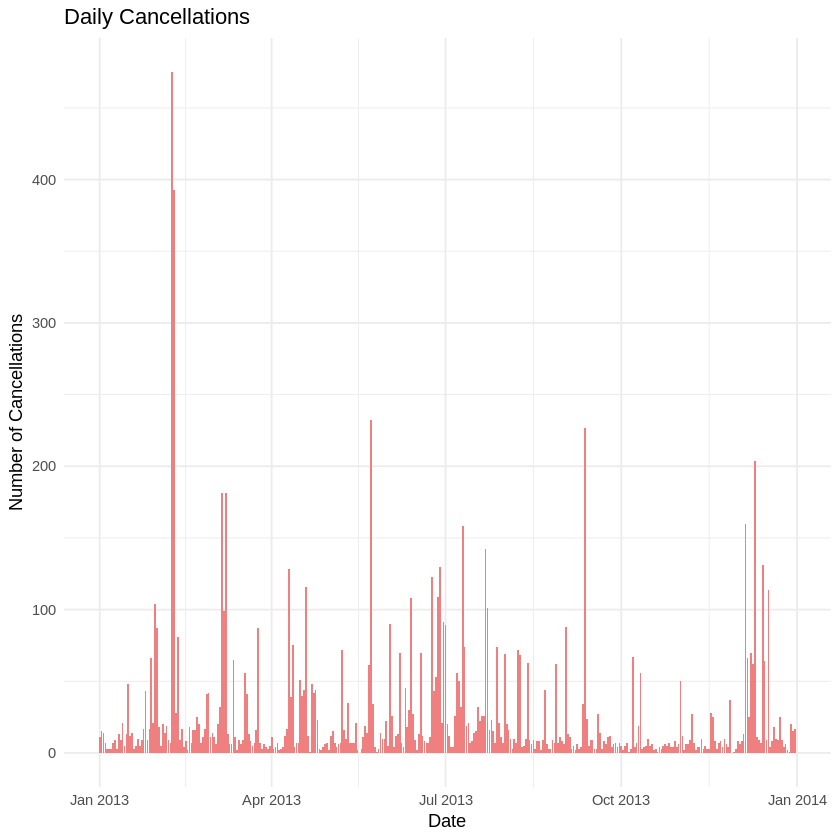

In [33]:
# 3. 하루별 취소된 비행 수를 확인하고 패턴이 있는지 조사. 취소된 비행의 비율이 평균 지연과 관련이 있는가?

cancellations_per_day <- flights %>% group_by(year, month, day) %>%
  filter(is.na(arr_delay)) %>%
  summarise(N = n(), .groups = 'drop') # .groups='drop'은 그룹화를 해제하겠다는 의미

# 취소 비율과 평균 지연 시간의 관계 시각화
ggplot(cancellations_per_day, aes(x = as.Date(paste(year, month, day, sep = "-")), y = N)) +
  geom_bar(stat = "identity", fill = "lightcoral") +
  labs(title = "Daily Cancellations",
       x = "Date",
       y = "Number of Cancellations") +
  theme_minimal()

## Data visualization - ggplot


In [34]:
mpg %>% head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


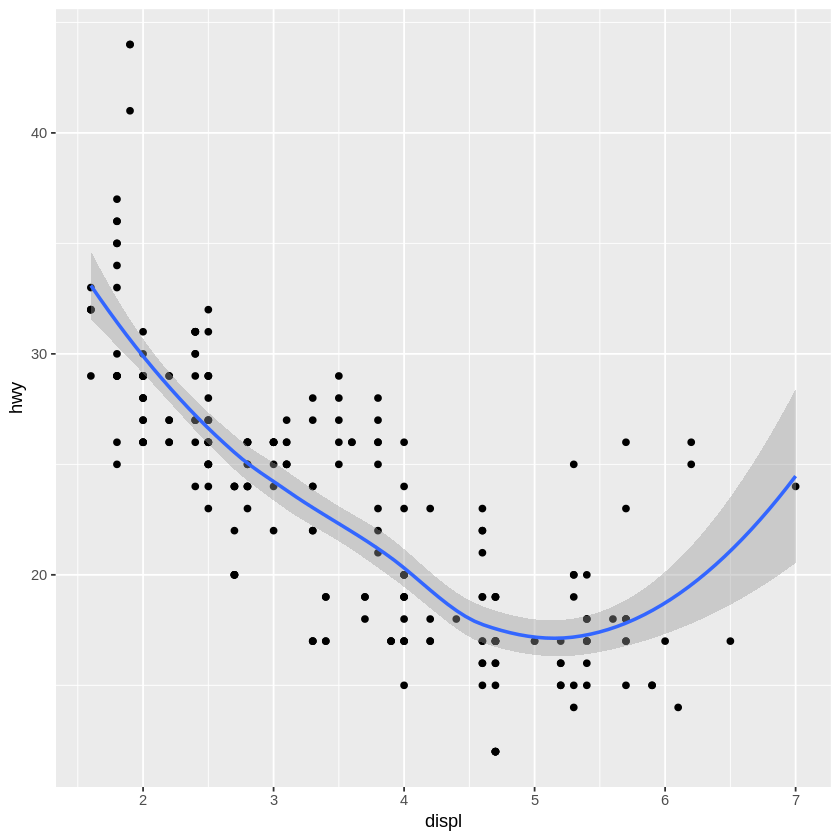

In [36]:
# 밑의 코드와 결과 동일함
# x축과 y축을 설정한 다음 점과 선을 추가

ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


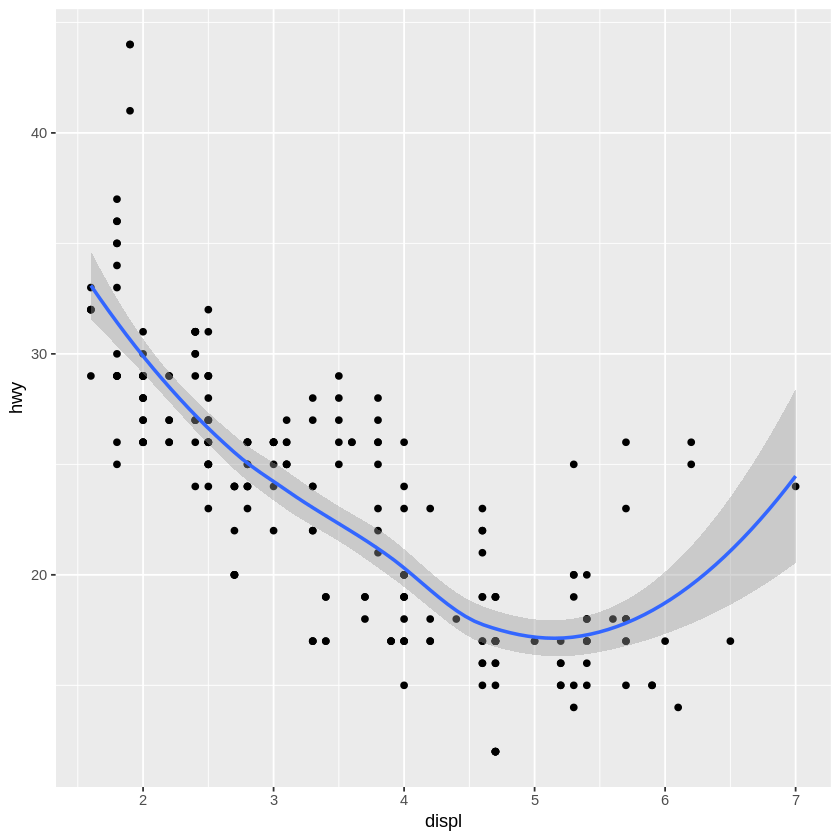

In [37]:
# 밑의 코드와 결과 동일함
# x축과 y축을 미리 설정하지 않고 점과 선을 그릴 때마다 지정해줌

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + geom_smooth(mapping = aes(x = displ, y = hwy))

3.2.4 연습 문제
1. ggplot(data = mpg)를 실행하면 무엇이 보이나요?
2. mpg에는 몇 개의 행, 몇 개의 열이 있나요?
3. drv 변수는 무엇을 설명하나요?
4. hwy와 cyl의 산점도를 만들어 보세요.
5. class와 drv의 산점도를 만들어 보세요. 이 결과가 유용하지 않은 이유는?

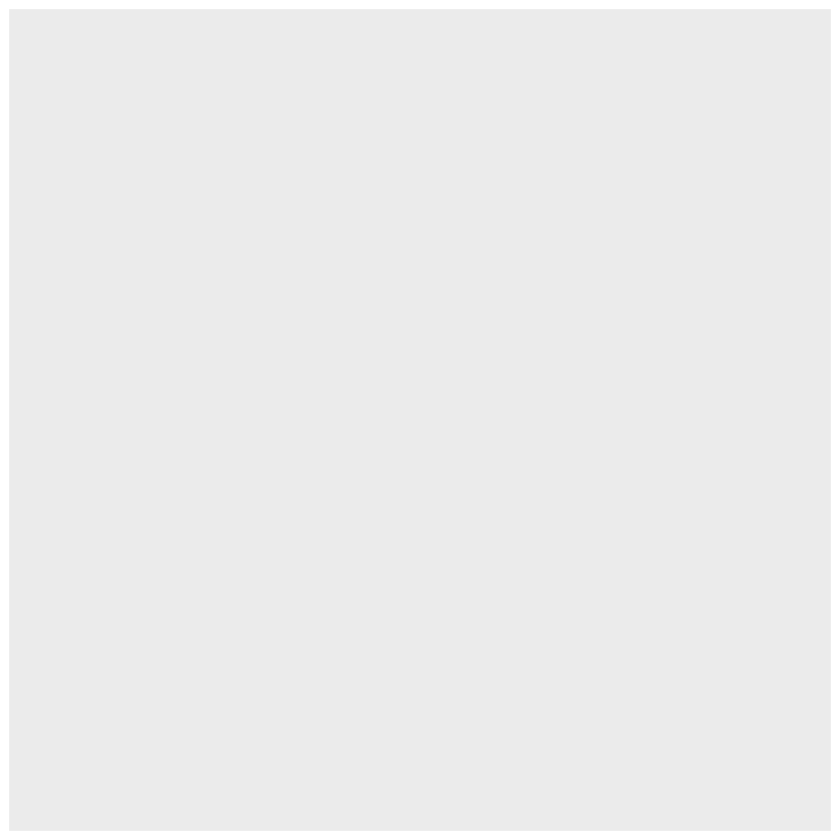

In [40]:
# 1. ggplot(data = mpg)를 실행하면 무엇이 보이나요?
ggplot(data = mpg) # 아무것도 안나옴

In [45]:
# 2. mpg에는 몇 개의 행, 몇 개의 열이 있나요?
nrow(mpg)
ncol(mpg)

str(mpg)

[1] 234

[1] 11

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [46]:
# 3. drv 변수는 무엇을 설명하나요?

?mpg

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


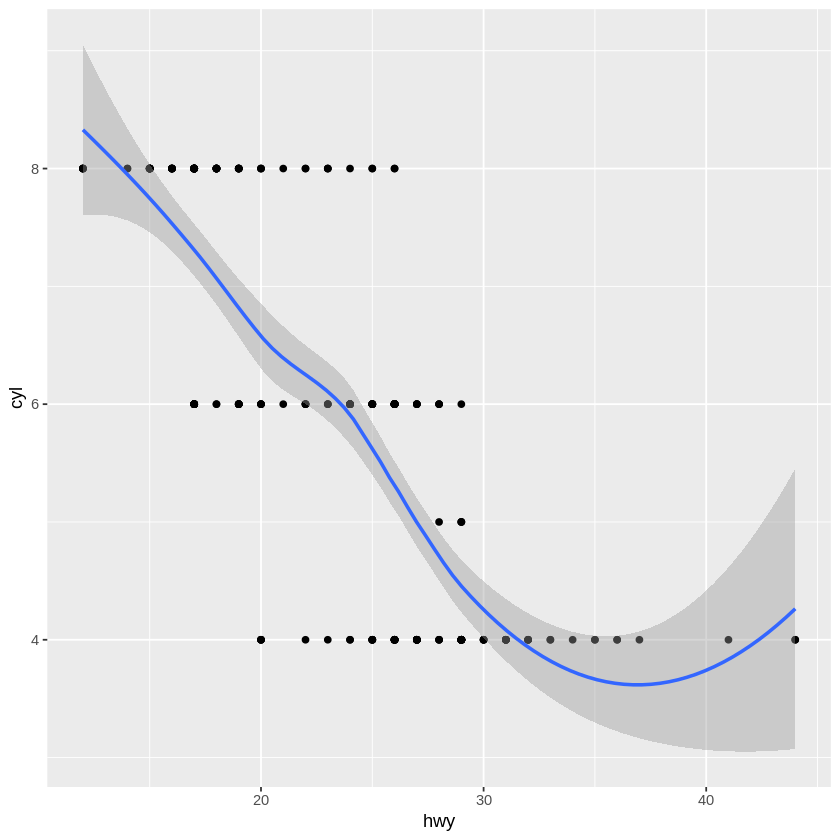

In [50]:
# 4. hwy와 cyl의 산점도를 만들어 보세요.

ggplot(data = mpg, mapping = aes(x = hwy, y = cyl)) +
  geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


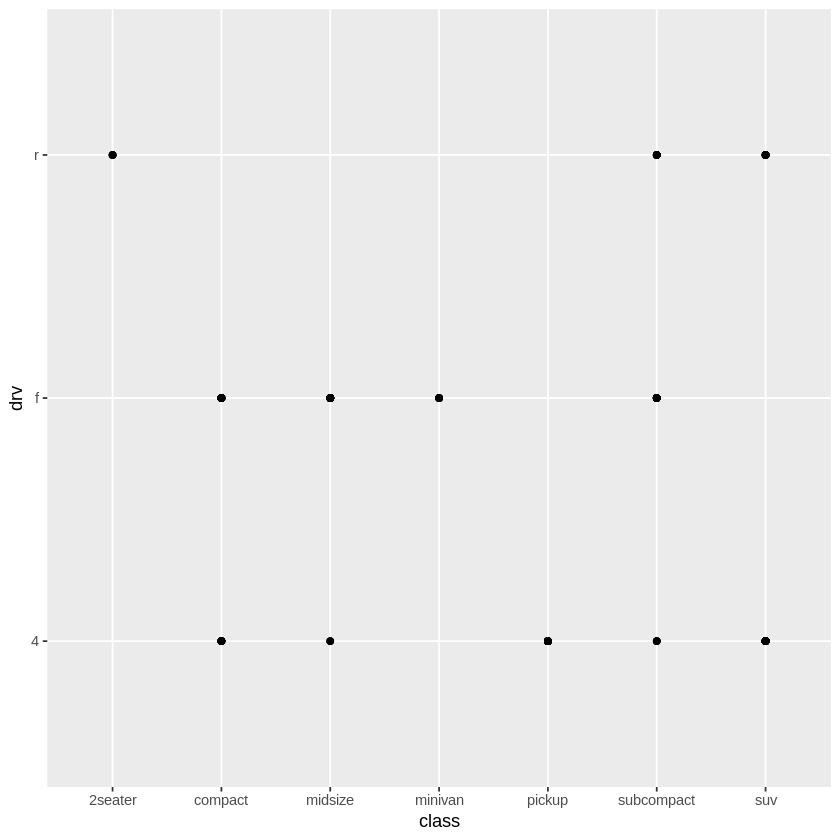

In [51]:
# 5. class와 drv의 산점도를 만들어 보세요. 이 결과가 유용하지 않은 이유는?

ggplot(data = mpg, mapping = aes(x = class, y = drv)) +
  geom_point() + geom_smooth()

# 유용하지 않은 이유
# 1. 범주형 변수: class와 drv 모두 범주형 변수입니다. 산점도는 연속형 변수를 시각화하는 데 적합하고 범주형 변수는 점들이 특정 위치에 모여서 의미 있는 패턴을 형성하기 어렵습니다.

# 2. 포화된 시각화: 각 범주에 대한 점이 밀집되어 있으면 데이터의 분포를 이해하기 어렵다. class의 각 유형에 대해 drv의 값들이 어떻게 분포하는지 시각적으로 표현하기 어렵습니다.

# 3. 정보 손실: 두 범주형 변수를 비교할 때 산점도를 사용하면 각 변수의 값을 잘 나타낼 수 없고, 정보가 손실될 수 있습니다. 이 대신, 바 차트나 교차표와 같은 다른 시각화 방법을 사용하는 것이 더 유용합니다.

# 결론적으로, 범주형 변수 간의 관계를 이해하려면 다른 시각화 방법이 더 적합합니다.

### Aesthetic mappings :
Aesthetic mappings는 ggplot2에서 변수와 시각적 요소를 연결하는 방식을 설명한다.
데이터의 다양한 특성을 시각적으로 표현할 수 있다.

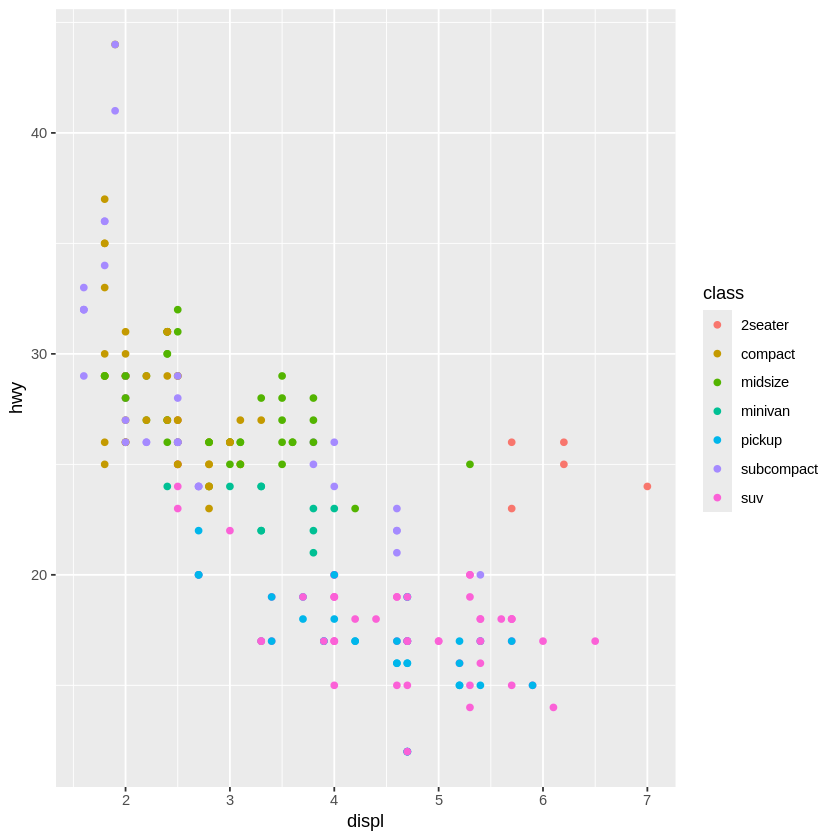

In [58]:
# x축  :  displ열
# y축  :  hwy열
# 색상 :  class열

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

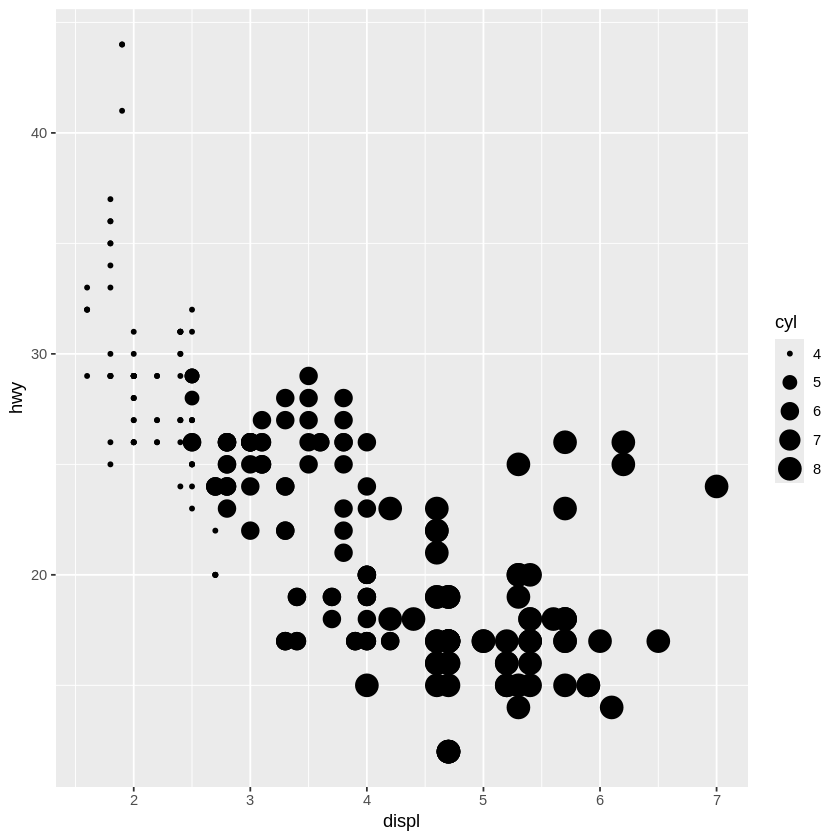

In [59]:
# x축  :  displ열
# y축  :  hwy열
# 색상 :  cyl열

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, size = cyl))

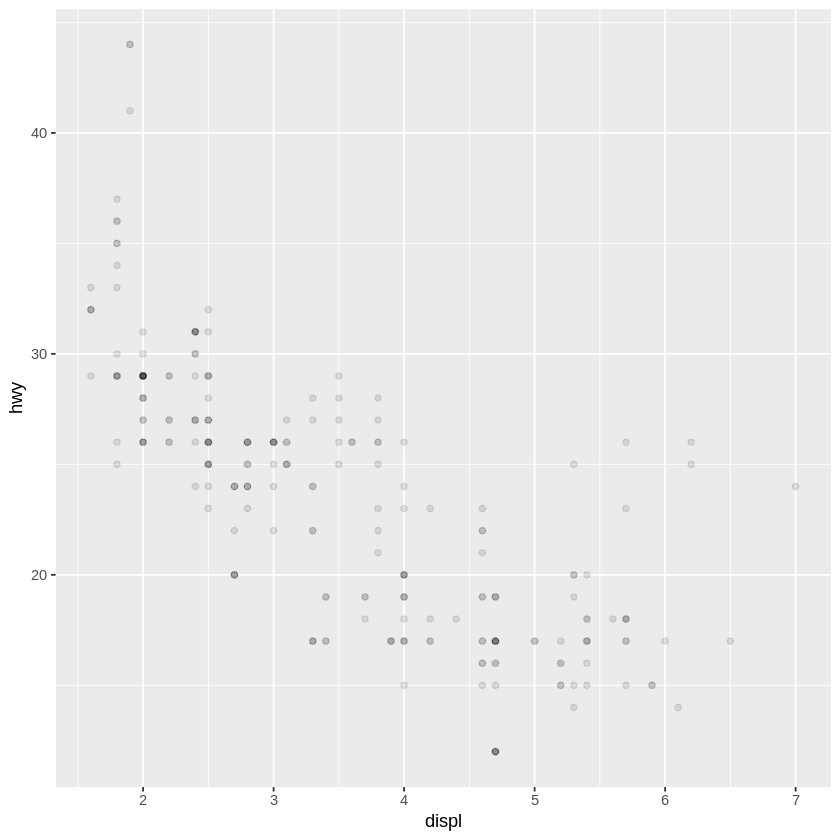

In [61]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), alpha = 0.1)

In [62]:
mpg %>% head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


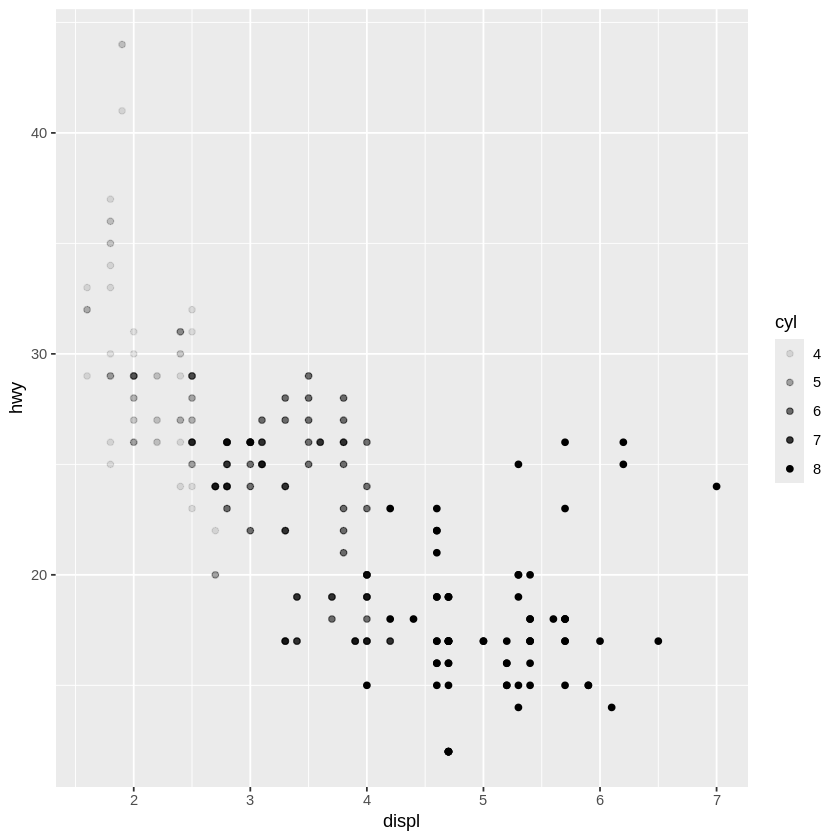

In [63]:
# x축  :  displ열
# y축  :  hwy열
# alpha:  cyl열

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, alpha = cyl))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


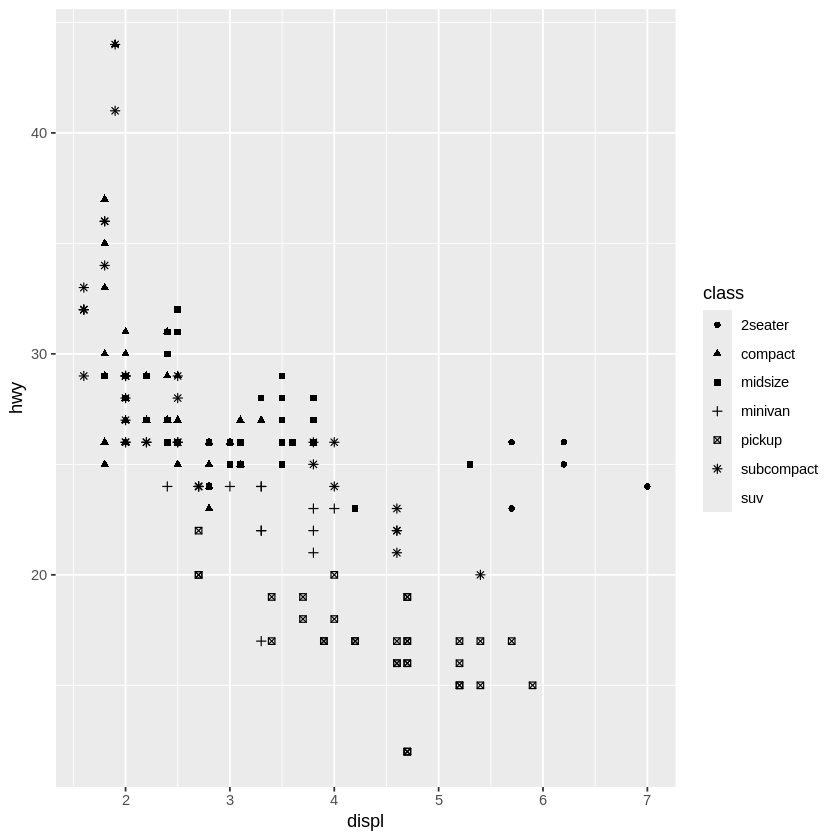

In [64]:
# x축  :  displ열
# y축  :  hwy열
# shape:  class열

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

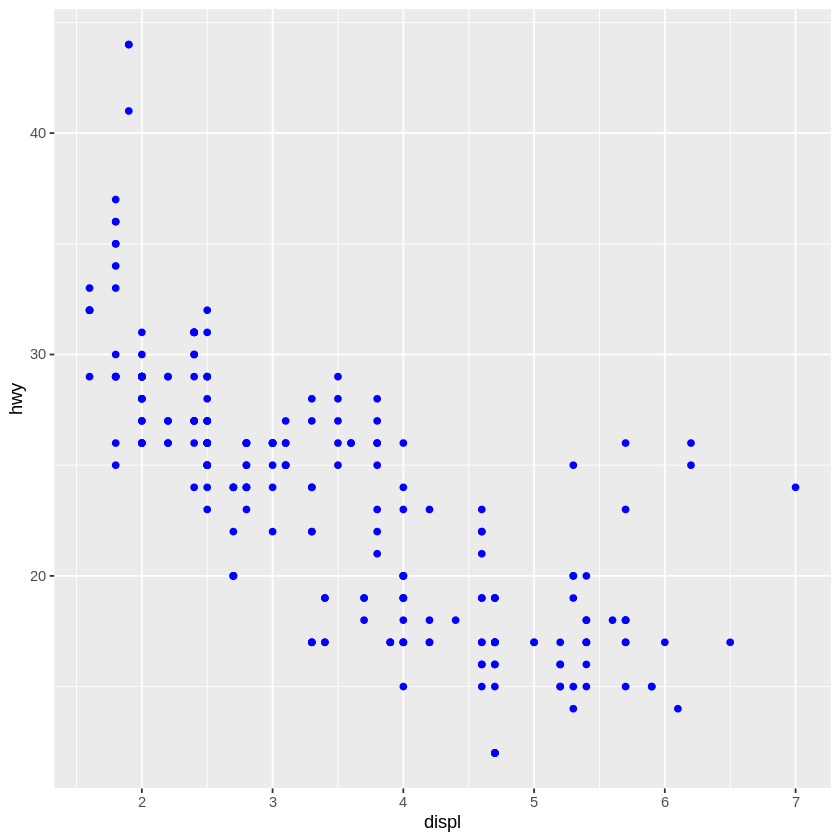

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

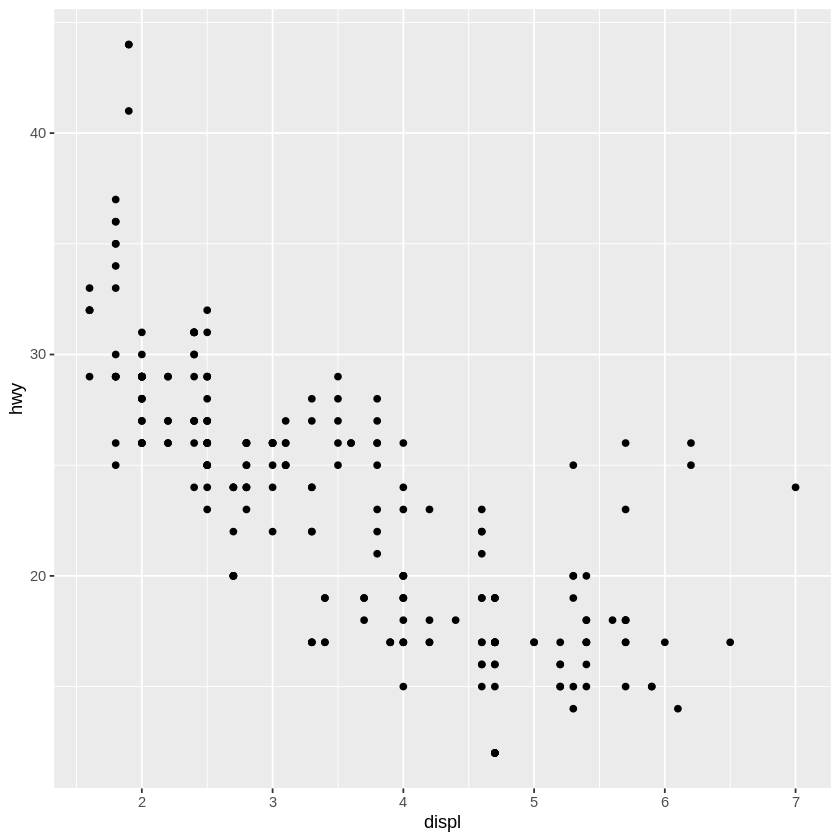

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

###declare global mapping information in ggplot()

ggplot(data = mpg, aes(x = displ, y = hwy, color = class)):

  1. displ을 x축에, hwy를 y축에, class에 따라 색상을 설정합니다.    
  이 설정은 이후 추가되는 모든 레이어에 적용됩니다.


  2. geom_point(): 점 그래프를 추가하며, 여기서 color는 class에 따라 지정된 색상으로 나타납니다.


  3. geom_smooth(se = FALSE): 선형 회귀선을 추가하고, 이전에 설정된 displ, hwy 매핑이 그대로 적용됩니다.

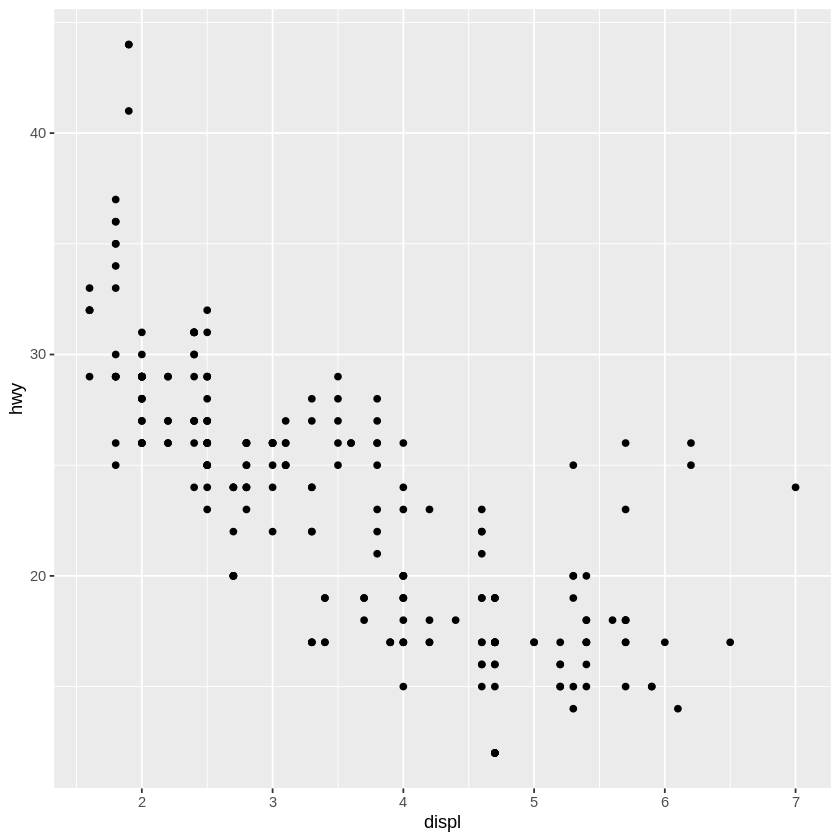

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point()

Add graphical layers

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


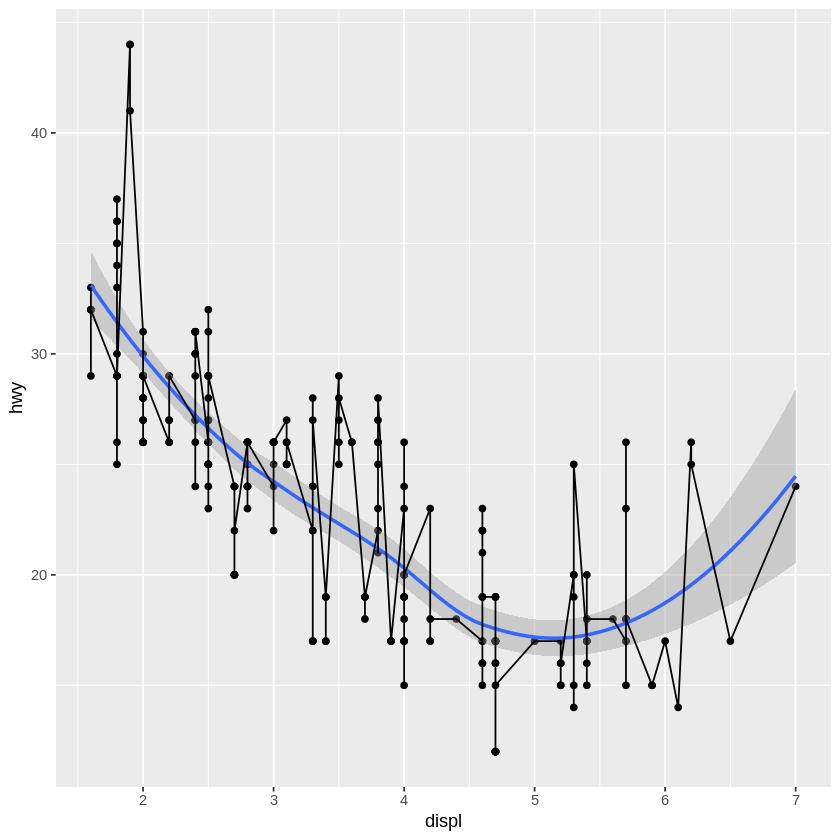

In [65]:
# geom_line 추가

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + geom_smooth(mapping = aes(x = displ, y = hwy)) + geom_line(mapping = aes(x = displ, y = hwy))

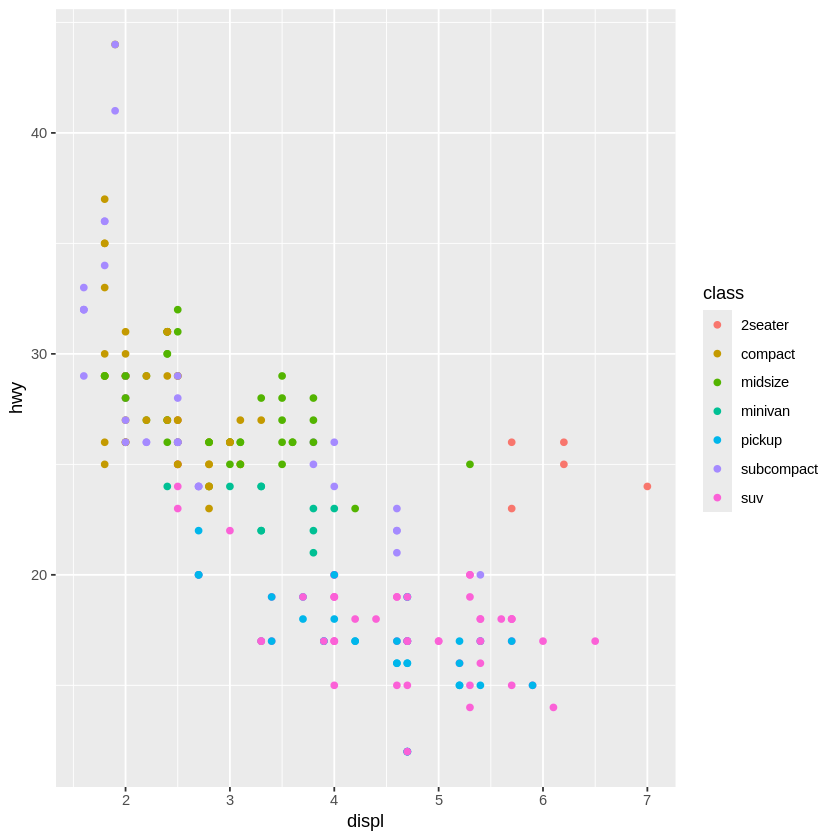

In [67]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = class)) + geom_point()

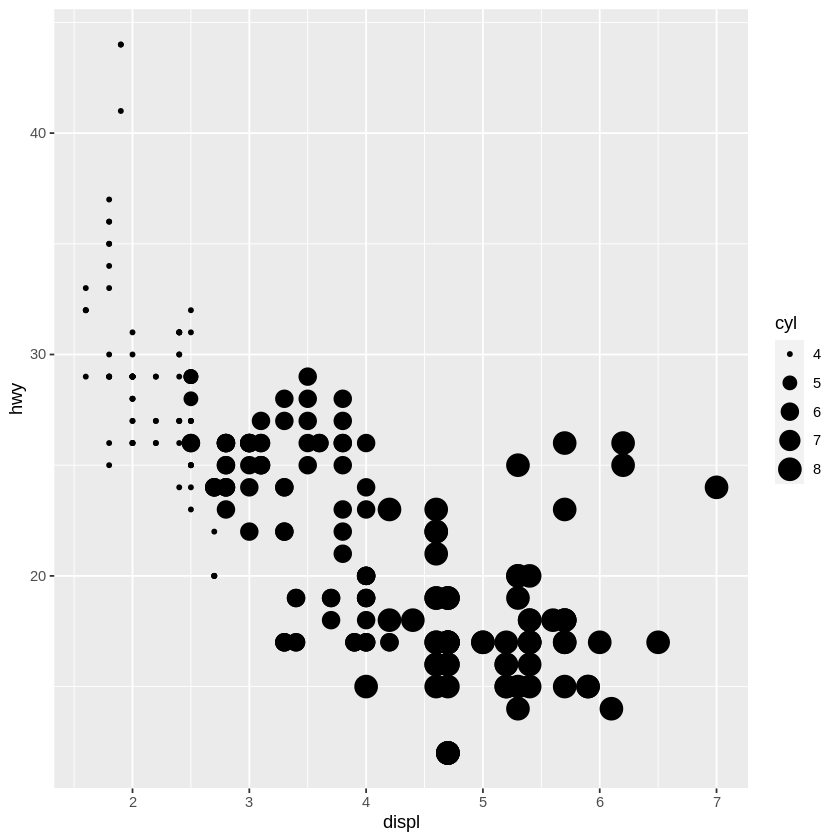

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, size = cyl)) + geom_point()

Warning message:
“Using alpha for a discrete variable is not advised.”


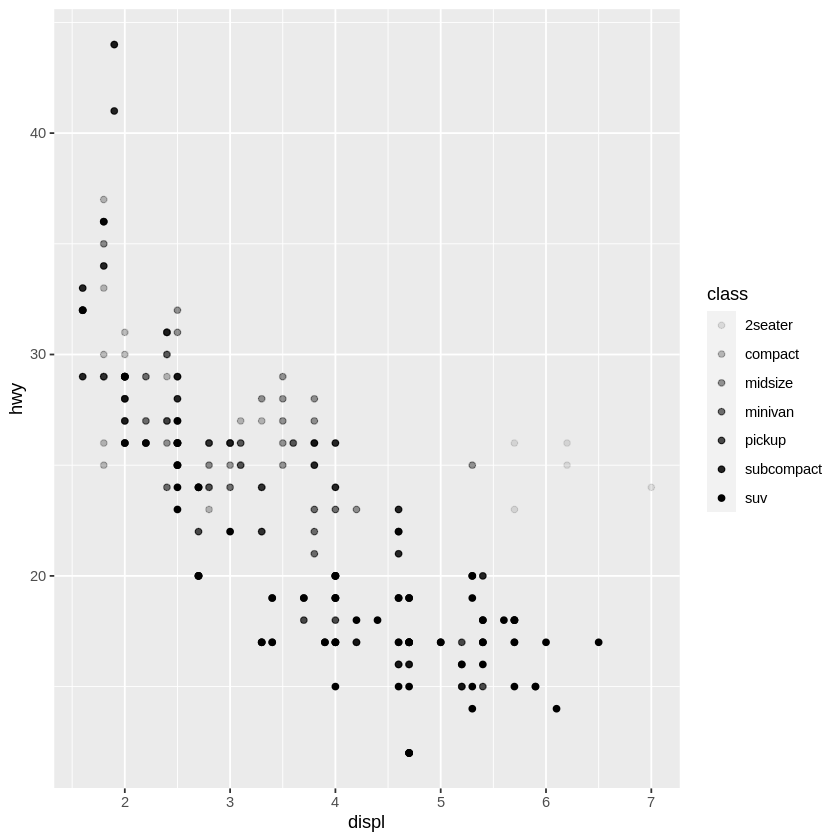

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, alpha = class)) + geom_point()

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


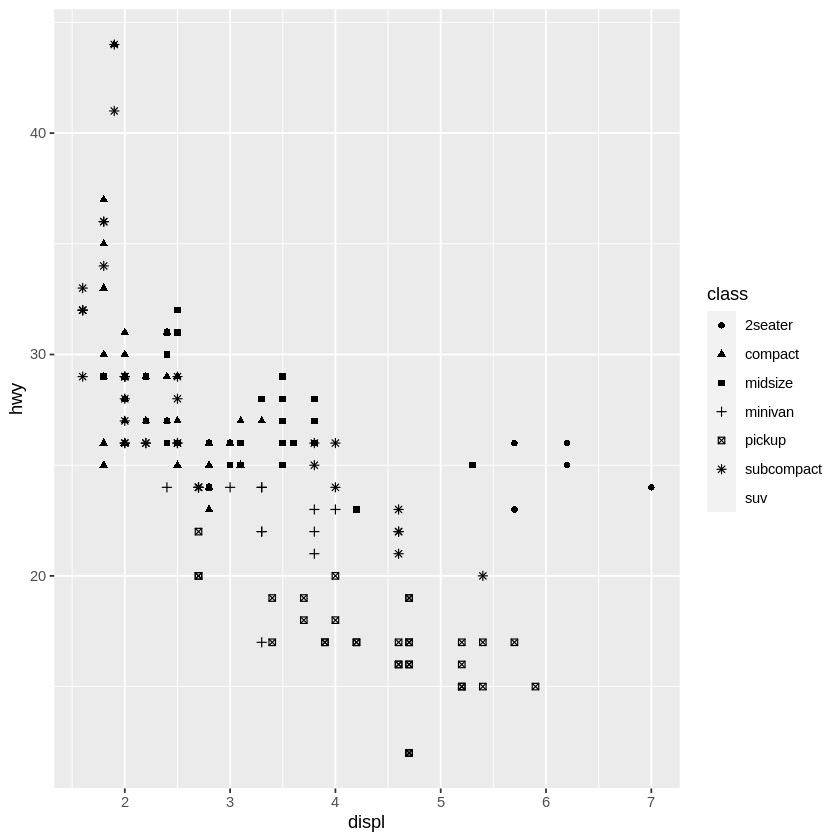

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, shape = class)) + geom_point()

3.3.1 연습 문제
1. 이 코드에서 잘못된 점은 무엇인가요? 왜 점들이 파란색이 아닌가요?
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))
```
2. mpg에서 범주형 변수는 어떤 것들이고, 연속형 변수는 어떤 것들이 있나요? (힌트: ?mpg를 입력하여 데이터셋에 대한 문서를 읽어보세요.) mpg를 실행할 때 이 정보를 어떻게 확인할 수 있나요?

3. 연속형 변수를 색상, 크기, 형태에 매핑해 보세요. 이러한 aesthetics가 범주형 변수와 연속형 변수에 대해 어떻게 다르게 작동하나요?

4. 동일한 변수를 여러 aesthetics에 매핑하면 어떻게 되나요?

5. stroke aesthetic은 무엇을 하나요? 어떤 형태와 함께 작동하나요? (힌트: ?geom_point를 사용하세요.)

6. 변수 이름이 아닌 다른 값에 aesthetic을 매핑하면 어떻게 되나요? 예를 들어 aes(colour = displ < 5)와 같이 매핑할 때 어떻게 되나요? (x와 y도 지정해야 합니다.)





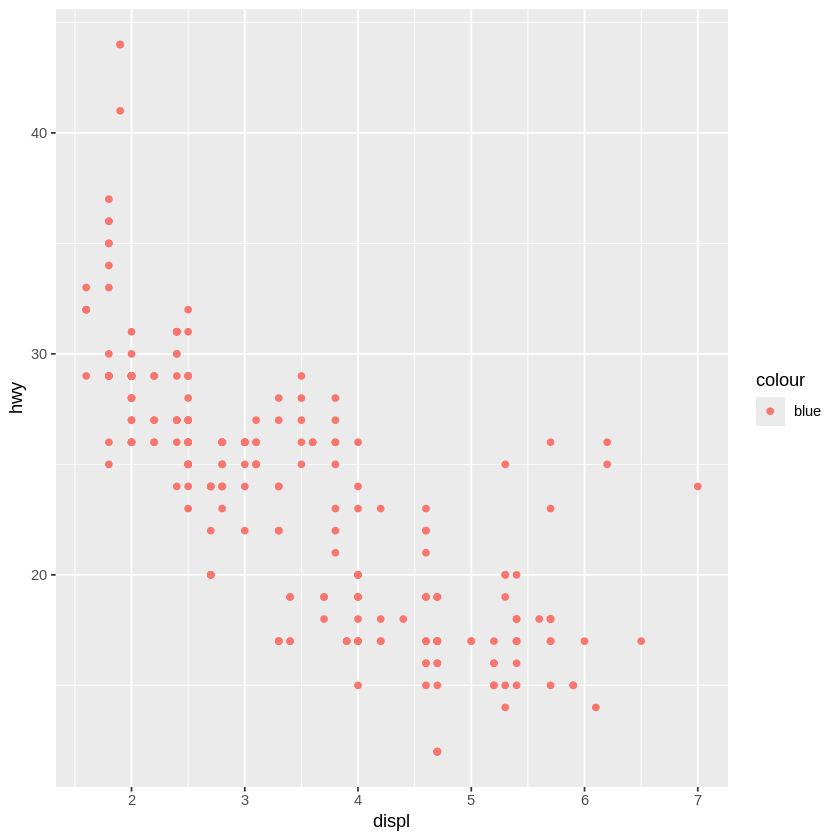

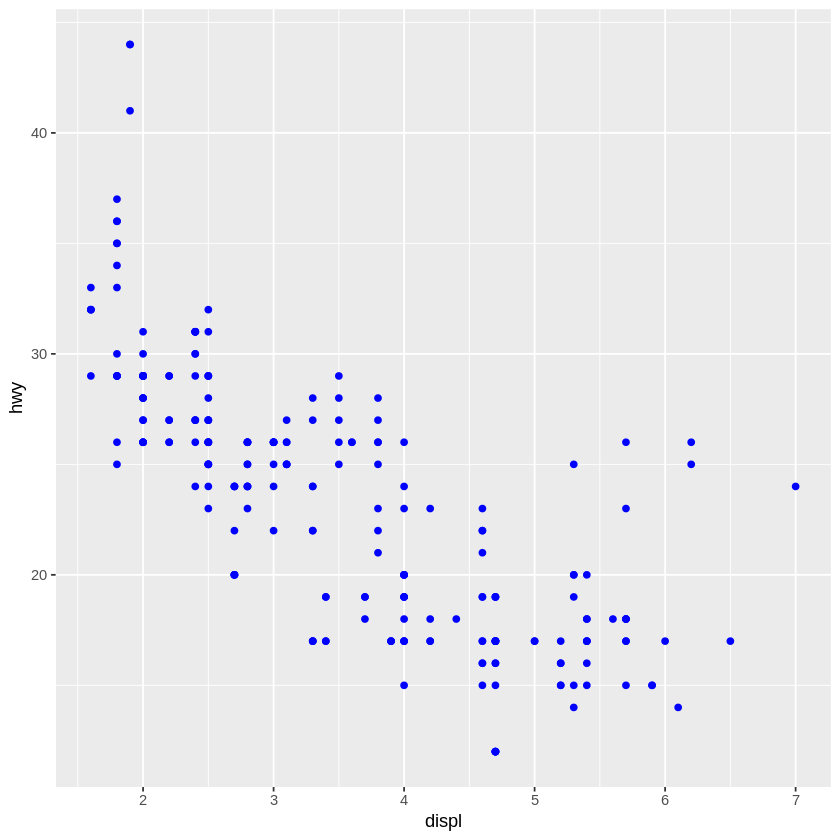

In [74]:
# 1. 이 코드에서 잘못된 점은? 왜 점이 파란색이 아닌가?

# 잘못된 이유 : aes() 내부에는 변수 이름을 사용해야 하며, 색상 같은 고정된 값을 설정할 때는 aes() 밖에서 설정해야 합니다.

# 잘못된 코드 :
  ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue")) # aes괄호 안에 color을 설정해서 변수 이름으로 간주된다.

# 올바르게 수정된 코드 :
  ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue") # aes괄호 밖에 color을 설정해주었다.

In [77]:
# 2. mpg에서 범주형 변수는 어떤 것들이고, 연속형 변수는 어떤 것들이 있나요?
# (힌트: ?mpg를 입력하여 데이터셋에 대한 문서를 읽어보세요.) mpg를 실행할 때 이 정보를 어떻게 확인할 수 있나요?
str(mpg)
?mpg

# 범주형 변수 (Categorical Variables):
  # class: 자동차 클래스 (예: "compact", "suv")
  # drv: 구동 방식 (예: "f" (앞바퀴), "r" (뒷바퀴), "4" (4륜))
  # fl: 연료 종류 (예: "c" (경유), "r" (가솔린))

# 연속형 변수 (Continuous Variables):
  # displ: 엔진 배기량
  # hwy: 고속도로 연비
  # cty: 도시 연비
  # year: 연도

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


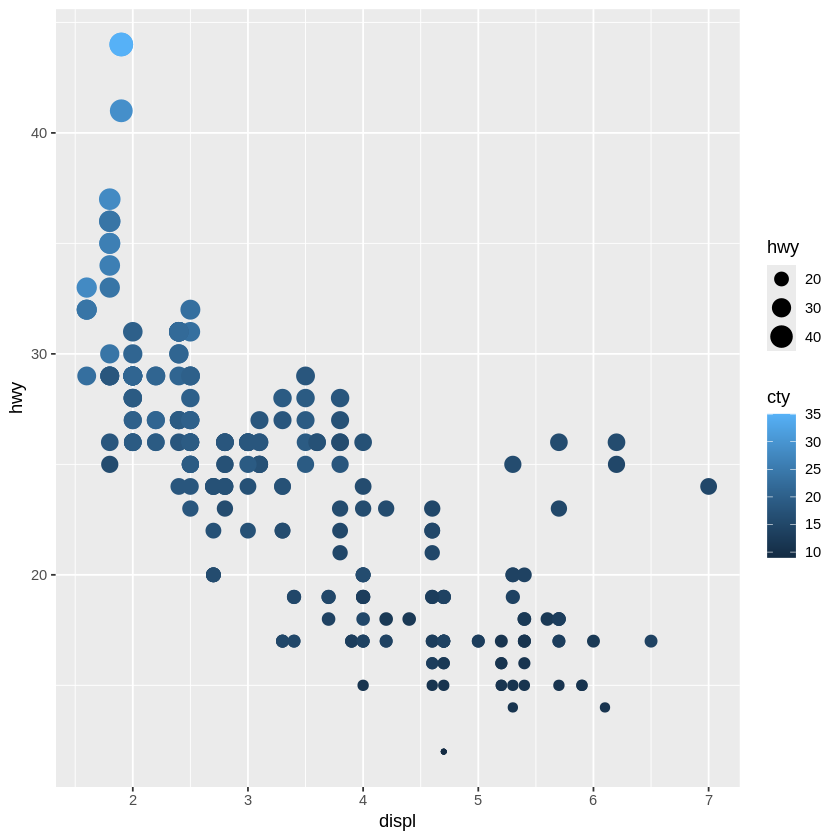

In [85]:
# 3. 연속형 변수를 색상, 크기, 형태에 매핑해보자. 이러한 aesthetics가 범주형 변수와 연속형 변수에 대해 어떻게 다르게 작동하는가?

# 연속형 변수를 색상, 크기, 형태로 매핑하는 방식은 데이터의 분포와 경향성을 시각적으로 나타내는 데 유리합니다.
# 범주형 변수를 사용할 경우, 각 범주를 명확하게 구분하는 데 유리하며, 비교하기 쉬운 형태로 표현됩니다.

# shape aesthetic은 주로 범주형 변수에 사용되며, 연속형 변수를 매핑할 경우 ggplot2는 적절하게 형태를 구분할 수 없습니다.

ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = cty, size = hwy)) + geom_point()

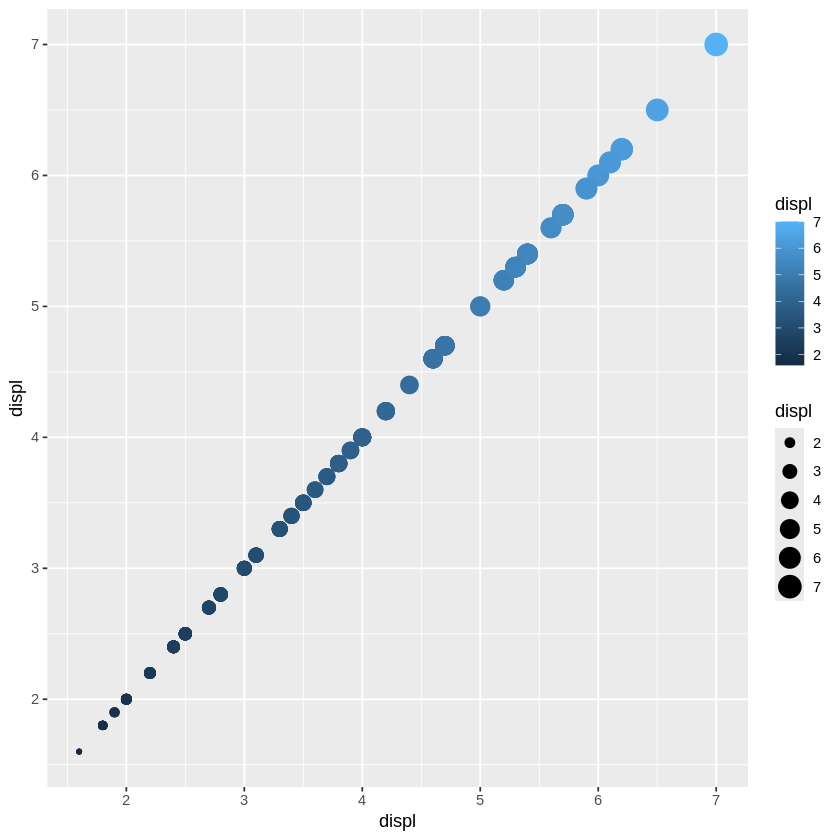

In [89]:
# 4. 동일한 변수를 여러 aesthetics에 매핑하면 어떻게 되나요?

ggplot(data = mpg, mapping = aes(x = displ, y = displ, color = displ, size = displ)) + geom_point()

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


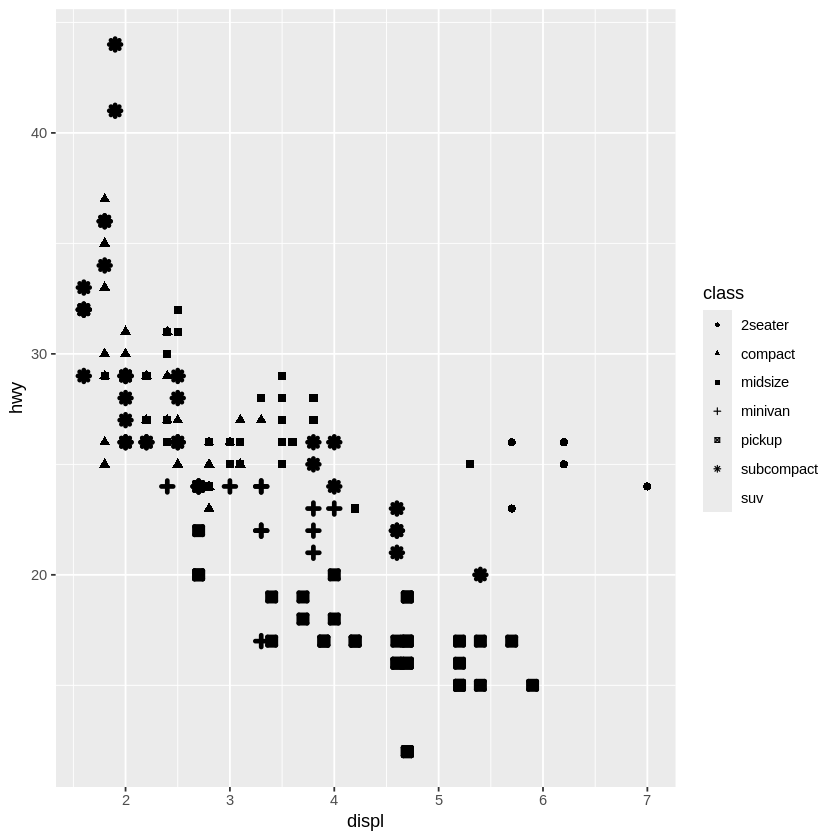

In [100]:
# 5. stroke aesthetic은 무엇을 하나요? 어떤 형태와 함께 작동하나요? (힌트: ?geom_point를 사용하세요.)

# 점의 테두리 두께를 조절하는 데 사용

# stroke = 2: 점의 외곽선 두께를 2로 설정
# size = 1: 점의 크기를 1로 설정
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, shape = class, stroke = 2), size = 1)

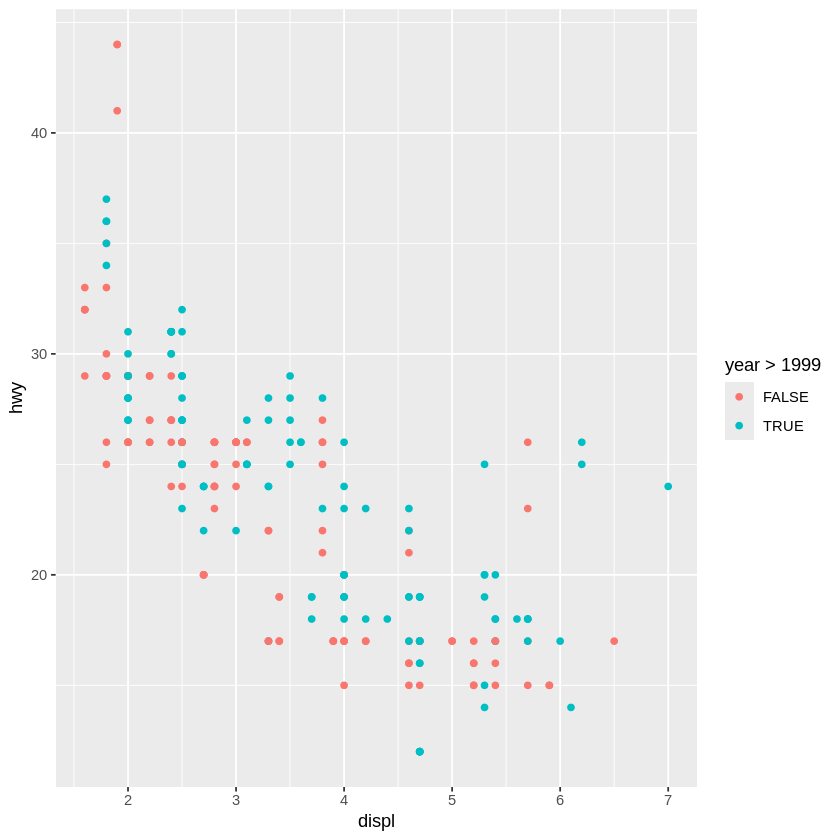

In [105]:
# 6. 변수 이름이 아닌 다른 값에 aesthetic을 매핑하면 어떻게 되나요?
# 예를 들어 aes(colour = displ < 5)와 같이 매핑할 때 어떻게 되나요? (x와 y도 지정해야 합니다.)

ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = year	> 1999)) + geom_point()

### Facets : 범주형 변수에 따라 데이터를 효과적으로 비교분석

데이터를 여러 개의 서브플롯(subplot)으로 나누어 시각화할 수 있는 기능이다.    
이를 통해 데이터의 다양한 특성을 비교 분석할 수 있다.    
주로 범주형 변수에 따라 데이터를 나누고 각 범주에 대해 개별적인 플롯을 생성하는 데 사용

동일한 x축과 y축을 가진 여러 개의 그래프를 생성해서 각 그래프가 다른 데이터를 보여주도록 합니다.    
facet_wrap() 또는 facet_grid() 함수를 사용하여 구현한다.

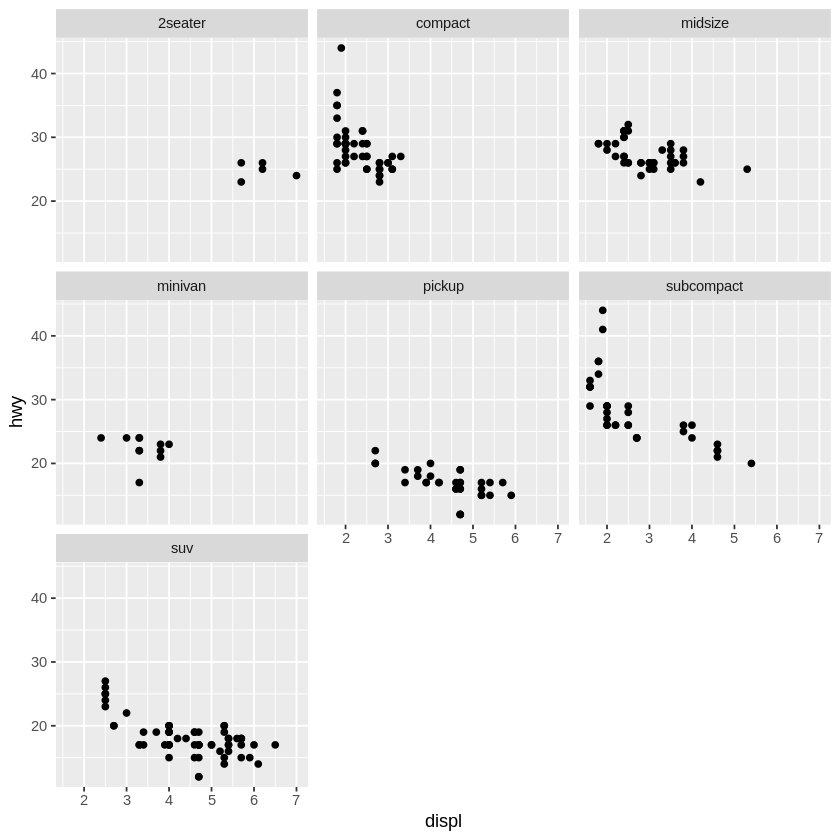

In [107]:
# 예 ) class가 2seater 이면서 displ이 5, hwy이 25

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 3) # 3행으로 배치

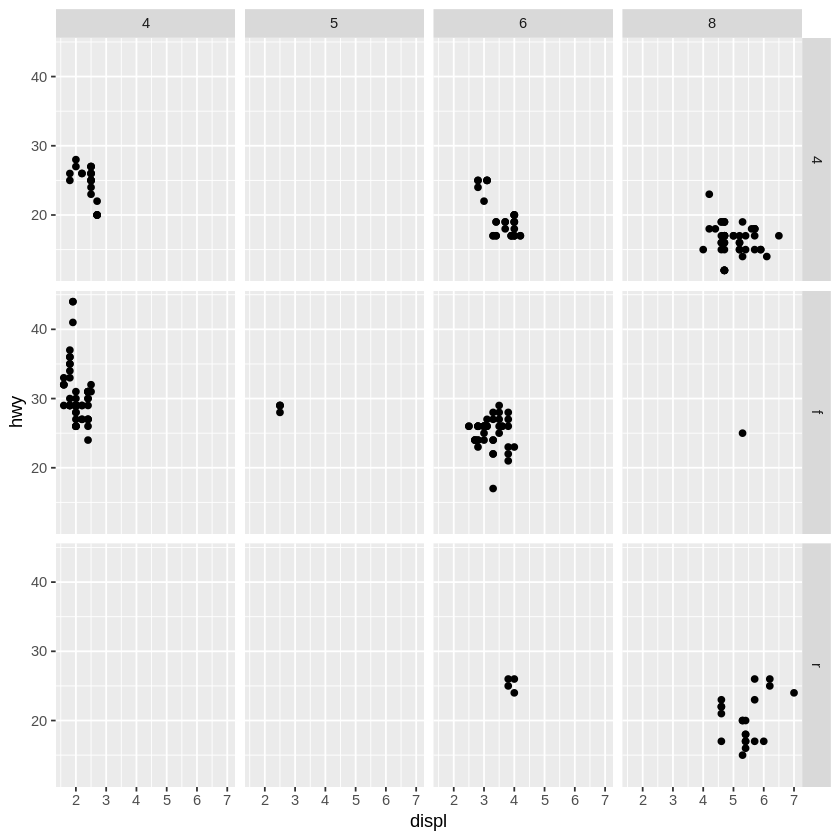

In [108]:
# 예 ) drv가 f면서 cyl이 6일 때, displ이 3, hwy이 30인 경우

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ cyl) #drv와 cyl 두 개의 범주형 변수를 사용하여 서브플롯을 생성 (drv : 행, cyl : 열)

3.5.1 연습문제
1. 연속형 변수를 사용하여 Facet을 만들면 어떻게 되나요?

2. facet_grid(drv ~ cyl)로 생성된 플롯에서 빈 셀은 무엇을 의미하나요? 이 빈 셀은 이 플롯과 어떤 관계가 있나요?
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = drv, y = cyl))
```
3.다음 코드는 어떤 플롯을 만들까요? 여기서 .는 무엇을 의미하나요?
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)
```
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)
```
4. 이 섹션에서 첫 번째로 다룬 facet 플롯을 가져와서    
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 2)
```
- faceting을 사용하면 color aesthetic을 사용하는 것에 비해 어떤 장점이 있는가? 어떤 단점이 있는가? 더 큰 데이터셋에서의 균형 변화가 어떻게 있는가?

5. ?facet_wrap을 읽어보세요. nrow는 무엇을 하나요? ncol는 무엇을 하나요? 개별 패널의 레이아웃을 제어하는 다른 옵션은 무엇인가요? 왜 facet_grid()에는 nrow와 ncol 인수가 없나요?

6. facet_grid()를 사용할 때 보통 더 많은 고유 수준을 가진 변수를 열에 배치해야 하는 이유는 무엇인가요?

In [ ]:
#1. 연속형 변수를 사용해서 Facet을 만들면 어떻게 되는가?

# a. 비효율적인 분할: 연속형 변수를 Facet으로 사용하면 값의 범위가 넓기 때문에 각 Facet에 데이터가 고르게 분포되지 않을 수 있습니다.
#    이로 인해 몇몇 Facet은 비어있거나 데이터 포인트가 적어 시각적 정보가 부족해질 수 있습니다.

# b. 의미 없는 패널: 연속형 변수가 여러 개의 패널로 나누어질 경우, 각 패널이 독립적으로 의미 있는 정보를 제공하지 않을 수 있습니다.
#    이로 인해 해석이 어렵고, 전체적인 데이터의 맥락을 잃을 수 있습니다.

# c. 주요 패턴 손실: 연속형 변수를 Facet으로 나누는 대신 이를 색상이나 크기와 같은 aesthetic으로 사용하는 것이 더 효과적일 수 있습니다.
#    이렇게 하면 데이터의 주요 패턴을 놓치지 않고 동시에 여러 수준의 정보를 시각화할 수 있습니다.

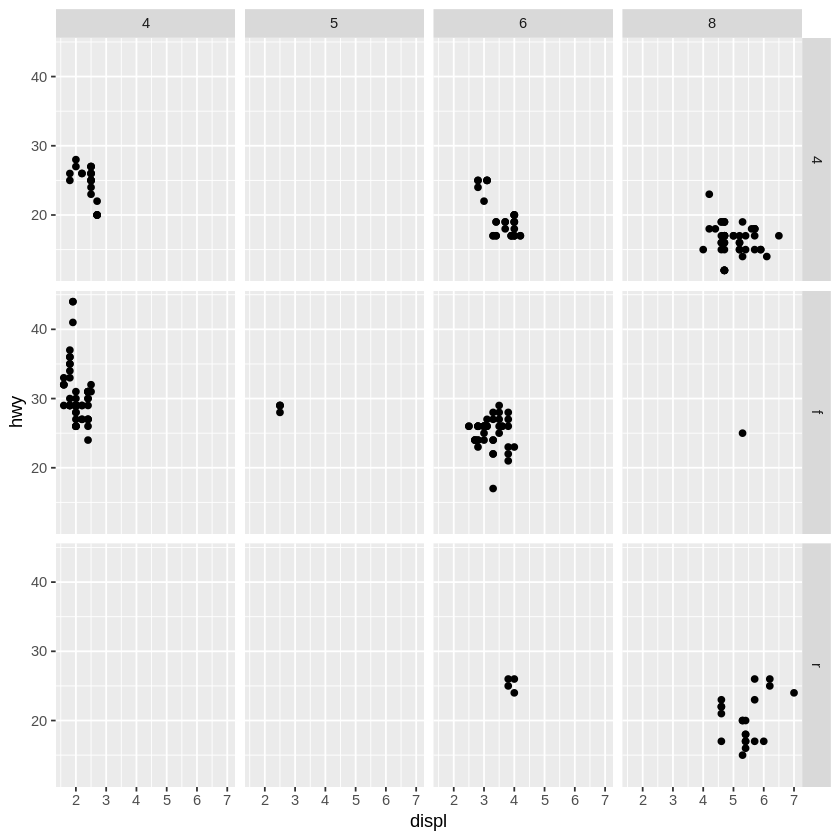

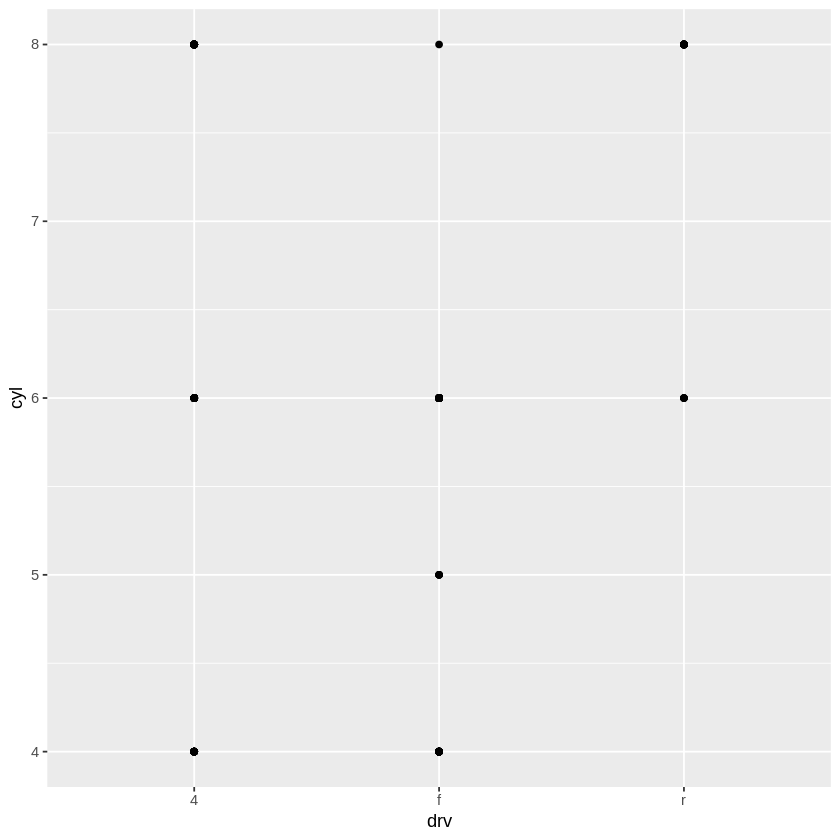

In [110]:
# 2. facet_grid(drv ~ cyl)로 생성된 플롯에서 빈 셀은 무엇을 의미하나요? 이 빈 셀은 이 플롯과 어떤 관계가 있나요?

# 이 플롯은 각 구동 방식에 따라 실린더 수에 대한 배치를 보여줍니다. 빈 셀은 해당 조합의 데이터가 없음을 나타냅니다.
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ cyl)

ggplot(data = mpg) +
  geom_point(mapping = aes(x = drv, y = cyl))

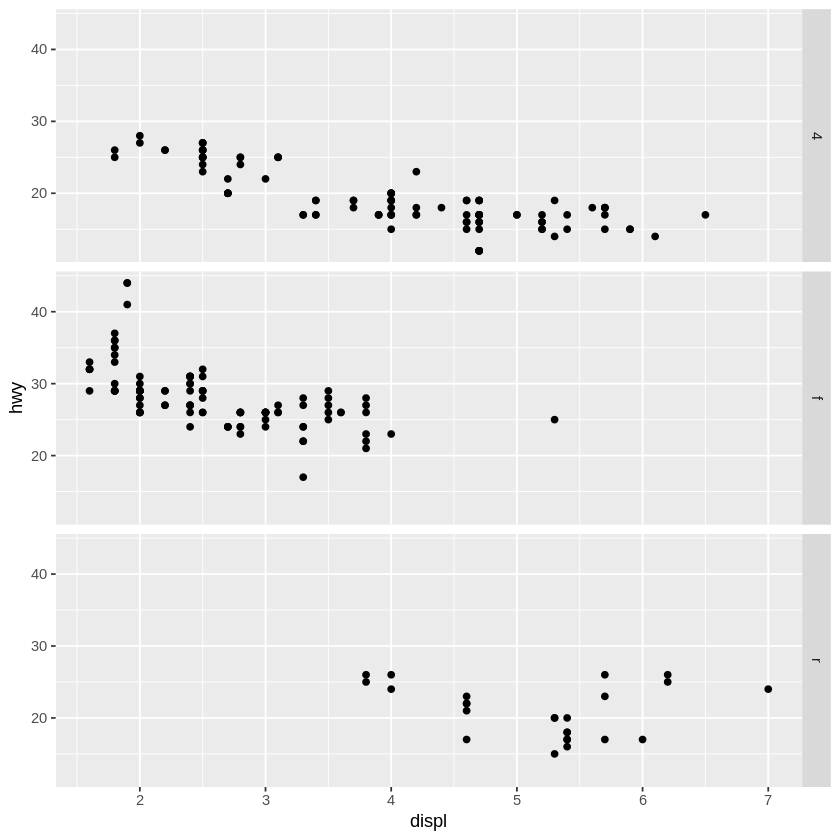

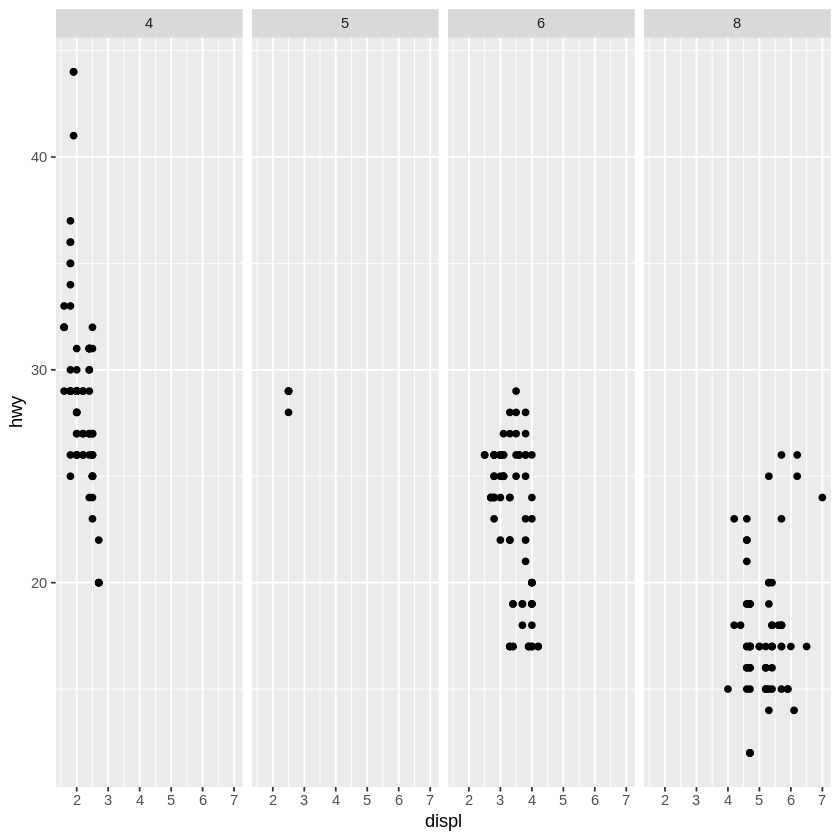

In [113]:
# 3. 다음 코드는 어떤 플롯을 만들까요? 여기서 .는 무엇을 의미하나요?

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .) # drv 변수에 따라 행을 나누고, 열은 사용하지 않음

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl) # cyl 변수에 따라 열을 나누고, 행은 사용하지 않음

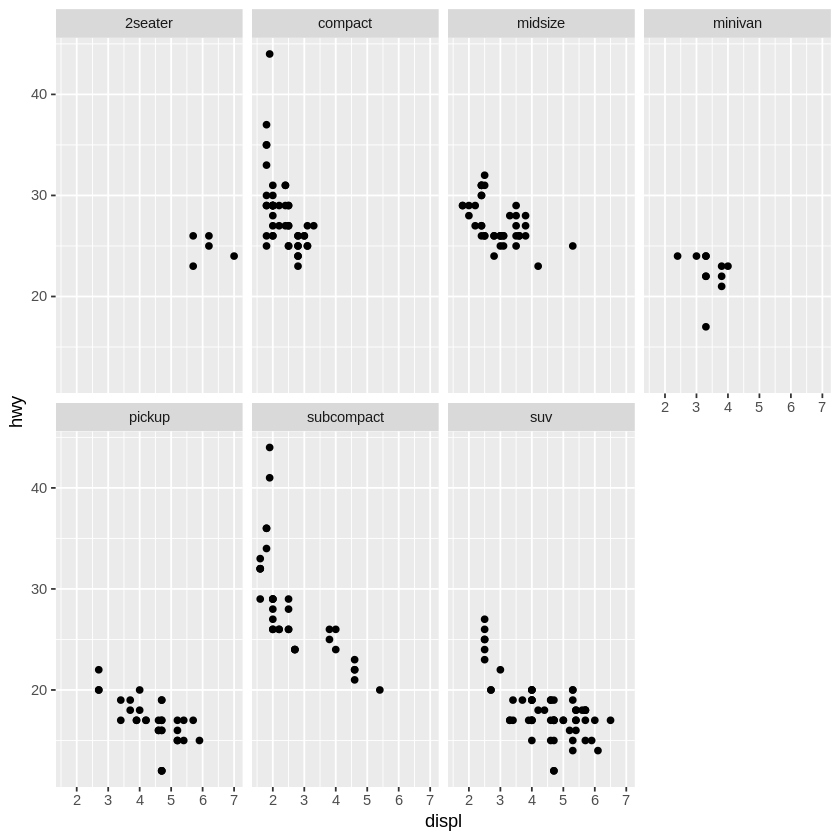

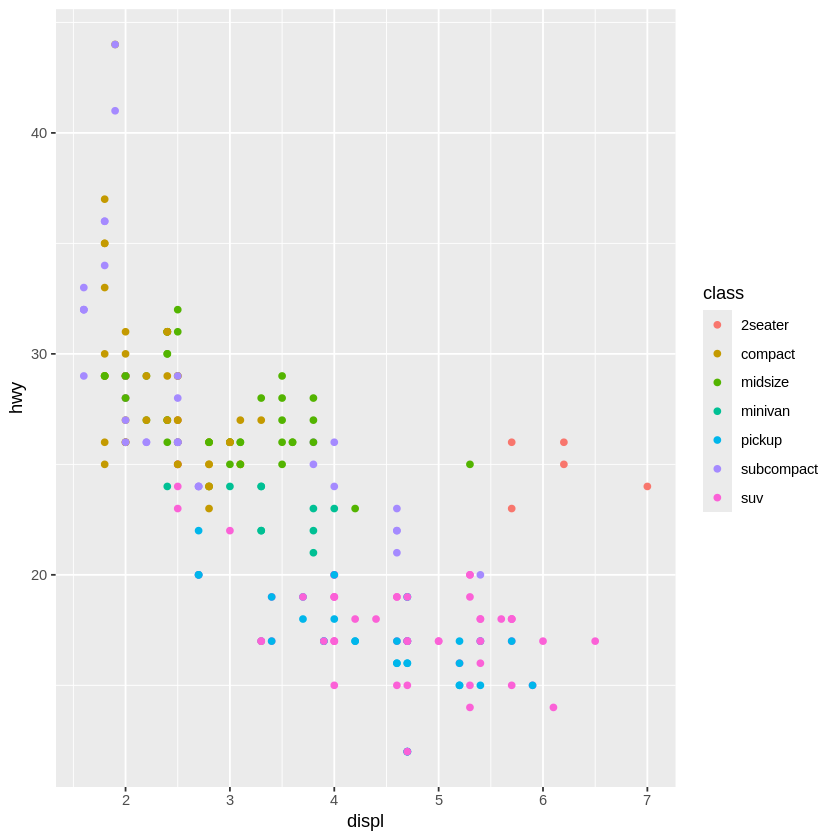

In [120]:
# 4. 이 섹션에서 첫 번째로 다룬 facet 플롯을 가져와서

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 2)

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

# faceting을 사용하면 color aesthetic을 사용하는 것에 비해 어떤 장점이 있는가? 어떤 단점이 있는가? 더 큰 데이터셋에서의 균형 변화가 어떻게 있는가?

# Faceting의 장점
    # 명확한 비교: Faceting은 각 범주에 대해 별도의 플롯을 생성하므로 색상을 사용할 때 발생할 수 있는 시각적 혼란 없이 분포와 추세를 쉽게 비교할 수 있습니다.
    # 중복 방지: 데이터 포인트가 많을 경우 색상을 사용하면 중복되어 혼란스러울 수 있지만, Faceting은 각 범주를 명확하게 구분하여 혼잡함을 줄입니다.
    # 해석 용이: 각 facet은 독립적인 플롯이기 때문에 각 범주에 대한 관계와 패턴을 해석하기가 더 쉽습니다.
# Faceting의 단점:
    # 공간 소모: Faceting은 많은 공간을 차지할 수 있으며, 범주가 많을 경우 데이터를 압축된 형식으로 제시하기 어려울 수 있습니다.
    # 전체 맥락 상실: Faceting을 통해 개별 범주를 자세히 살펴볼 수 있지만, 이러한 범주가 전체 데이터셋 내에서 어떻게 관련되는지에 대한 맥락을 잃을 수 있습니다.
    # 제한된 비교: 여러 범주 간의 추세를 동시에 비교하기 어려울 수 있으며, 관찰자가 플롯을 왔다 갔다 보아야 할 수도 있습니다.

# 더 큰 데이터셋에서의 균형 변화
    # 명확성 증가: 더 큰 데이터셋에서는 faceting이 각 facet이 더 많은 데이터를 나타내므로 명확한 통찰을 제공하며, 추세가 더 뚜렷해질 수 있습니다.
    # 혼잡: 그러나 데이터셋이 너무 크고 범주 수가 많으면 faceting이 혼잡해져 플롯을 해석하기 어려워질 수 있습니다.
    # 색상 사용: 더 큰 데이터셋에서는 특정 추세나 포인트를 강조하기 위해 색상을 사용하는 것이 더 효과적일 수 있으며, 많은 facets 없이도 정보를 압축할 수 있습니다.

In [121]:
# 5. ?facet_wrap을 읽어보세요. nrow는 무엇을 하나요? ncol는 무엇을 하나요?
# 개별 패널의 레이아웃을 제어하는 다른 옵션은 무엇인가요? 왜 facet_grid()에는 nrow와 ncol 인수가 없나요?

# facet_wrap에서 nrow와 ncol의 역할
    # nrow: 패널의 행 수를 지정합니다. 지정된 수만큼의 행으로 패널이 배열되며, 남는 패널은 다음 행으로 넘어갑니다.
    # ncol: 패널의 열 수를 지정합니다. 지정된 수만큼의 열로 패널이 배열되며, 남는 패널은 다음 열로 넘어갑니다.

# 개별 패널의 레이아웃을 제어하는 다른 옵션
    # scales: 패널의 축 범위를 조정합니다. "free"로 설정하면 각 패널의 축 범위를 개별적으로 설정할 수 있습니다.
    # space: 패널 간의 공간 비율을 설정합니다. "fixed"(기본값) 또는 "free"로 설정할 수 있습니다.

# 왜 facet_grid()에는 nrow와 ncol 인수가 없나요?
    # facet_grid()는 행과 열의 구조를 명확하게 정의하는 방식으로 작동합니다.
    # 각 변수의 고유 수준에 따라 패널이 자동으로 배열되므로, 별도로 행(row)과 열(column)의 수를 지정할 필요가 없습니다.
    # 각 변수의 수준에 따라 패널이 정렬되기 때문에, nrow와 ncol를 지정할 수 없는 것입니다.

# 이로 인해 facet_grid()는 보다 명확한 데이터 관계를 표현하는 데 유리합니다.

In [ ]:
# 6. facet_grid()를 사용할 때 보통 더 많은 고유 수준을 가진 변수를 열에 배치해야 하는 이유는 무엇인가요?

# 공간 활용: 각 열이 더 많은 정보를 담을 수 있습니다. 시각적으로 더 많은 범주를 한 눈에 보기 쉽게 배열할 수 있습니다.

# 해석의 용이성: 각 열이 서로 다른 그룹을 나타내므로 비교가 용이해집니다. 데이터의 패턴을 더 쉽게 인식하고 분석할 수 있습니다.

# 패널 크기: 각 패널의 세로 높이가 상대적으로 줄어들어 더 많은 데이터를 시각적으로 표현할 수 있습니다. 이는 시각적 혼잡을 줄이고, 데이터 포인트 간의 관계를 더 명확하게 합니다.

# 데이터 간의 관계 명확화: 보통 고유 수준이 많은 변수는 더 다양한 카테고리를 포함하므로, 이를 열로 설정함으로써 데이터의 복잡성을 보다 잘 드러낼 수 있습니다.

# 결론적으로, 고유 수준이 많은 변수를 열에 배치하면 시각적 표현의 효율성과 해석의 용이성을 높일 수 있습니다.

### Geometric objects

연속형 변수 간의 관계를 보여주고 싶다면 geom_point나 geom_line을 사용    
범주형 데이터의 분포를 알고 싶다면 geom_bar나 geom_boxplot을 사용

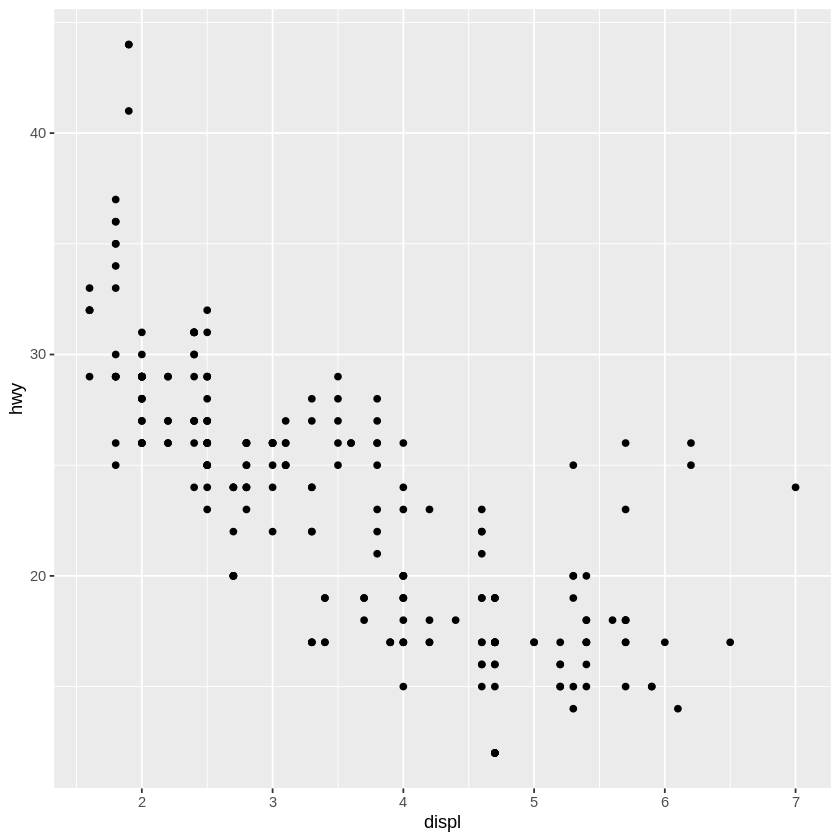

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


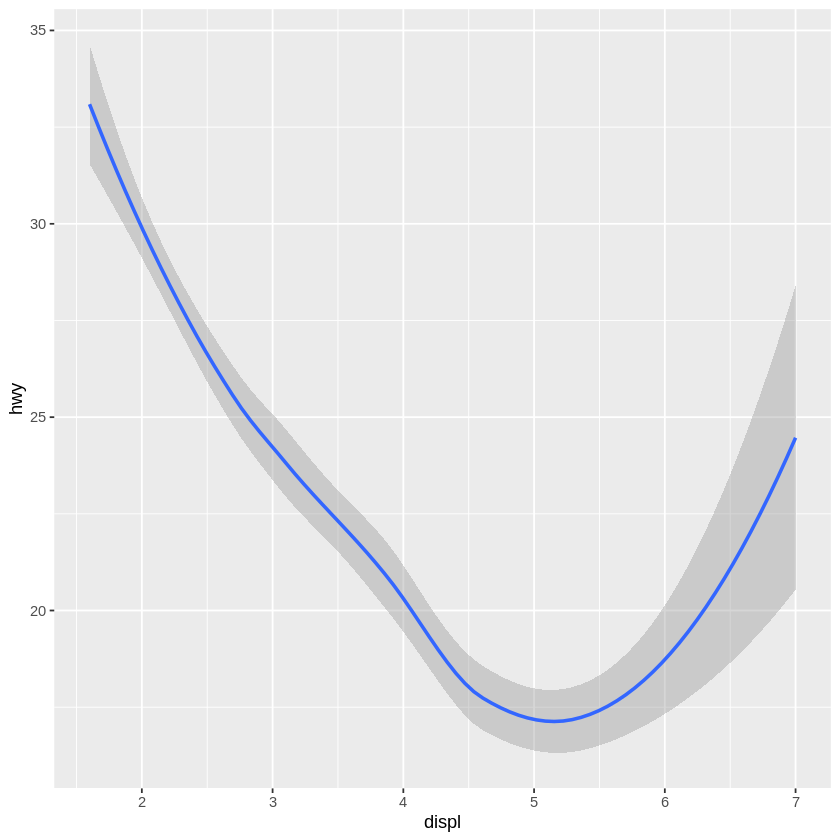

In [ ]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

To display multiple geoms in the same plot, add multiple geom functions to ggplot():

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


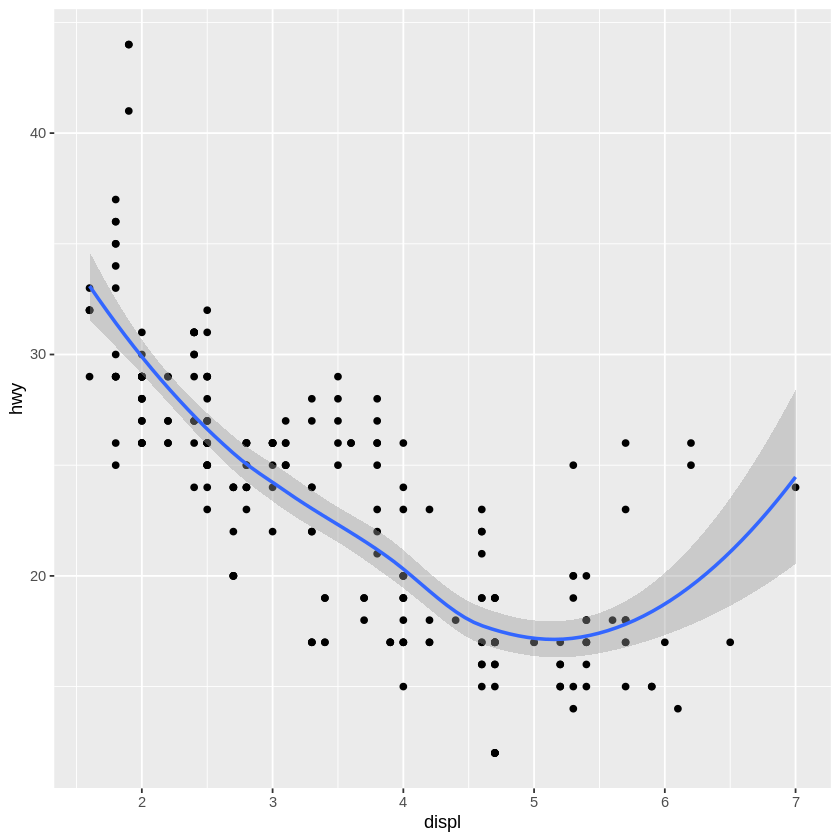

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


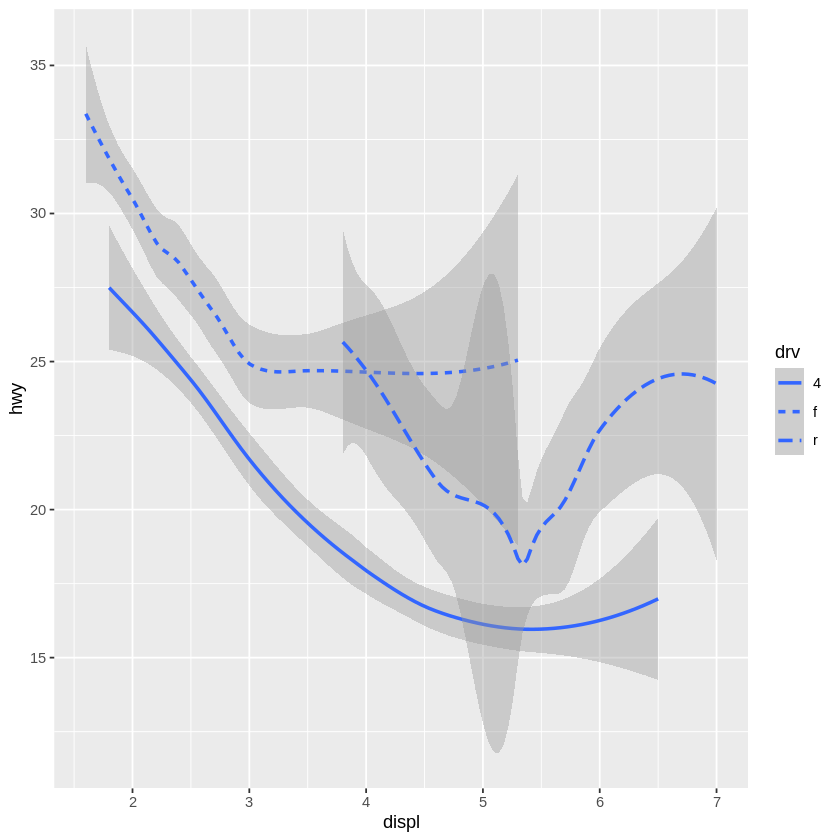

In [ ]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


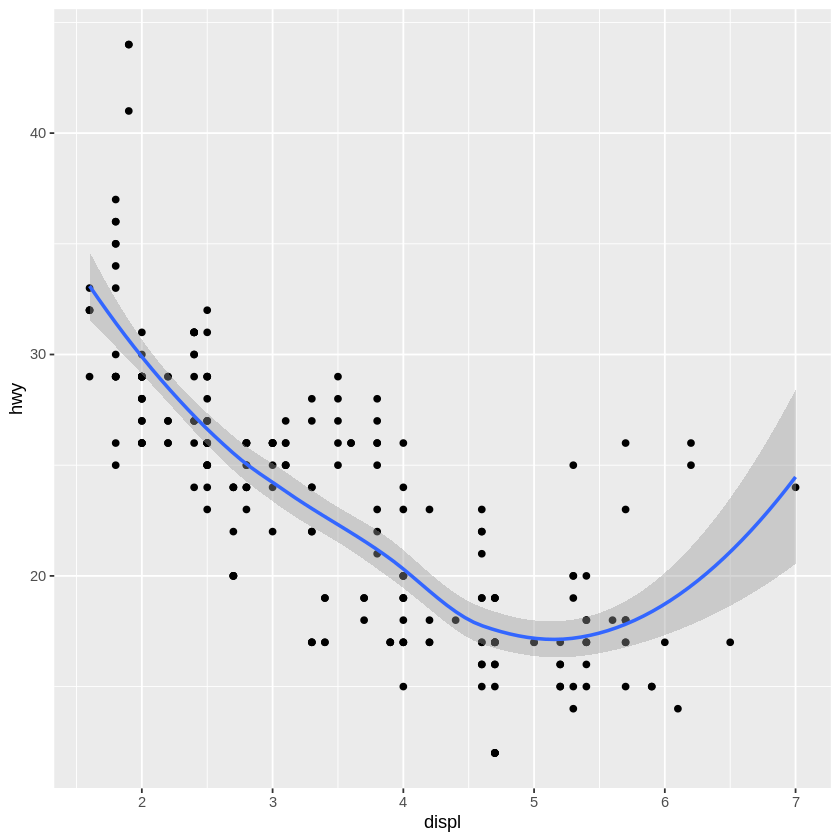

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


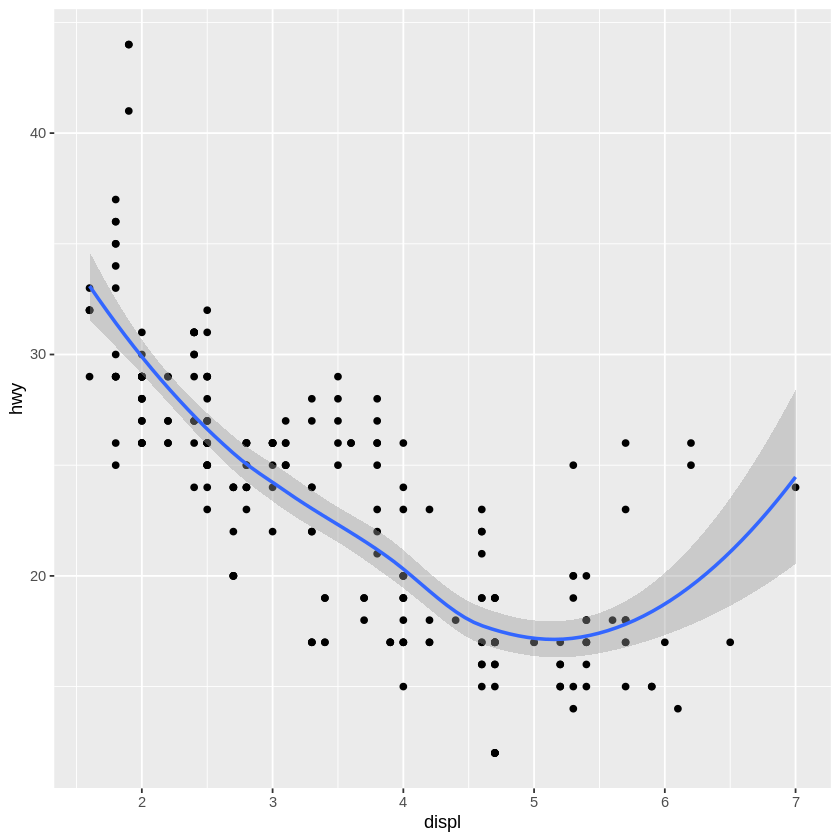

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


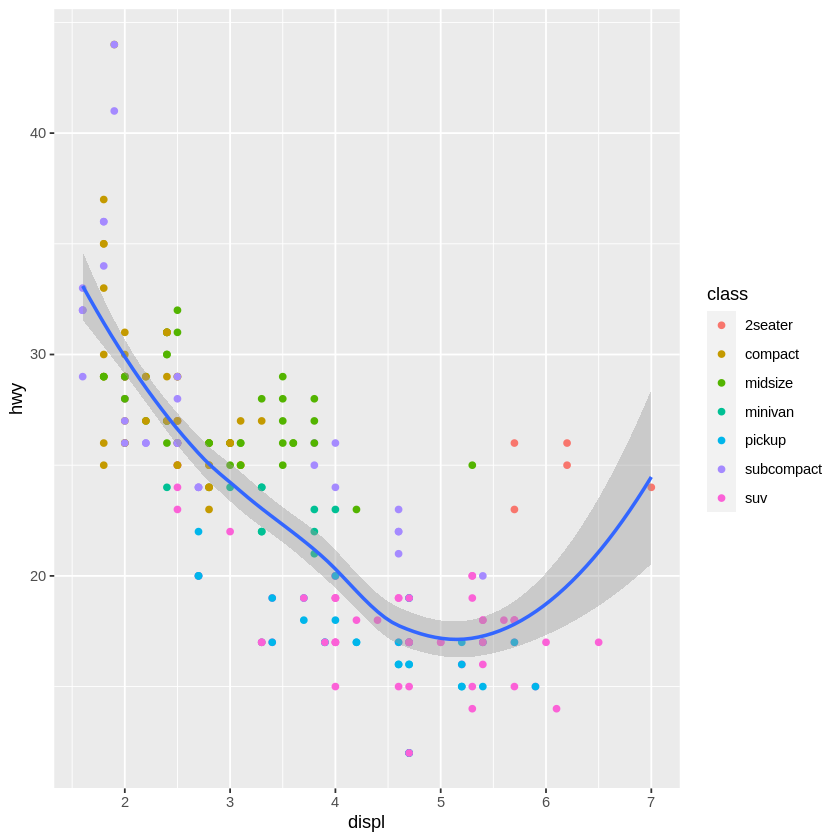

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


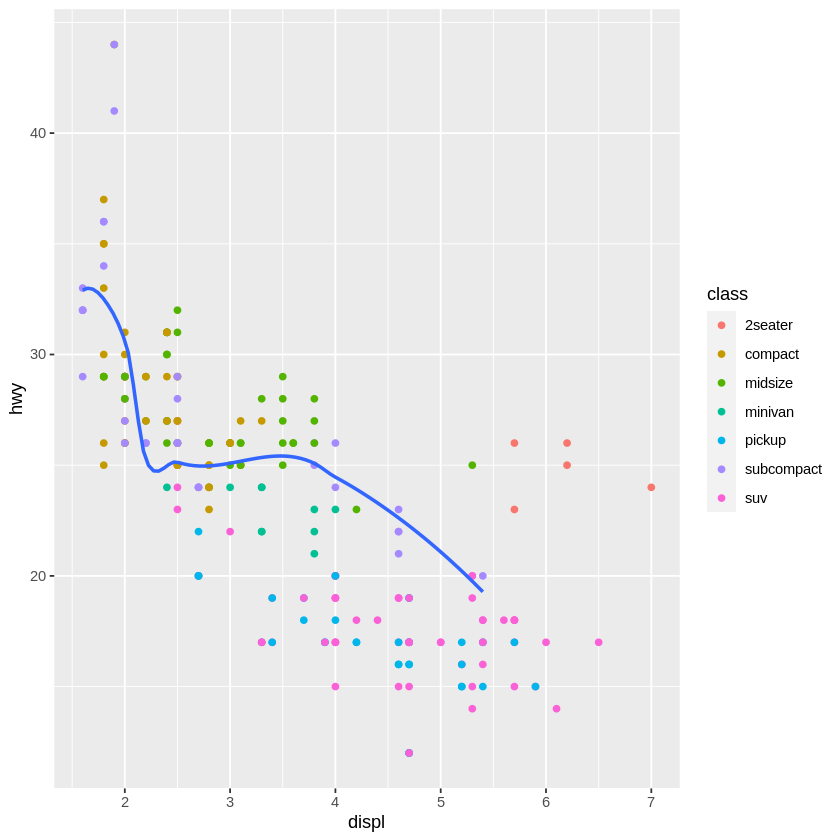

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

3.6.1 연습문제
1. line chart를 그릴 때 사용할 geom은 무엇인가요? 박스플롯은? 히스토그램은? 영역 차트는?

      선 차트 (Line Chart): geom_line()    
      박스플롯 (Boxplot): geom_boxplot()    
      히스토그램 (Histogram): geom_histogram()    
      영역 차트 (Area Chart): geom_area()
    

2. 이 코드를 머릿속에서 실행해보고 결과가 어떻게 나올지 예측해 보세요. 그런 다음 R에서 코드를 실행하여 예측을 확인해 보세요.
```
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point() +
  geom_smooth(se = FALSE)
```
3. show.legend = FALSE는 무엇을 하나요? 이를 제거하면 어떻게 되나요? 왜 이 장에서 사용했을까요?
```
    show.legend = FALSE는 해당 geometric object의 범례(legend)를 표시하지 않도록 설정합니다.     
    이 옵션을 제거하면 기본적으로 범례가 생성되어 해당 그래프에 대한 설명이 추가됩니다.     
    이 장에서 사용된 이유는 시각적으로 더 깔끔한 그래프를 만들기 위해서 입니다.
    필요하지 않은 범례를 제거함으로써 데이터를 더 명확하게 전달할 수 있습니다.
```

4. geom_smooth()의 se 인자는 무엇을 하나요? = 신뢰구간 영역
5. 이 두 그래프는 다르게 보일까요? 왜 그럴까요?
```
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()
```
```
ggplot() +
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))
```
6. 다음 그래프를 생성하기 위해 필요한 R 코드를 재작성하세요.
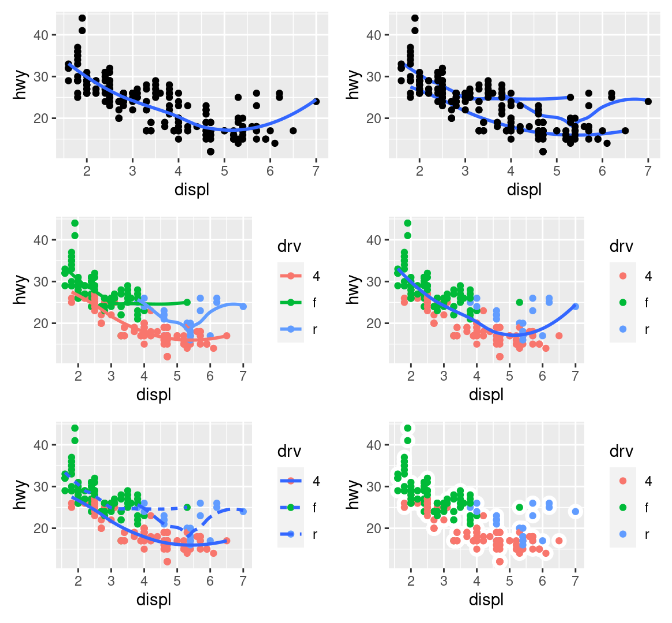

In [201]:
# 플롯을 여러개 그리려면 설치해야하는 패키지

install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


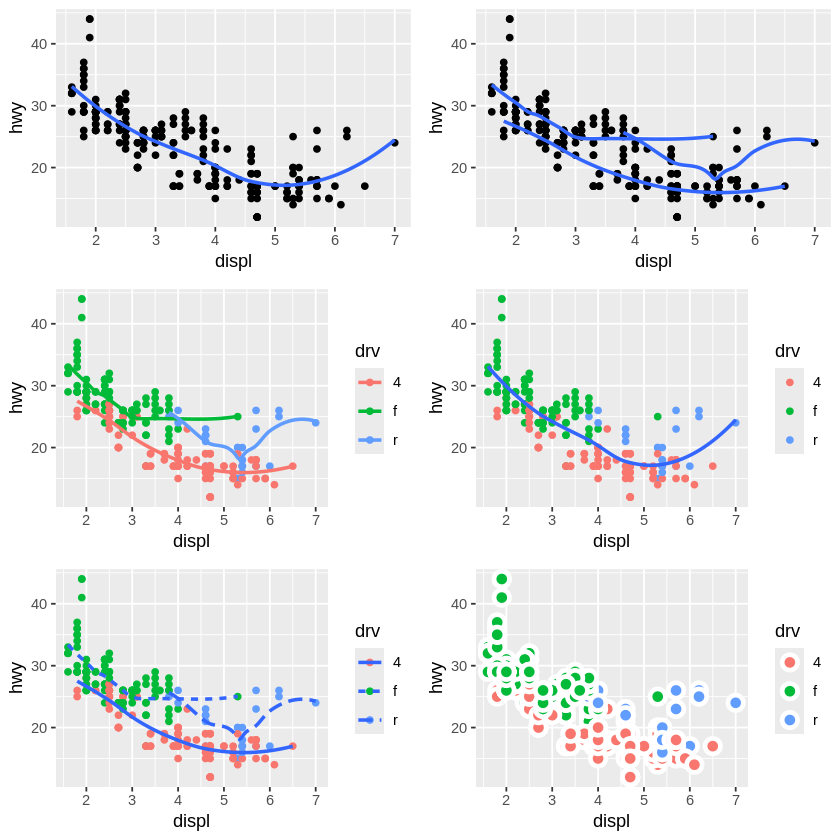

In [322]:
# 6부터 해결하겠다... 그래프 봐야해서...
# 다음 그래프를 생성하기 위해 필요한 R 코드를 재작성

#ggplot() 에 작성하면 그 그래프의 모두 영향
#ggpoint()랑 ggsmooth()에 따로 적어야 모두 적용이 되지 않으니 주의!!

g1 <- ggplot(data = mpg, mapping = aes(x=displ, y=hwy)) + geom_point() + geom_smooth(se=FALSE)
g2 <- ggplot(data = mpg, mapping = aes(x=displ, y=hwy, line=drv)) + geom_point() + geom_smooth(se=FALSE) # line=drv 설정
g3 <- ggplot(data = mpg, mapping = aes(x=displ, y=hwy, color=drv)) + geom_point() + geom_smooth(se=FALSE)
g4 <- ggplot(data = mpg, mapping = aes(x=displ, y=hwy)) + geom_point(mapping = aes(color=drv)) + geom_smooth(se=FALSE)
g5 <- ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color=drv)) + geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv), se=FALSE)
g6 <- ggplot(data = mpg, mapping = aes(x = displ, y = hwy, fill = drv)) + geom_point(colour="white", shape=21, size=3, stroke = 2)

grid.arrange(g1,g2,g3,g4,g5,g6, ncol=2)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


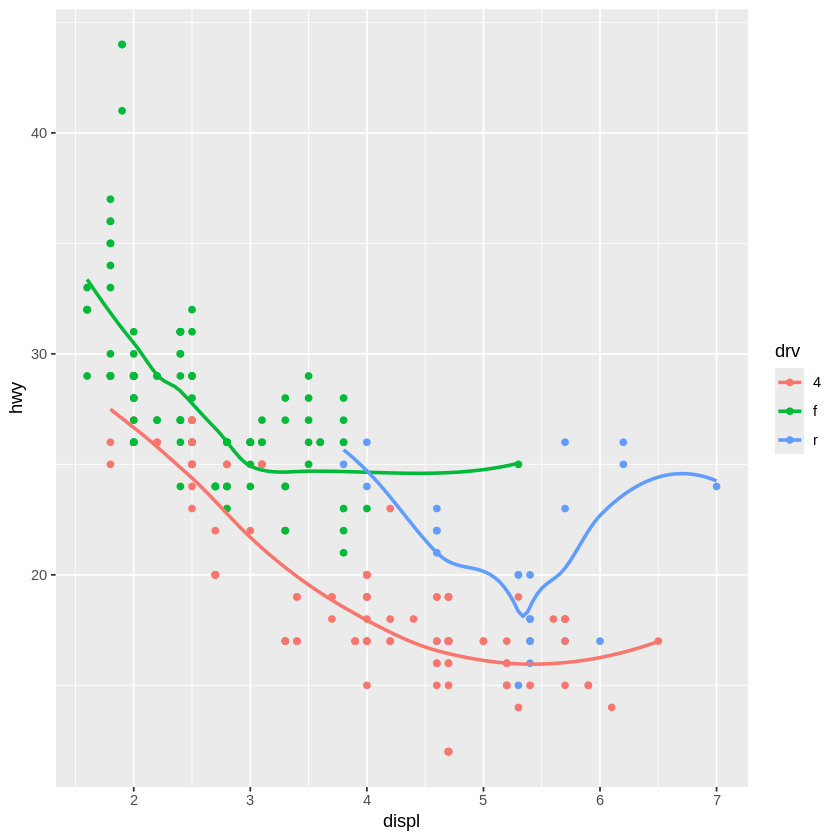

In [127]:
# 2. 이 코드를 머릿속에서 실행해보고 결과가 어떻게 나올지 예측해 보세요. 그런 다음 R에서 코드를 실행하여 예측을 확인해 보세요.

ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point() +
  geom_smooth(se = FALSE) # se = FALSE: 이 옵션을 설정하면 스무딩 선만 나타나고 신뢰 구간의 음영은 그려지지 않습니다.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


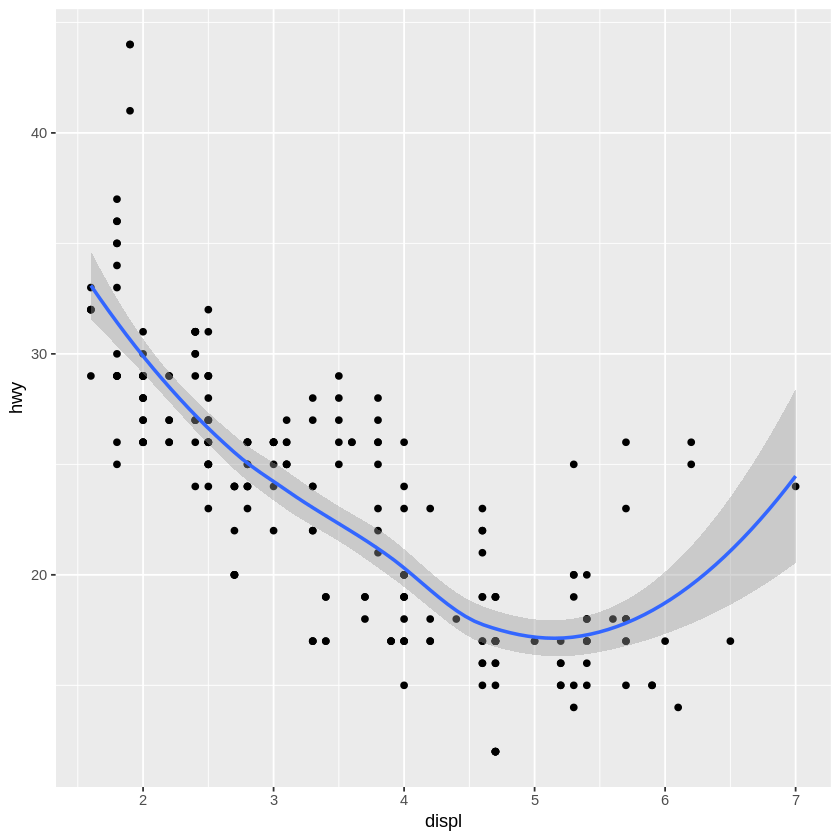

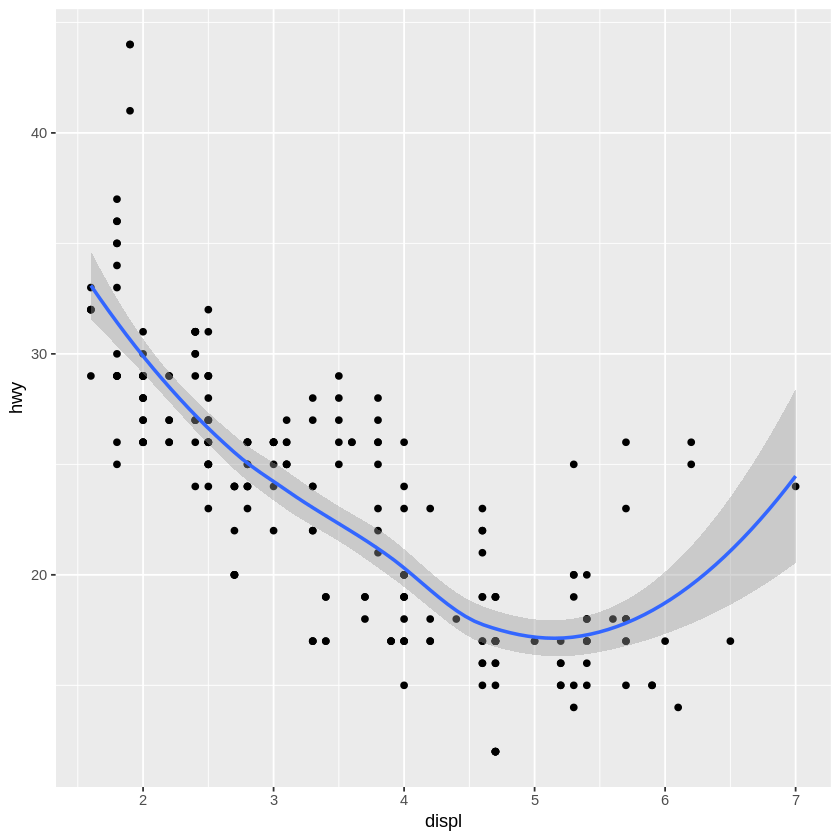

In [128]:
# 5. 이 두 그래프는 다르게 보일까요? ==> 아니다. 두 그래프는 결과가 같다.

ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()


ggplot() +
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))

### Statistical transformations

ggplot2에서 데이터를 시각화하기 전에 통계적으로 변형하는 과정을 의미

In [324]:
table(diamonds$cut)


     Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551 

In [326]:
diamonds %>% head()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


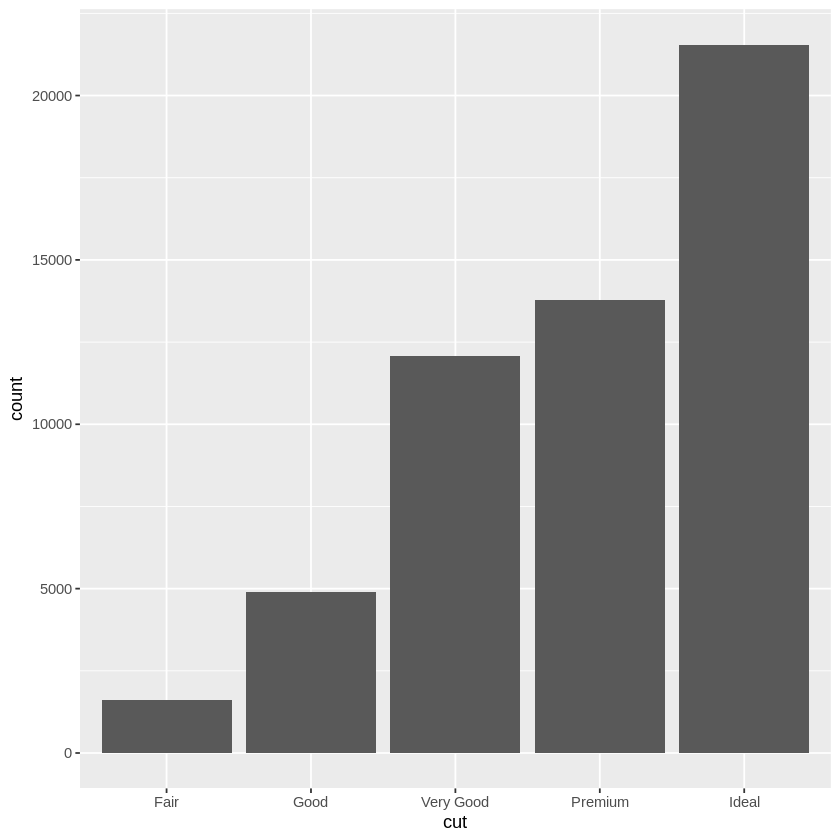

In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

In [327]:
demo <- tribble(
  ~cut,         ~freq, # 데이터 프레임의 열 이름 정의
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
demo

cut,freq
<chr>,<dbl>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


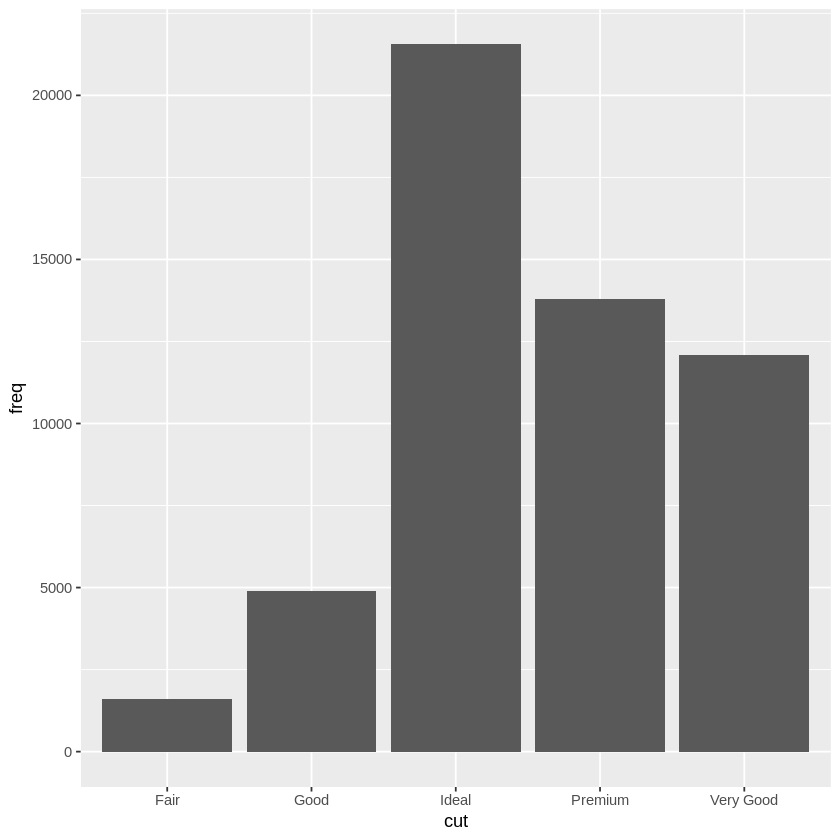

In [328]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity") # y축의 값을 데이터에서 직접 제공된 값으로 사용하겠다는 의미

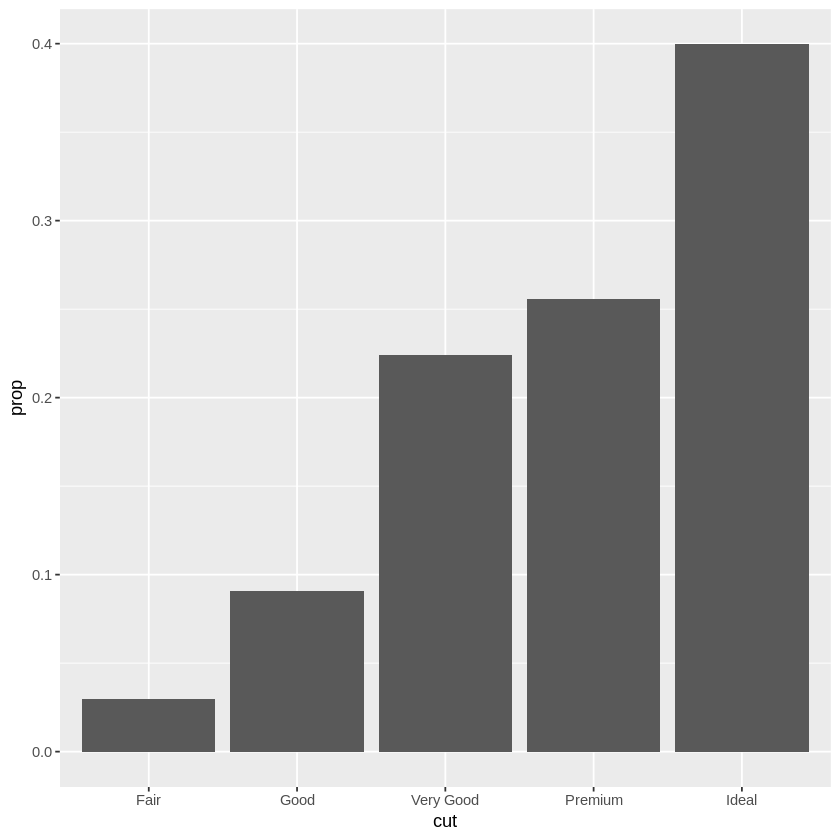

In [331]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = stat(prop), group = 1)) #stat(prop)는 x축인 cut의 비율을 나타내는 통계적 변환
# group=1은 비율 계산할 때 필요함

3.7.1 연습문제

1. stat_summary()의 기본 geom은 무엇인가요? 이전 플롯을 stat 함수 대신 해당 geom 함수를 사용하여 어떻게 다시 쓸 수 있나요?
```
 stat_summary()의 기본 geom은 geom_point()이다.
 요약 통계의 종류는 fun 인자를 통해 지정할 수 있으며, 기본적으로 평균을 계산
  ggplot(data = mpg, aes(x = class, y = hwy)) +
  stat_summary(geom = "point", fun = mean)
```

2. geom_col()은 무엇을 하나요? geom_bar()와는 어떻게 다른가요?   
```
  geom_col()은 y 값이 이미 계산되어 있는 경우에 사용하고,    
  geom_bar()는 자동으로 빈도를 계산
  geom_col()은 특정한 y 값이 있을 때 적합하고,    
  geom_bar()는 범주형 데이터의 빈도를 시각화할 때 주로 사용됩니다.
```

3. 대부분의 geom과 stat은 거의 항상 함께 사용되는 쌍이 있습니다. 문서를 읽고 모든 쌍의 목록을 작성하세요. 그들은 무엇이 공통점이 있나요?
```
geom_point() - stat_bin()
      geom_point()는 산점도를 그리기 위해 사용되고    
      stat_bin()은 데이터의 빈도를 계산합니다.    
      산점도에서 데이터 포인트를 개별적으로 시각화할 때 주로 사용됩니다.
geom_bar() - stat_count()
      geom_bar()는 범주형 데이터의 빈도를 나타내는 막대 그래프를 그리며,    
      기본적으로 stat_count()를 사용하여 각 범주의 개수를 계산합니다.
geom_col() - stat_identity()
      geom_col()은 y 값이 이미 계산되어 있는 경우 사용되고,    
      stat_identity()는 데이터의 y 값을 그대로 사용합니다.
geom_line() - stat_smooth()
      geom_line()은 데이터의 변화를 선으로 시각화하며,    
      stat_smooth()는 데이터를 부드럽게 연결하여 추세선을 표시합니다.
geom_boxplot() - stat_boxplot()    
      geom_boxplot()은 상자 그림을 그리며,    
      stat_boxplot()은 데이터의 사분위수와 중앙값을 계산하여 그립니다.
```

4. stat_smooth()는 어떤 변수를 계산하나요? 그 동작을 제어하는 매개변수는 무엇인가요?
```
stat_smooth()는 데이터의 추세선을 계산하는 함수    
예측값과 신뢰구간 계산
매개변수 :
      method = 사용하고자 하는 회귀 모델을 지정
      예를 들어, lm(선형 회귀), glm(일반화 선형 모델), loess(국소 회귀)
      se = 신뢰 구간을 표시할지 여부를 결정    
      TRUE(기본값)로 설정하면 신뢰 구간을 포함, FALSE로 설정하면 미포함
      formula = 모델의 수식을 지정, 기본적으로 y ~ x 형식이지만,    
      다른 복잡한 수식도 사용할 수 있습니다.
      level = 신뢰 구간의 신뢰 수준을 설정.    
      기본값은 0.95로, 95% 신뢰 구간을 의미
```
```
      예시 ) ggplot(data = mpg, aes(x = displ, y = hwy)) +
             stat_smooth(method = "lm", se = TRUE, level = 0.95)
```
5. 우리의 비율 막대 차트에서 group = 1을 설정해야 하는 이유는 무엇인가요? 다시 말해, 이 두 그래프의 문제는 무엇인가요?
```
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = after_stat(prop)))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = color, y = after_stat(prop)))
```


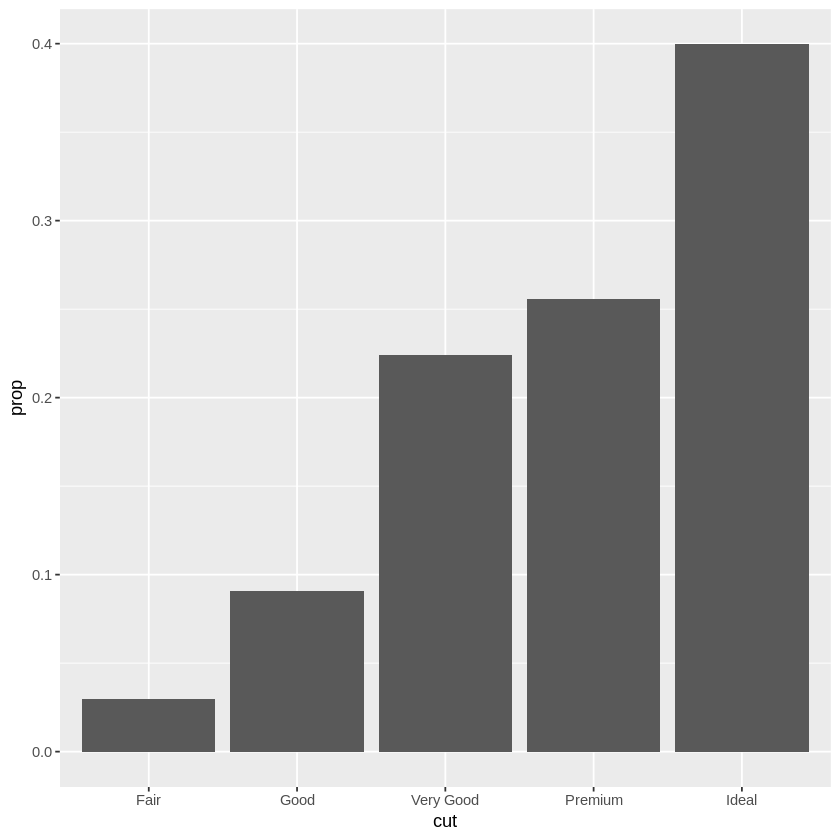

In [339]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = after_stat(prop), group = 1))

### Position adjustments     
ggplot2에서 데이터 시각화 시 요소들의 위치를 조정하는 방법

You can colour a bar chart using either the colour aesthetic, or, more usefully, fill:

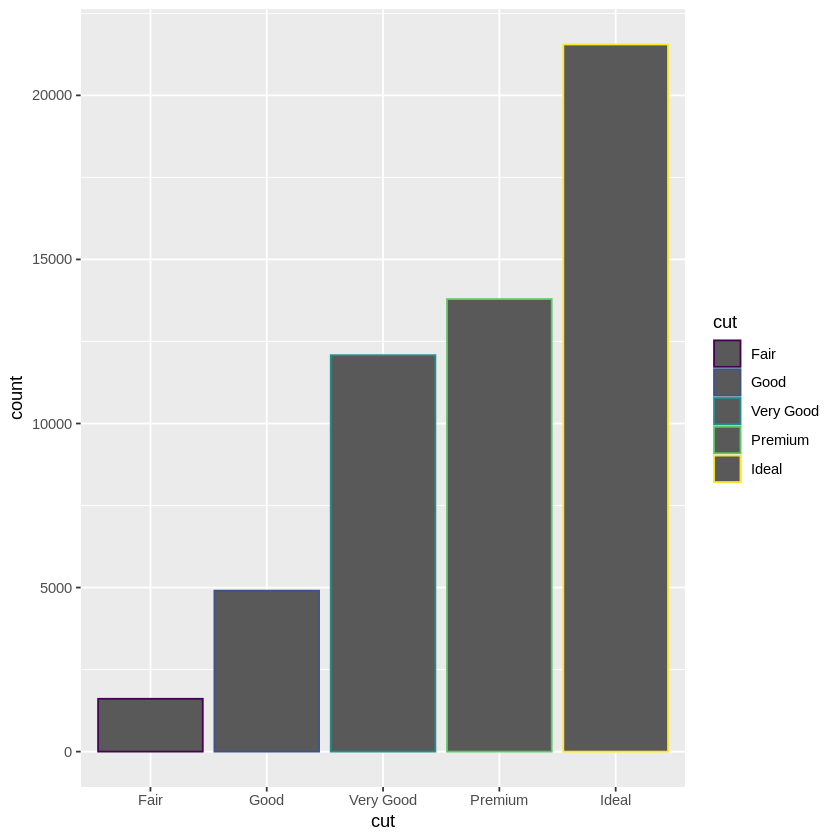

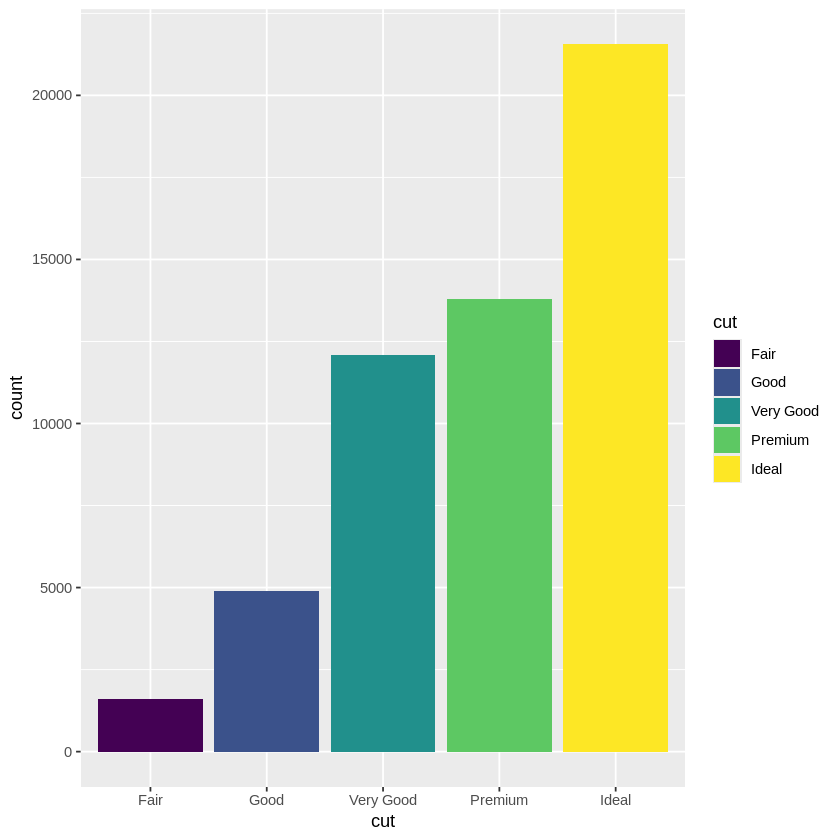

In [341]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = cut))

만약 fill aesthetic을 다른 변수       
예를 들어 clarity에 매핑하면, 막대가 자동으로 쌓이게 됩니다.

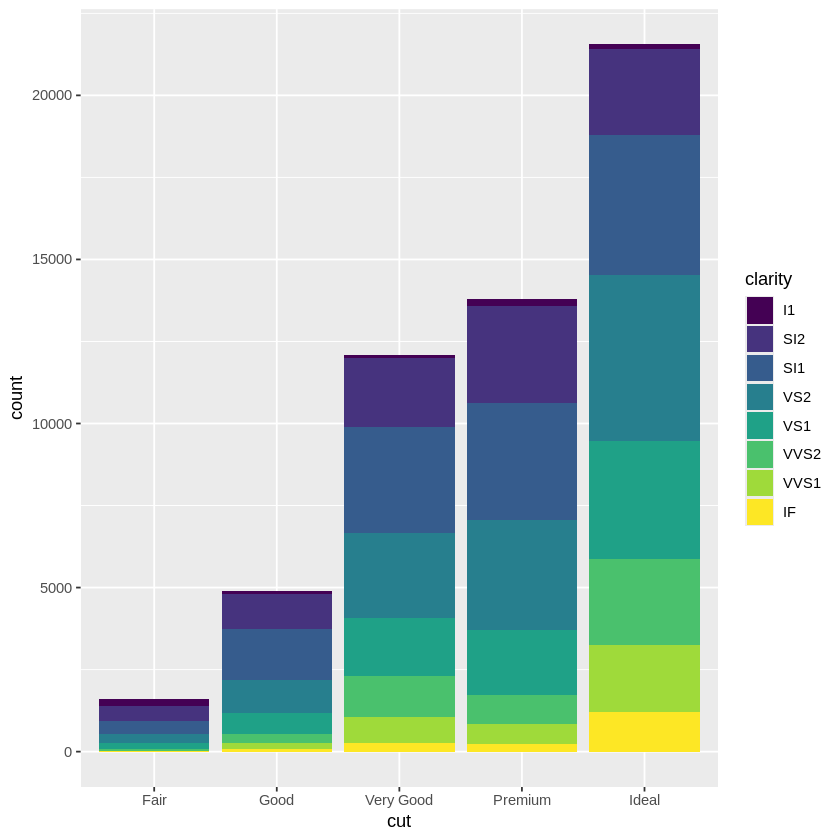

In [342]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity)) # fill에 범주형 선택

쌓기가 자동으로 position 인수에 지정된 위치 조정에 의해 수행됩니다.     
만약 쌓인 막대 차트를 원하지 않는다면 "identity", "dodge", "fill"중     
하나의 다른 옵션을 사용할 수 있습니다.

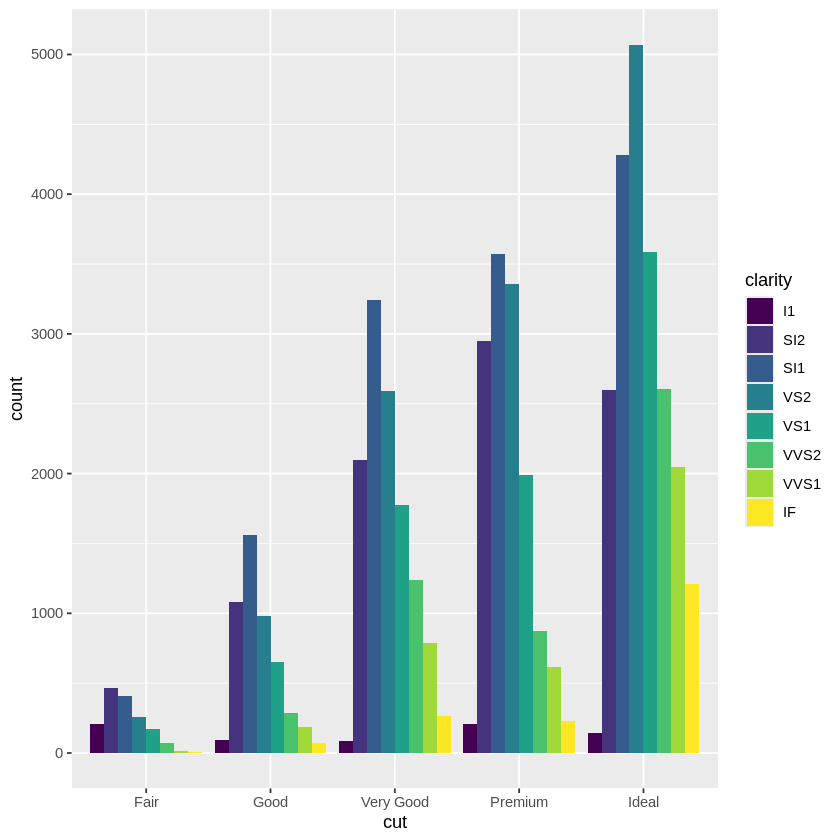

In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

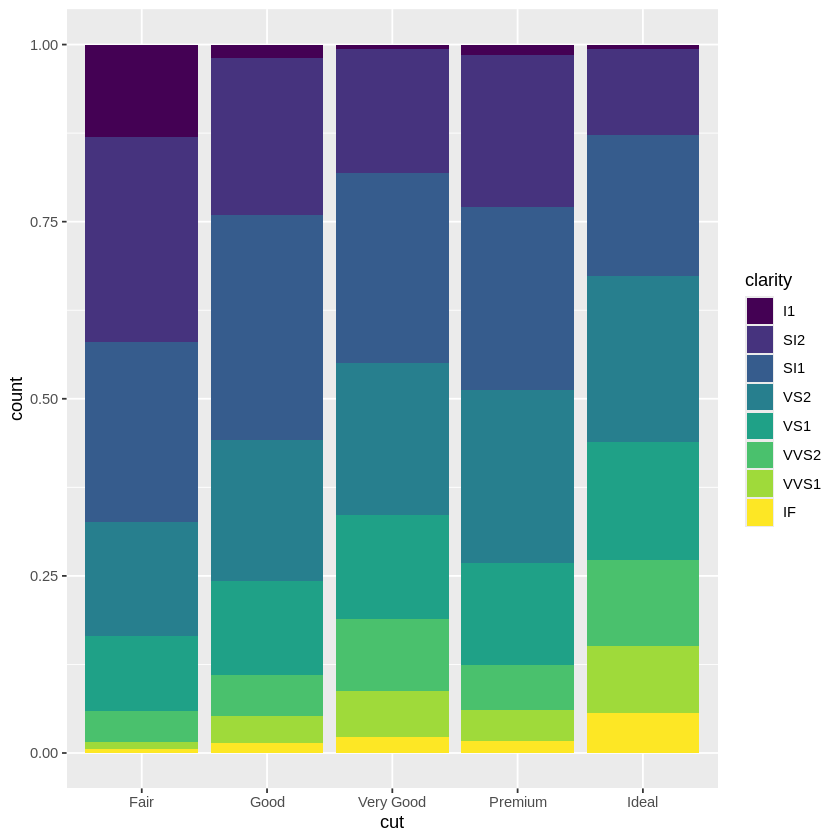

In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

#### 출발 지연 시간(dep_delay)의 분포를 시각화하는 방법에 대해 생각해보자.

In [343]:
flights %>% group_by(origin) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE))

origin,delay,sd_delay
<chr>,<dbl>,<dbl>
EWR,15.10795,41.32370
JFK,12.11216,39.03507
LGA,10.34688,39.99302


Warning message:
“Removed 8255 rows containing non-finite values (`stat_boxplot()`).”


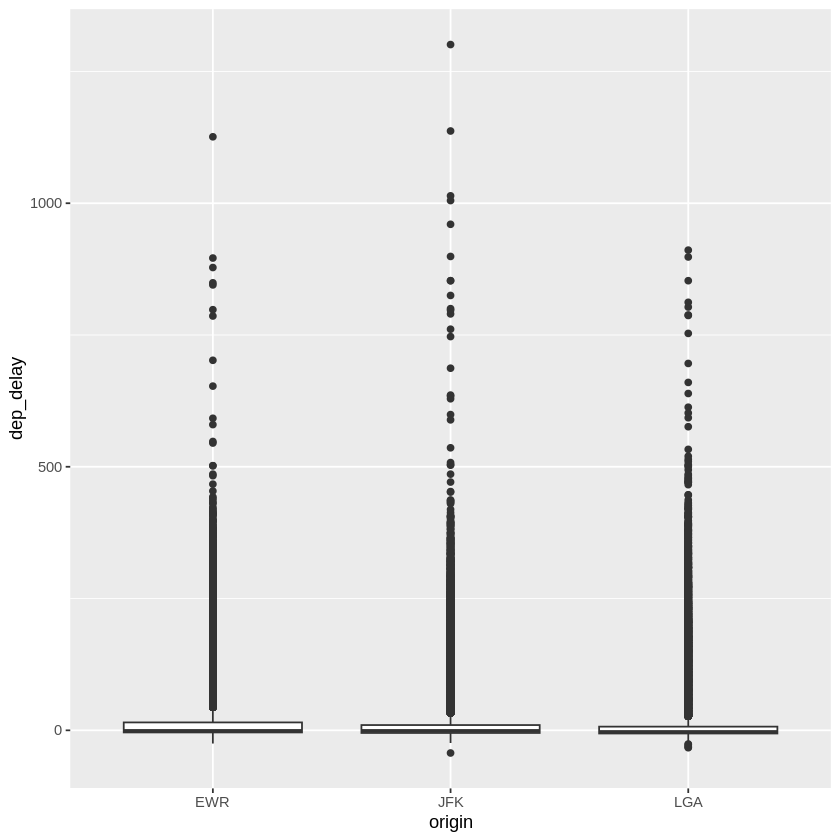

In [ ]:

flights %>% ggplot(aes(x = origin, y=dep_delay )) + geom_boxplot()

Warning message:
“Removed 8255 rows containing non-finite values (stat_ydensity).”


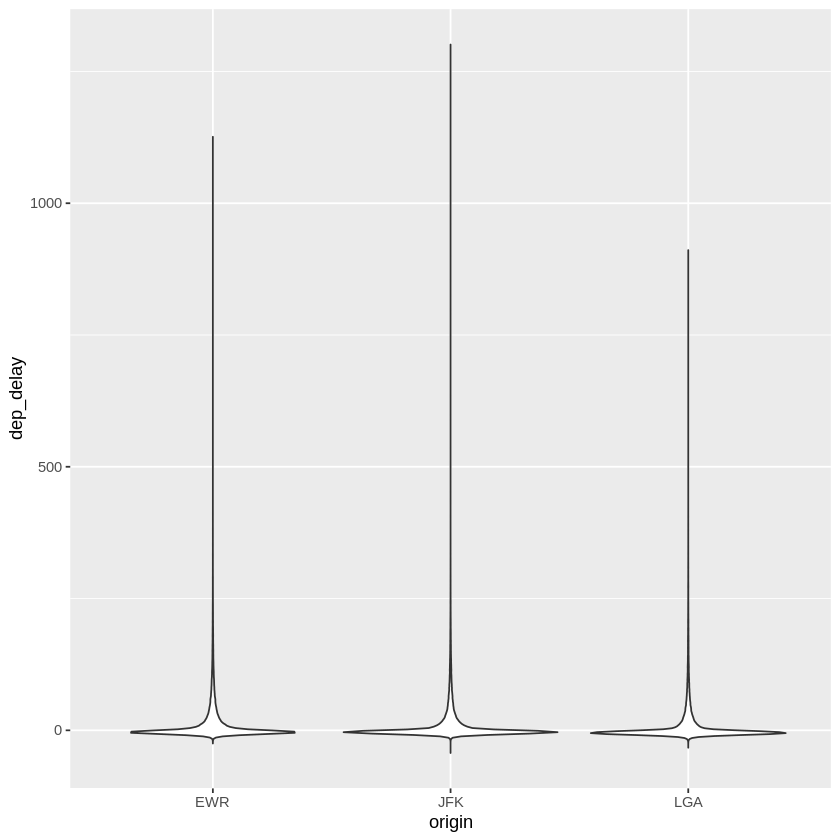

In [ ]:
flights %>% ggplot(aes(x = origin, y=dep_delay )) + geom_violin()

#### 월별 출발 지연 시간(departure delay)을 어떻게 시각화할지 생각해보자.

In [ ]:
flights %>% group_by(month) %>% summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE))

month,delay,delay_N,delay_sd
<int>,<dbl>,<int>,<dbl>
1,10.036665,27004,36.39031
2,10.816843,24951,36.26655
3,13.227076,28834,40.13097
4,13.938038,28330,42.96626
5,12.986859,28796,39.35283
6,20.846332,28243,51.45694
7,21.727787,29425,51.61608
8,12.611040,29327,37.66692
9,6.722476,27574,35.61480


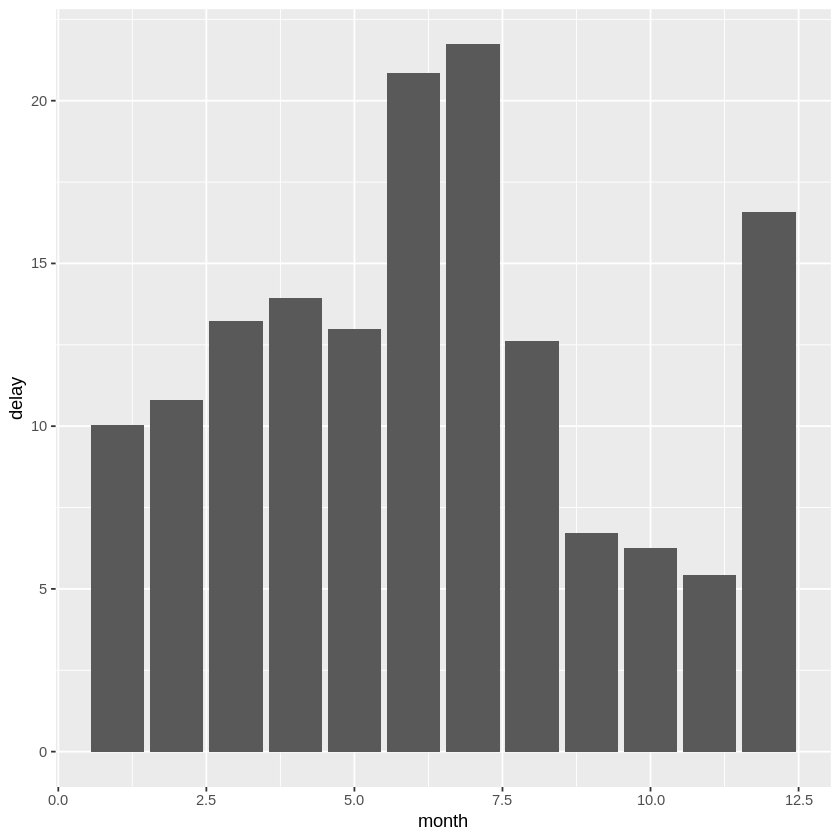

In [344]:
flights %>% group_by(month) %>%
  summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE))  %>%
  ggplot(aes(x = month, y = delay) ) +
    geom_bar(stat = "identity", position = "dodge") #stat = "identity"는 y값을 직접 사용하겠다는 의미 (delay 값을 막대의 높이로 사용)

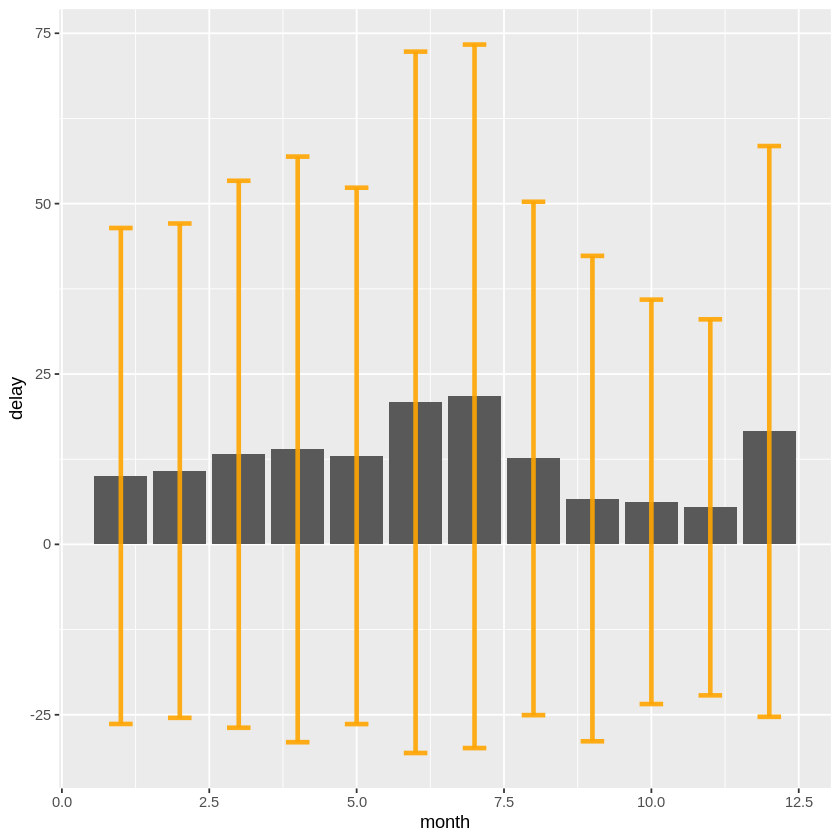

In [ ]:
flights %>% group_by(month) %>%
  summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE))  %>%
  ggplot(aes(x = month, y = delay) ) +
    geom_bar(stat = "identity", position = "dodge") +
    geom_errorbar( aes(x=month, ymin=delay-delay_sd, ymax=delay+delay_sd), width=0.4, colour="orange", alpha=0.9, size=1.3)
  #오류막대 : ymin과 ymax는 각각 평균 지연 시간에서 표준편차를 뺀 값과 더한 값으로 설정
  # 이를 통해 각 월의 평균 지연 시간에 대한 불확실성을 나타낸다.

Warning message:
“Removed 8255 rows containing non-finite values (`stat_ydensity()`).”


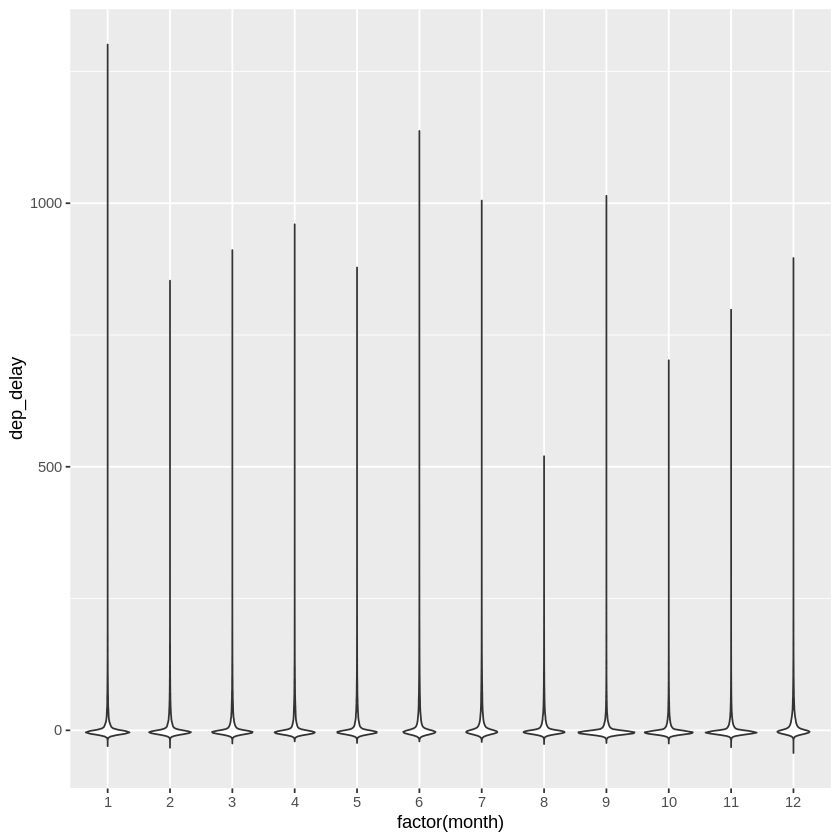

In [ ]:
flights %>% ggplot(aes(x = factor(month), y=dep_delay )) + geom_violin()

#### cordinate flip

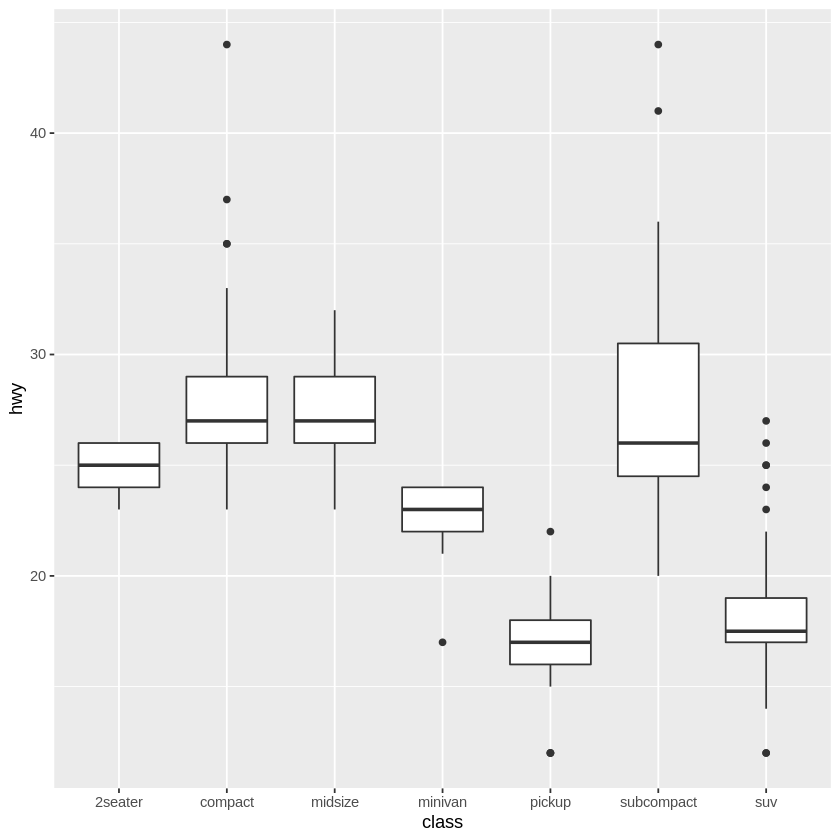

In [ ]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()


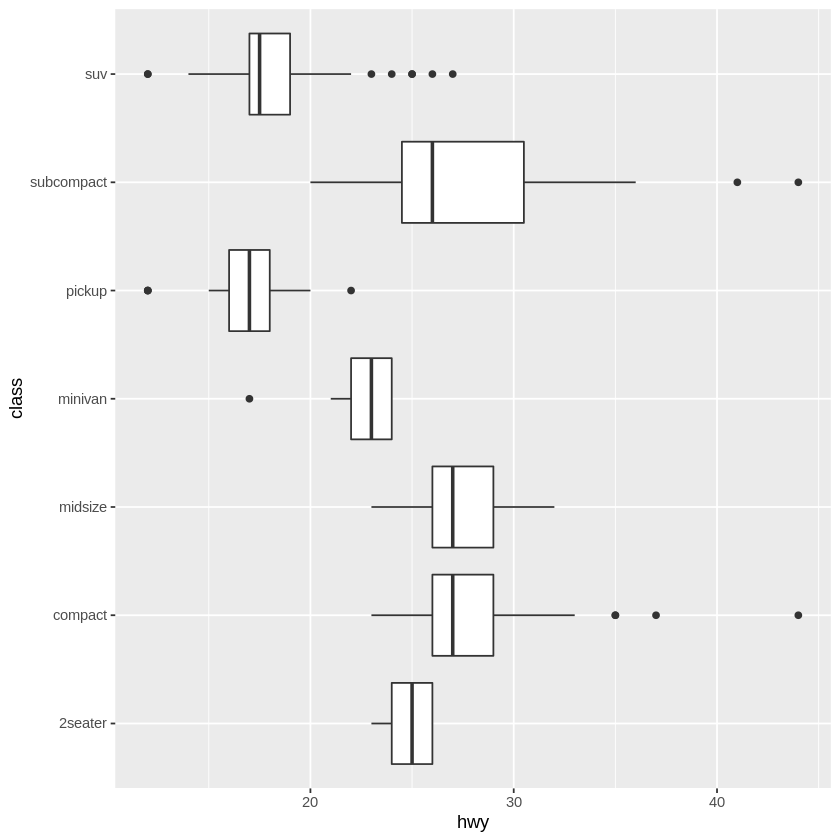

In [ ]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot() +
  coord_flip()

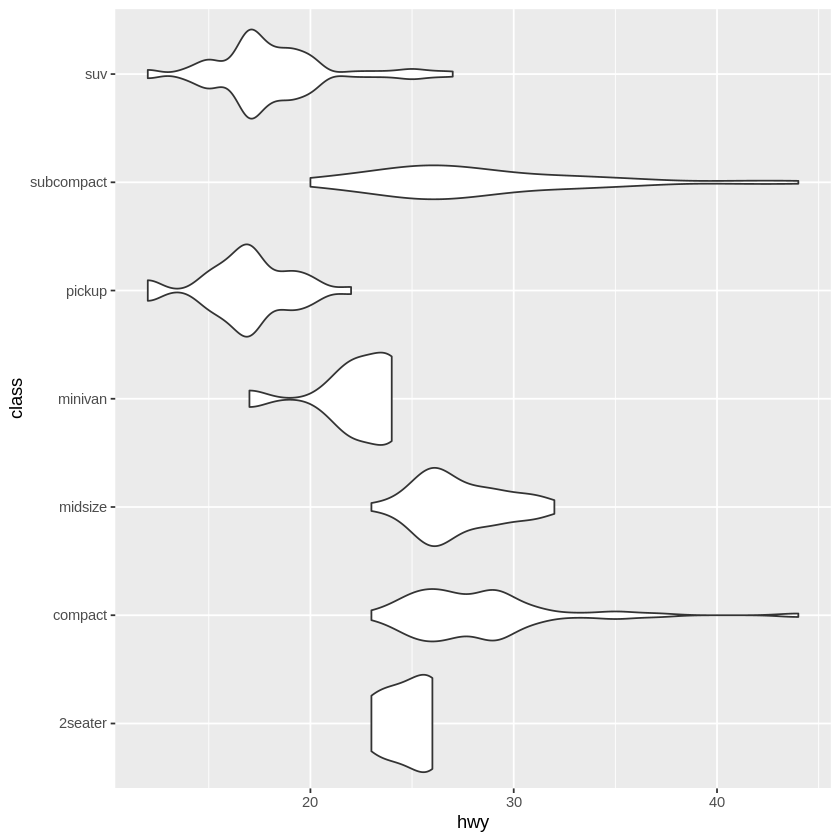

In [ ]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_violin() +
  coord_flip()

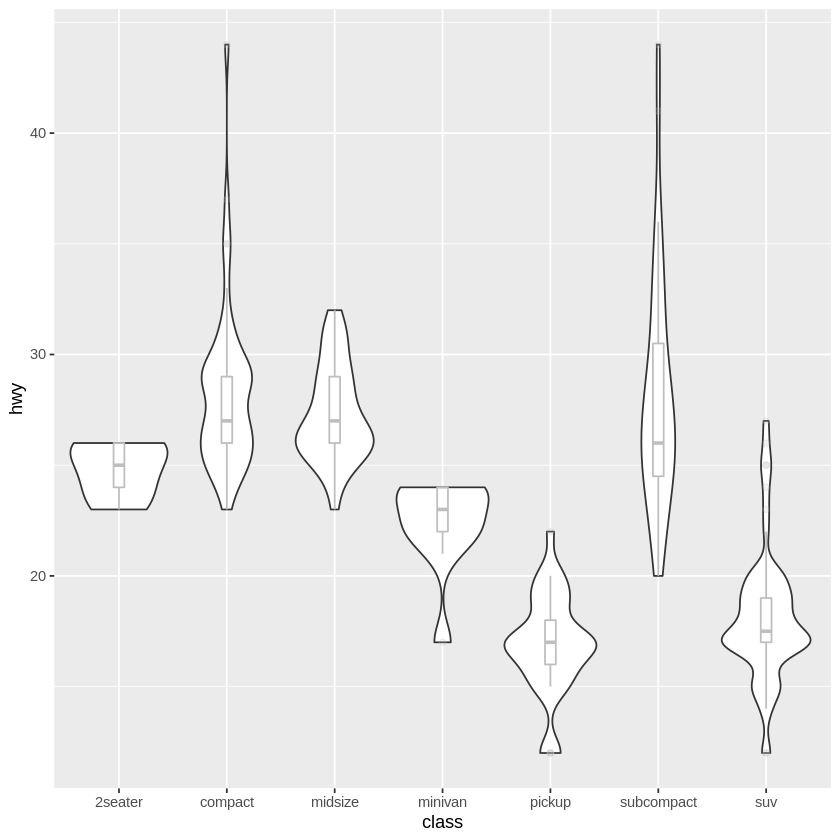

In [ ]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)

### Theme

In [ ]:
png("Fig_test.png", width = 7, height = 7, units = 'in', res = 300)
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_bw() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))
dev.off()

png 
  2

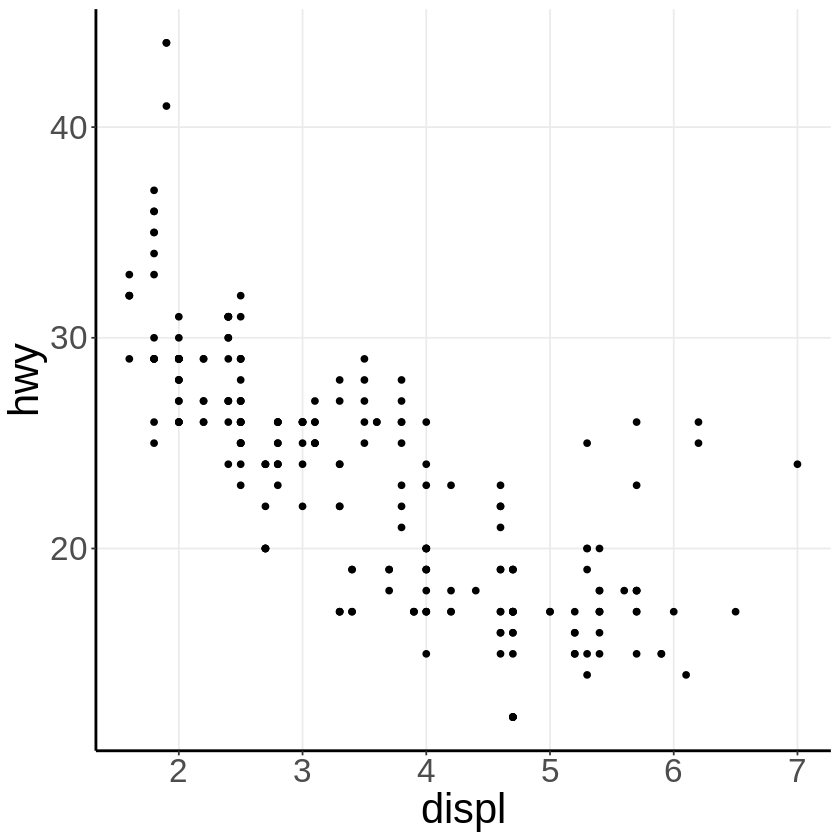

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_bw() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

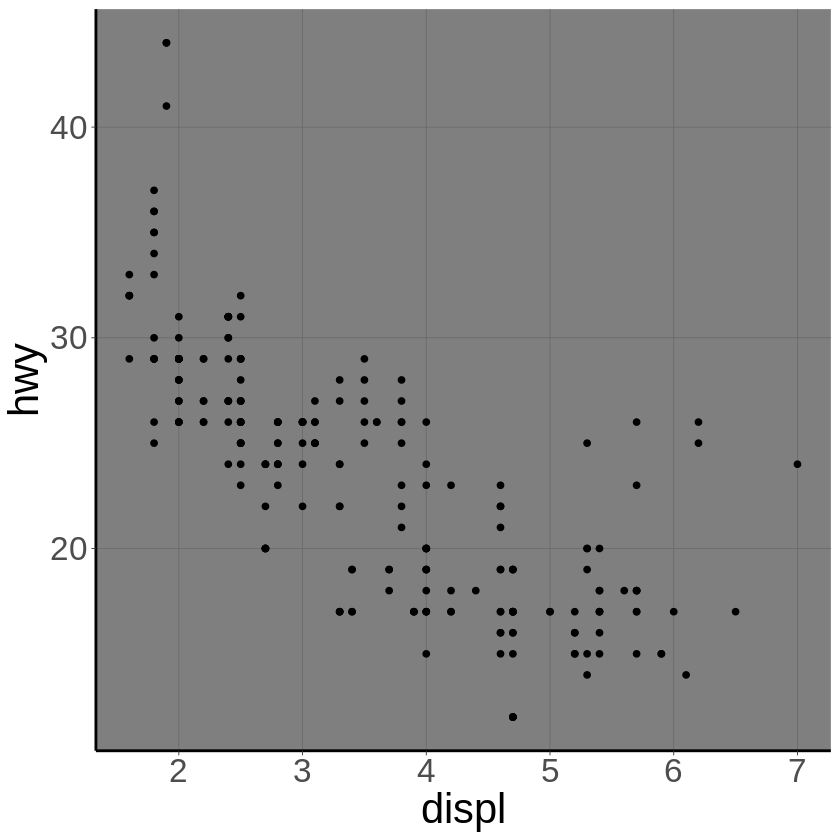

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_dark() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

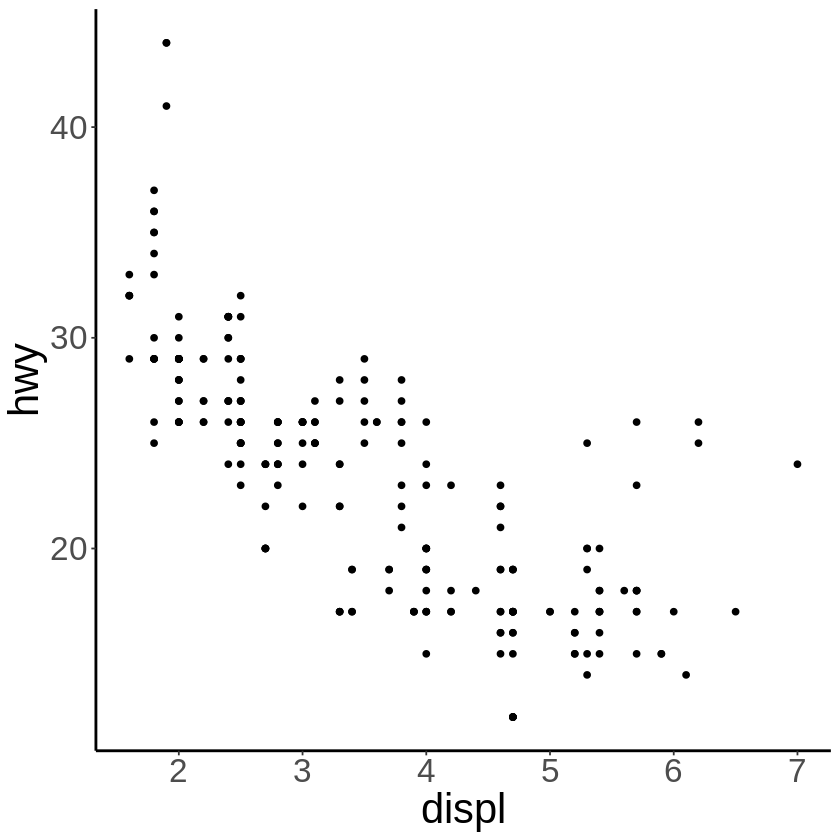

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_test() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

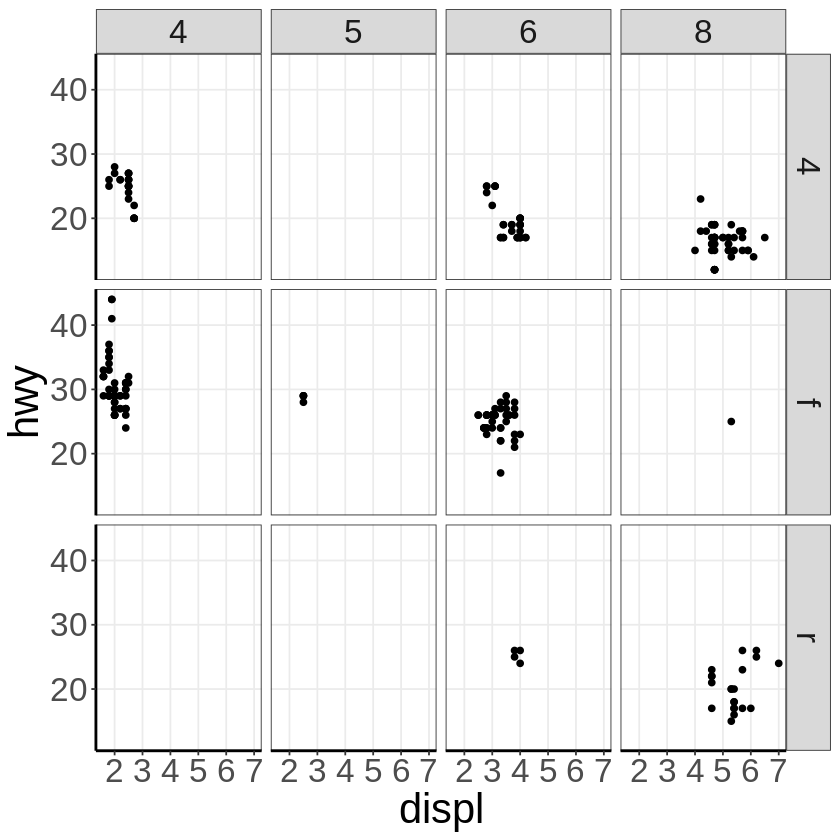

In [ ]:
ggplot(data = mpg) + theme_bw() +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ cyl)  +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        text = element_text(size = 25))

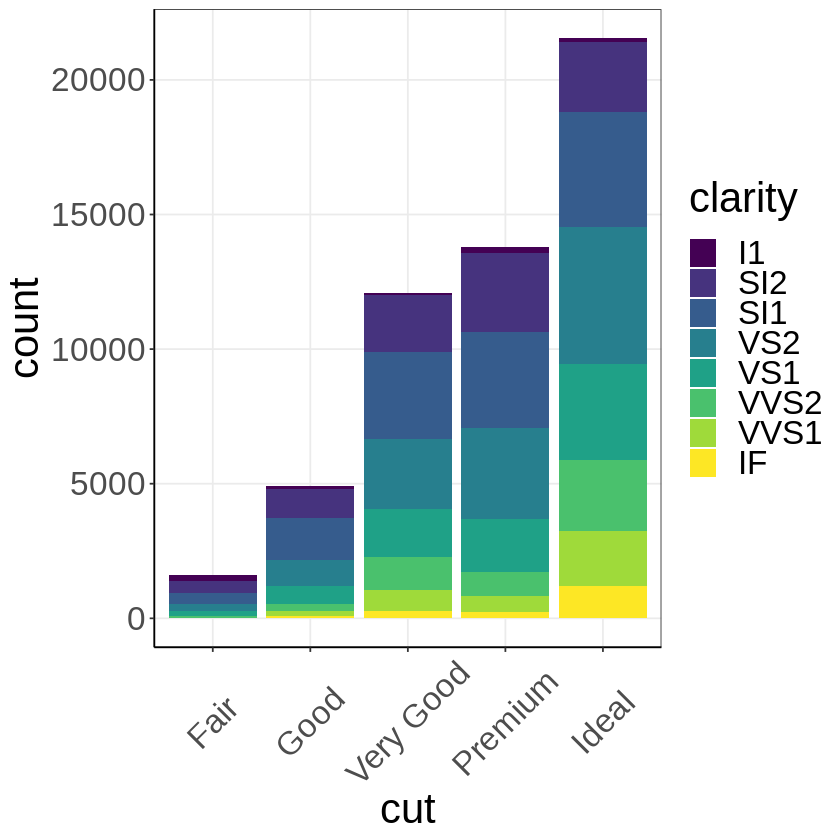

In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity)) + theme_bw() +
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25),
        axis.text.x = element_text(angle= 45, vjust = .5)
        )

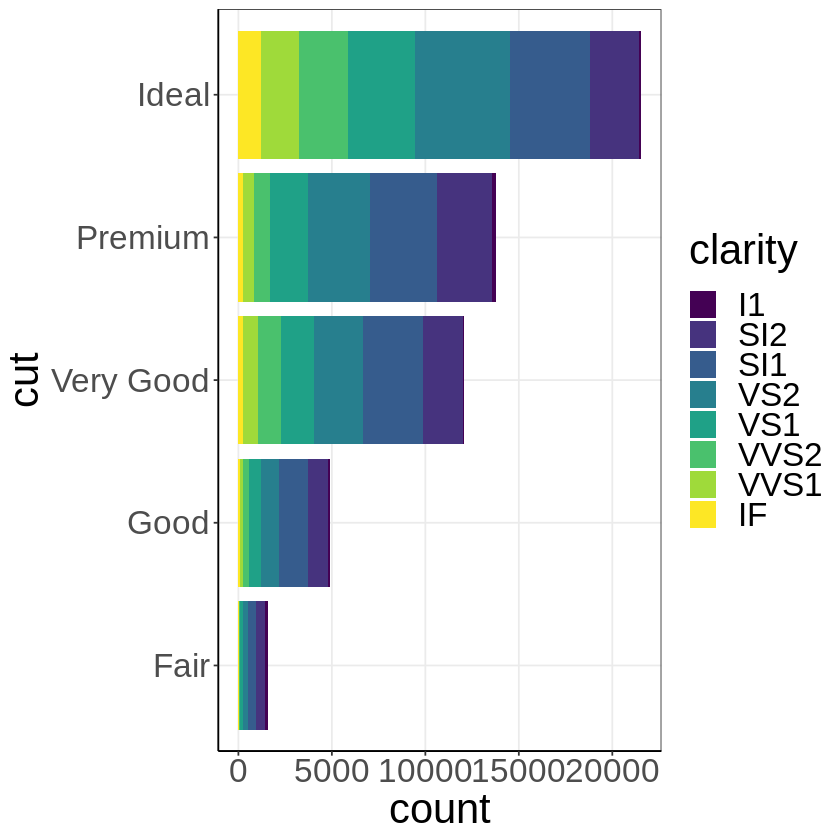

In [ ]:
# png("Fig.png", width = 7, height = 3, units = 'in', res = 300)
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity)) + theme_bw() +
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25),
#        axis.text.x = element_text(angle= 45, vjust = .5)
        ) +   coord_flip()
#dev.off()

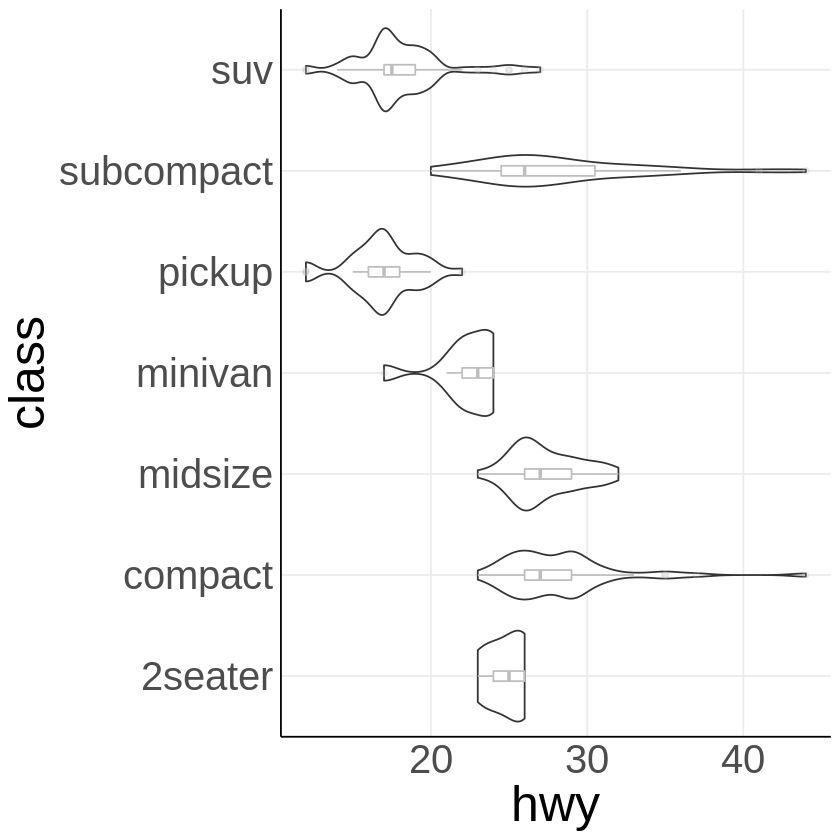

In [ ]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2) + theme_minimal()+
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 30),
        ) +   coord_flip()